### GBM

In [60]:
import os
os.environ['JAVA_HOME'] = '/opt/homebrew/opt/openjdk@11'
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize the H2O server
h2o.init()

# Load your dataset
data = pd.read_csv('../2 - Data/develop.csv')  # Path to your data
target = 'Ins'  # Define your target variable

# Split the dataset into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target])

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Set the target and predictor variables
x = train_h2o.columns
y = target
x.remove(y)  # Remove the target from predictors

# Convert the target column to a factor for classification
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O_cluster_uptime:         2 hours 13 mins
H2O_cluster_timezone:       Europe/Vilnius
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.5
H2O_cluster_version_age:    2 months and 10 days
H2O_cluster_name:           H2O_from_python_zydrunasbautronis_imnfuh
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.052 Gb
H2O_cluster_total_cores:    11
H2O_cluster_allowed_cores:  11
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.3 final
--------------------------  ----------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
print("Is H2O XGBoost available?", h2o.H2OXGBoostEstimator.available())

AttributeError: module 'h2o' has no attribute 'H2OXGBoostEstimator'

In [2]:
# Initialize and run H2O AutoML
aml = H2OAutoML(max_models=20, seed=42, balance_classes=True, max_runtime_secs=600)
aml.train(x=x, y=y, training_frame=train_h2o)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Display all models ranked by performance

# Get the best model
best_model = aml.leader

# Make predictions on the test set
preds = best_model.predict(test_h2o)

# Evaluate model performance
performance = best_model.model_performance(test_h2o)
print(performance)

AutoML progress: |
18:59:33.733: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_5_AutoML_1_20241108_185933                        0.803896   0.507059  0.671778                0.264639  0.409847  0.167974
GBM_2_AutoML_1_20241108_185933                        0.802247   0.508616  0.668689                0.266566  0.411001  0.168922
GBM_grid_1_AutoML_1_20241108_185933_model_1           0.801892   0.509259  0.664671                0.266063  0.411054  0.168965
GBM_1_AutoML_1_20241108_185933                        0.801451   0.509409  0.664851                0.267052  0.411305  0.169172
GBM_3_AutoML_1_20241108_185933                        0.800572   0.510926  0.663412                0.267764  0.41191   0.16967
GBM_grid_1_AutoML_1_20241108_185933_model_5           0.797223   0.51456   

In [61]:
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize the GBM model with cross-validation
gbm_model = H2OGradientBoostingEstimator(ntrees=50, max_depth=6, seed=42, nfolds=5)

# Train the model with cross-validation
gbm_model.train(x=x, y=y, training_frame=train_h2o)

# Print cross-validation metrics summary
print("Cross-Validation Metrics Summary:")
print(gbm_model.cross_validation_metrics_summary())

# Evaluate the model on the test set as well
performance_gbm_test = gbm_model.model_performance(test_h2o)
print("\nGBM Model Performance on Test Data:")
print(performance_gbm_test)

# Get predictions from the GBM model on the test set
gbm_preds = gbm_model.predict(test_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Cross-Validation Metrics Summary:
Cross-Validation Metrics Summary: 
                         mean        sd            cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ----------  ------------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.72615194  0.019206207   0.7430233     0.7474946     0.7186055     0.7006161     0.7210201
aic                      nan         0.0           nan           nan           nan           nan           nan
auc                      0.805092    0.0043847873  0.80560577    0.8073829     0.8109257     0.80061555    0.80092996
err                      0.2738481   0.019206207   0.25697675    0.2525054     0.28139445    0.2993839     0.2789799
err_count                1414.2      108.828766    1326.0        1285.0        1461.0        1555.0        1444.0
f0point5             

### KAPPA

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Threshold vs Kappa scores:
Threshold: 0.00, Kappa: 0.0000
Threshold: 0.05, Kappa: 0.0000
Threshold: 0.10, Kappa: 0.1393
Threshold: 0.15, Kappa: 0.2731
Threshold: 0.20, Kappa: 0.3682
Threshold: 0.25, Kappa: 0.4175
Threshold: 0.30, Kappa: 0.4394
Threshold: 0.35, Kappa: 0.4633
Threshold: 0.40, Kappa: 0.4610
Threshold: 0.45, Kappa: 0.4532
Threshold: 0.50, Kappa: 0.4454
Threshold: 0.55, Kappa: 0.4072
Threshold: 0.60, Kappa: 0.3594
Threshold: 0.65, Kappa: 0.3172
Threshold: 0.70, Kappa: 0.2558
Threshold: 0.75, Kappa: 0.1767
Threshold: 0.80, Kappa: 0.1016
Threshold: 0.85, Kappa: 0.0550
Threshold: 0.90, Kappa: 0.0201
Threshold: 0.95, Kappa: -0.0003
Threshold: 1.00, Kappa: 0.0000


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


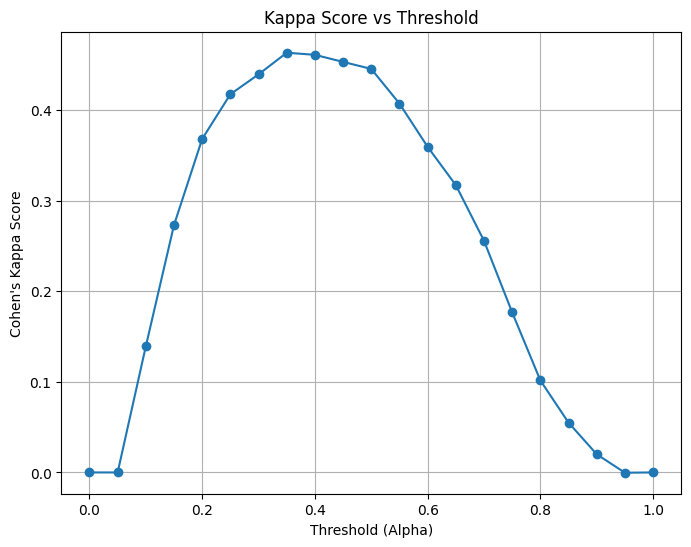

In [62]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Generate predictions (probabilities) from the GBM model on the test set
gbm_preds = gbm_model.predict(test_h2o).as_data_frame()

# Get the actual target values
y_true = test_h2o[y].as_data_frame().values.ravel()

# Extract predicted probabilities for the positive class
y_proba = gbm_preds['p1'].values  # Assuming 'p1' corresponds to the positive class probability

# Define a range of threshold values (alpha)
thresholds = np.linspace(0, 1, 21)  # 21 thresholds between 0 and 1

# Store results for each threshold
kappa_scores = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # Calculate Kappa score
    kappa = cohen_kappa_score(y_true, y_pred)
    kappa_scores.append((threshold, kappa))

# Print the results
print("Threshold vs Kappa scores:")
for threshold, kappa in kappa_scores:
    print(f"Threshold: {threshold:.2f}, Kappa: {kappa:.4f}")

# Plotting Kappa scores for different thresholds
import matplotlib.pyplot as plt

thresholds, kappas = zip(*kappa_scores)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, marker='o')
plt.xlabel('Threshold (Alpha)')
plt.ylabel('Cohen\'s Kappa Score')
plt.title('Kappa Score vs Threshold')
plt.grid(True)
plt.show()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix at alpha = 0.35:
[[3148 1070]
 [ 579 1656]]


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


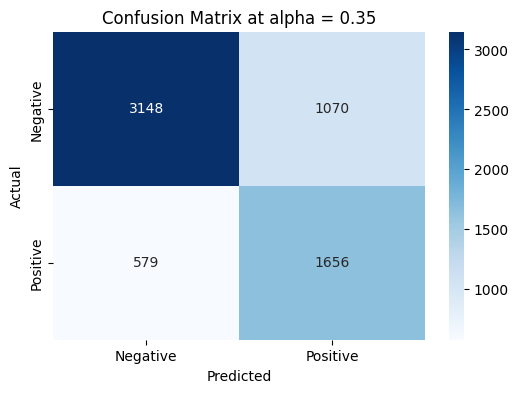

In [64]:
from sklearn.metrics import confusion_matrix

# Define your new threshold (alpha value)
new_alpha = 0.35  # Adjust this value as needed

# Generate predictions (probabilities) from the GBM model on the test set
gbm_preds = gbm_model.predict(test_h2o).as_data_frame()

# Get the actual target values
y_true = test_h2o[y].as_data_frame().values.ravel()

# Extract predicted probabilities for the positive class
y_proba = gbm_preds['p1'].values  # Assuming 'p1' corresponds to the positive class probability

# Apply the new threshold to generate binary predictions
y_pred = (y_proba >= new_alpha).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print(f"Confusion Matrix at alpha = {new_alpha}:\n{conf_matrix}")

# Optional: Visualize the confusion matrix using a heatmap (requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix at alpha = {new_alpha}')
plt.show()

In [3]:
from h2o.estimators import H2OGradientBoostingEstimator
# Train a separate H2O GBM model
gbm_model2 = H2OGradientBoostingEstimator(ntrees=10, max_depth=4, seed=42)
gbm_model2.train(x=x, y=y, training_frame=train_h2o)

# Evaluate the GBM model on the test set
performance_gbm = gbm_model2.model_performance(test_h2o)
print("GBM Model Performance on Test Data:")
print(performance_gbm)

# Get predictions from the GBM model
gbm_preds = gbm_model2.predict(test_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
GBM Model Performance on Test Data:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18153042306954773
RMSE: 0.4260638720538832
LogLoss: 0.5449447989485696
Mean Per-Class Error: 0.2683041041748212
AUC: 0.7955027616807906
AUCPR: 0.6583994918395207
Gini: 0.5910055233615812

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3296838002342273
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2885  1333  0.316    (1333.0/4218.0)
1      493   1742  0.2206   (493.0/2235.0)
Total  3378  3075  0.283    (1826.0/6453.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.329684     0.656121  333
max f2                       0.243784     0.763831  393
max f0point5                 0.42235      0.642

In [63]:
import os

# Save the GBM model as MOJO and download h2o-genmodel.jar to the current working directory
mojo_path = gbm_model2.download_mojo(path=os.getcwd(), get_genmodel_jar=True)
print("MOJO path:", mojo_path)

MOJO path: /Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/6 - notebooks/GBM_model_python_1729174575802_3499.zip


In [ ]:
# java -cp h2o-genmodel.jar hex.genmodel.tools.PrintMojo --tree 0 -i GBM_model_python_1728838744377_1869.zip -o model.gv -f 20 -d 3
# dot -Tpng model.gv -o model.png

### DEEP LEARNING


In [4]:
from h2o.estimators import H2ODeepLearningEstimator

# Sukurkite giluminio mokymosi modelį
dl_model = H2ODeepLearningEstimator(
    activation="RectifierWithDropout",  # Naudojame ReLU su dropout'u
    hidden=[128, 128, 64],  # Nustatome paslėptųjų sluoksnių dydį
    epochs=50,  # Kiek epochų
    l1=1e-5,  # L1 reguliavimas
    l2=1e-5,  # L2 reguliavimas
    input_dropout_ratio=0.2,  # Dropout įėjimo sluoksnyje
    train_samples_per_iteration=-1,  # Automatiškai optimizuoja treniravimą
    stopping_metric="AUC",  # Naudojame AUC kaip sustabdymo kriterijų
    stopping_rounds=5,  # Sustabdoma po 5 raundų be patobulinimo
    seed=42
)

# Treniruokite giluminio mokymosi modelį su treniravimo duomenimis
dl_model.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1731085109530_1776


Status of Neuron Layers: predicting Ins, 2-class classification, bernoulli distribution, CrossEntropy loss, 33,858 weights/biases, 412.2 KB, 1,290,550 training samples, mini-batch size 1
    layer    units    type              dropout    l1     l2     mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  -----  -----  --------------------  ---------------------  ----------  ---------------------  -------------------  ---------------------  -------------------
    1        69       Input             20.0
    2        128      RectifierDropout  50.0       1e-05  1e-05  0.036769021662484774  0.17082184553146362    0.0         -0.01946764301304298   0.19198691844940186  -0.14476394466136347   0.14127963781356812
    3        128      RectifierDropout  50.0       1e-05  1e-05  0.014175889929063601  0.008548367768526077   0.0         -0.05172401858240003   0.11483222246170044  0.5339198942459947     0.22057241201400757
    4        64       RectifierDropout  50.0       1e-05  1e-05  0.01681378215821283   0.02848682552576065    0.0         -0.04744043835675216   0.1436377763748169   0.6702609313665813     0.30938541889190674
    5        2        Softmax                      1e-05  1e-05  0.002516316344781444  0.0016707577742636204  0.0         -0.039326873746176716  0.6036386489868164   -0.036672276225824446  0.21725785732269287

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.16860697958895057
RMSE: 0.4106178023283338
LogLoss: 0.5120825630857857
Mean Per-Class Error: 0.26013476493460586
AUC: 0.8093955019441499
AUCPR: 0.6777416773348213
Gini: 0.6187910038882998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30220204243595283
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      4286  2274  0.3466   (2274.0/6560.0)
1      599   2851  0.1736   (599.0/3450.0)
Total  4885  5125  0.287    (2873.0/10010.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.302202     0.664956  255
max f2                       0.196081     0.772567  319
max f0point5                 0.447399     0.647932  173
max accuracy                 0.423816     0.756344  185
max precision                0.999526     1         0
max recall                   0.0398419    1         399
max specificity              0.999526     1         0
max absolute_mcc             0.383135     0.462039  207
max min_per_class_accuracy   0.365745     0.736128  219
max mean_per_class_accuracy  0.302202     0.739865  255
max tns                      0.999526     6560      0
max fns                      0.999526     3449      0
max fps                      0.0569724    6560      398
max tps                      0.0398419    3450      399
max tnr                      0.999526     1         0
max fnr                      0.999526     0.99971   0
max fpr                      0.0569724    1         398
max tpr                      0.0398419    1         399

Gains/Lift Table: Avg response rate: 34.47 %, avg score: 34.77 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100899                   0.75446            2.67163   2.67163            0.920792         0.807

In [22]:
# Ivertiname modelį naudodami testavimo duomenis
performance = dl_model.model_performance(test_h2o)
print("Modelio tikslumas (Accuracy):", performance.accuracy())
print("AUC reikšmė:", performance.auc())
print("Logaritminio nuostolio reikšmė:", performance.logloss())

Modelio tikslumas (Accuracy): [[0.45676166930558093, 0.7543778087711142]]
AUC reikšmė: 0.8023936511573388
Logaritminio nuostolio reikšmė: 0.5128137192831096


In [23]:
preds = dl_model.predict(test_h2o)
print(preds.head())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
  predict        p0        p1
        0  0.814183  0.185817
        1  0.387012  0.612988
        0  0.852205  0.147795
        0  0.705061  0.294939
        1  0.243175  0.756825
        0  0.815058  0.184942
        1  0.360677  0.639323
        0  0.838507  0.161493
        1  0.380079  0.619921
        0  0.844521  0.155479
[10 rows x 3 columns]



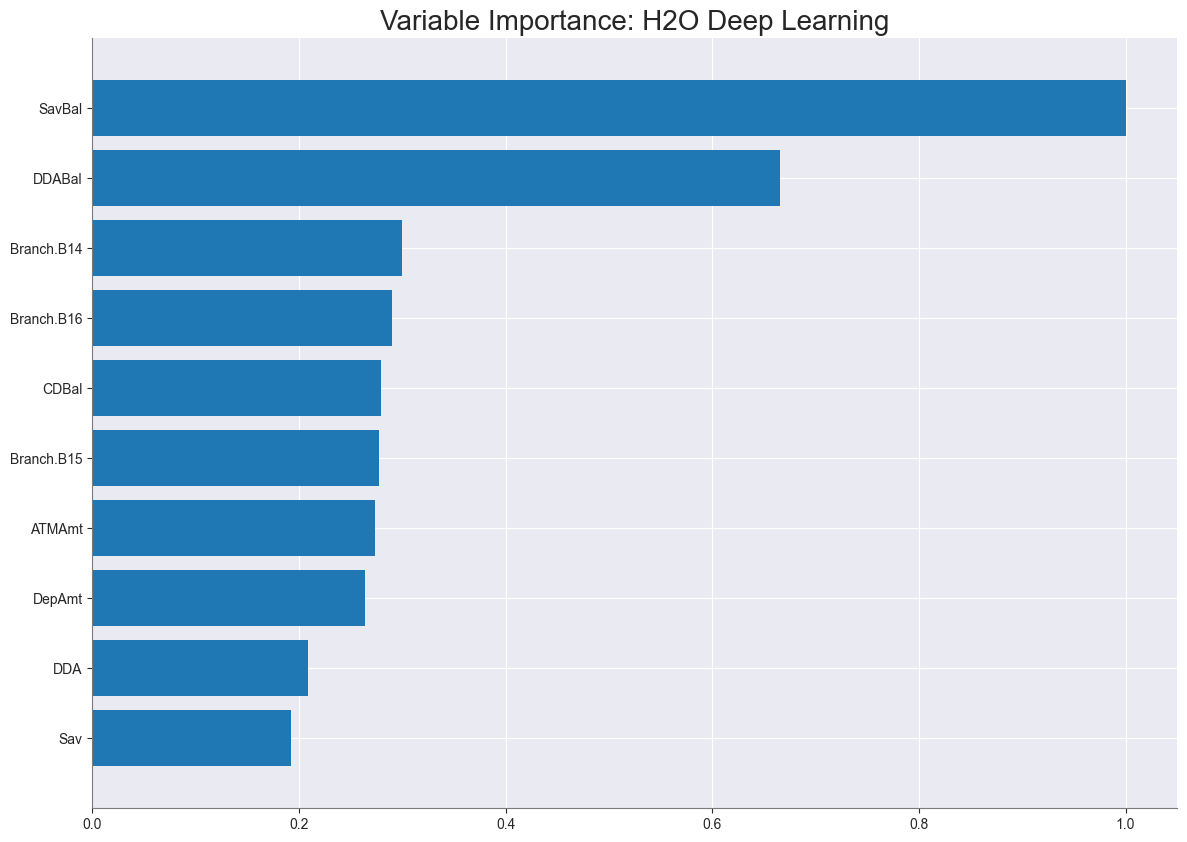

<Figure size 640x480 with 0 Axes>

In [24]:
# Patikrinkite kintamųjų svarbą giluminio mokymosi modelyje
if dl_model.varimp():
    dl_model.varimp_plot()
else:
    print("Šiame giluminio mokymosi modelyje kintamųjų svarba nėra prieinama.")

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_model_python_1728838744377_1882

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3338234203279392
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3058  1160  0.275    (1160.0/4218.0)
1      563   1672  0.2519   (563.0/2235.0)
Total  3621  2832  0.267    (1723.0/6453.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

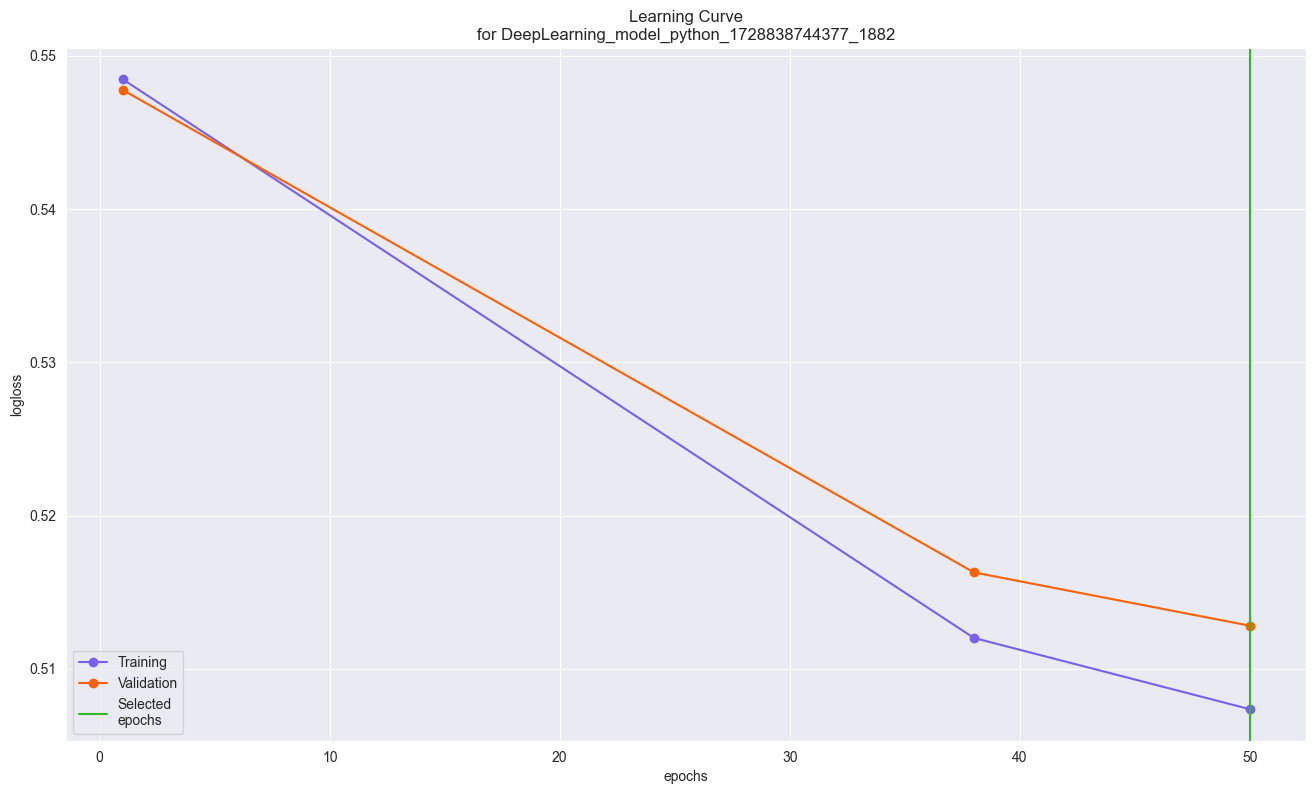

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

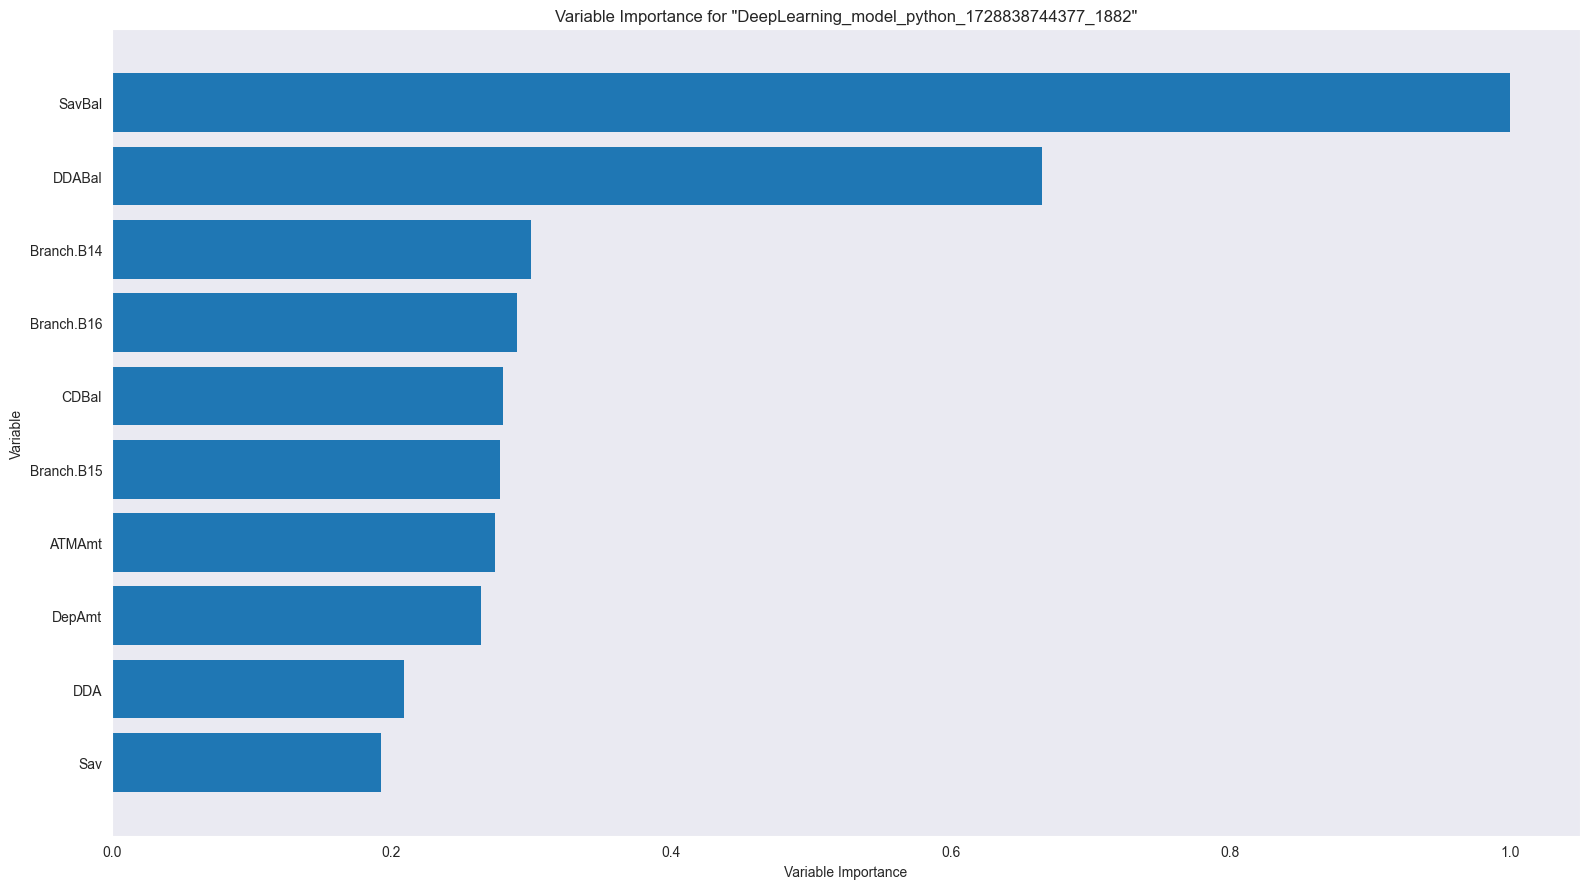

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

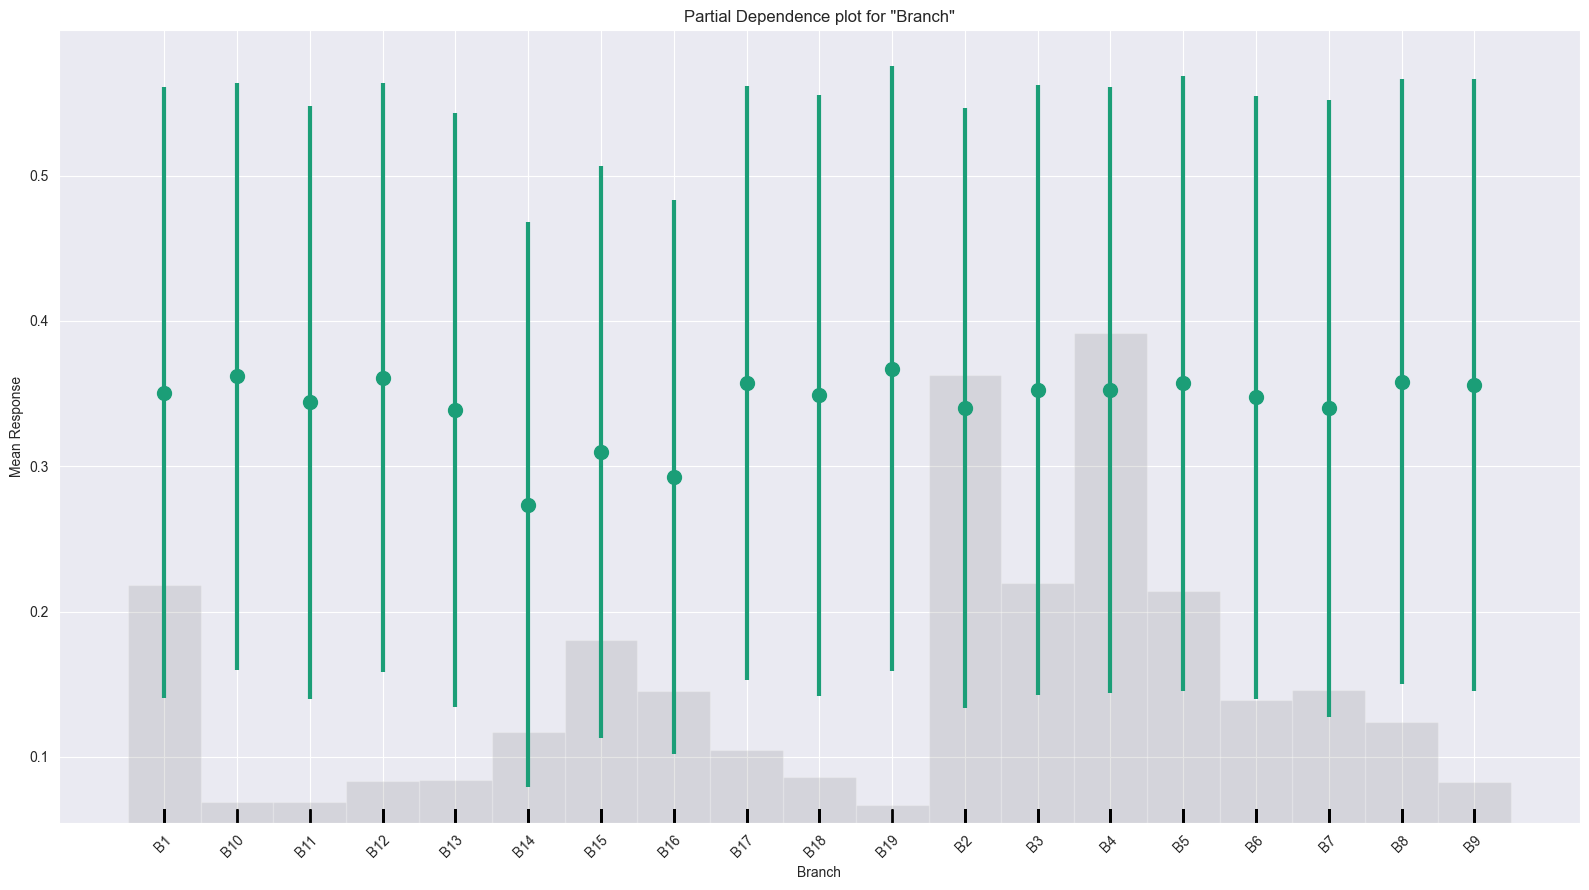

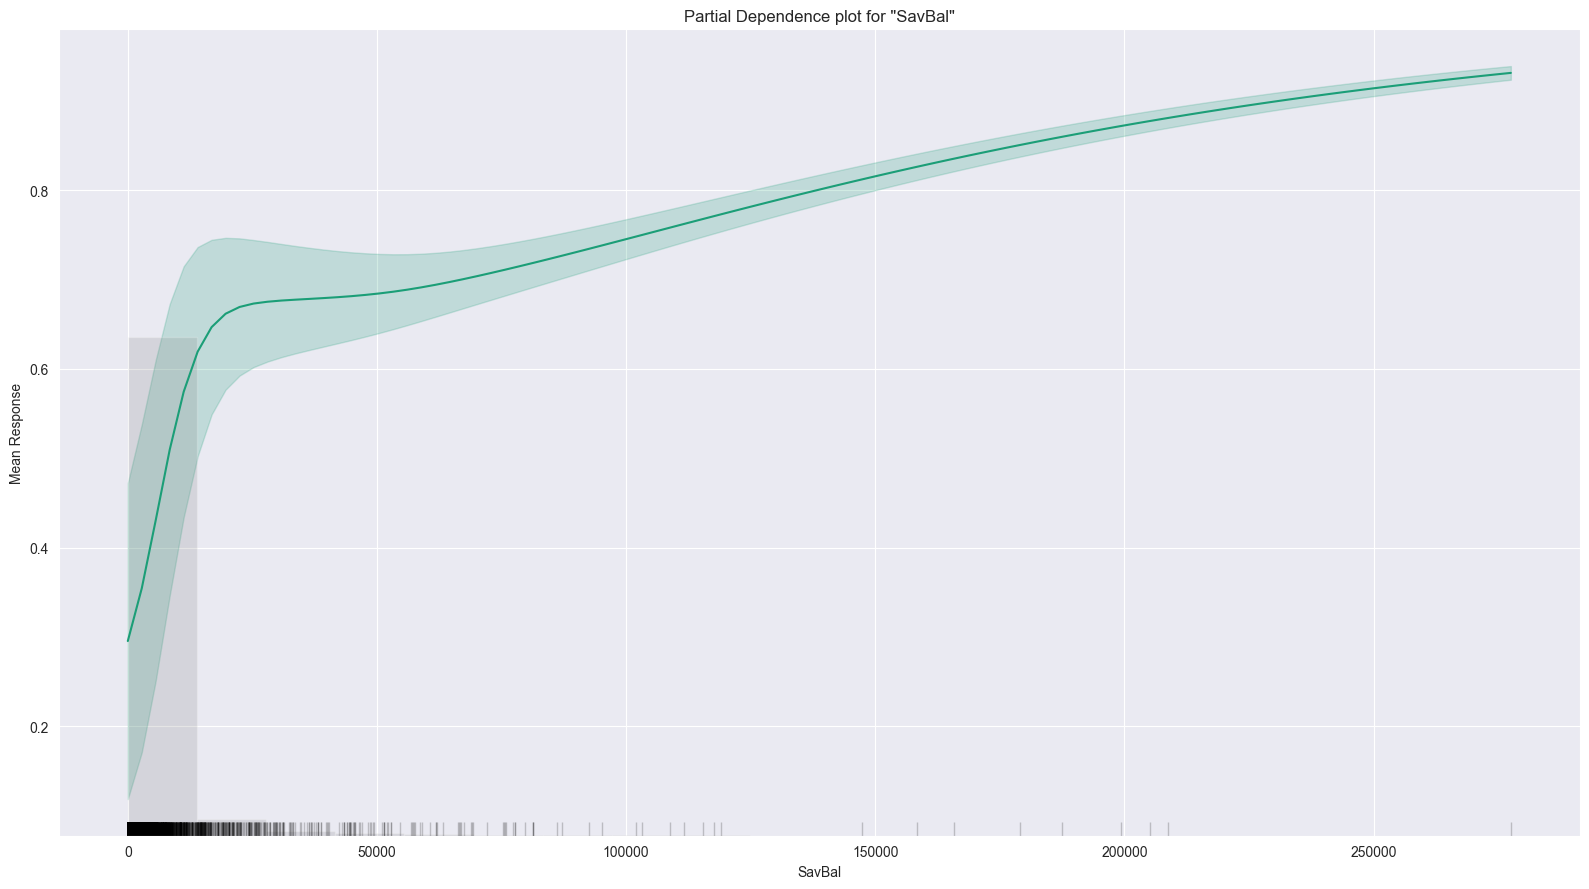

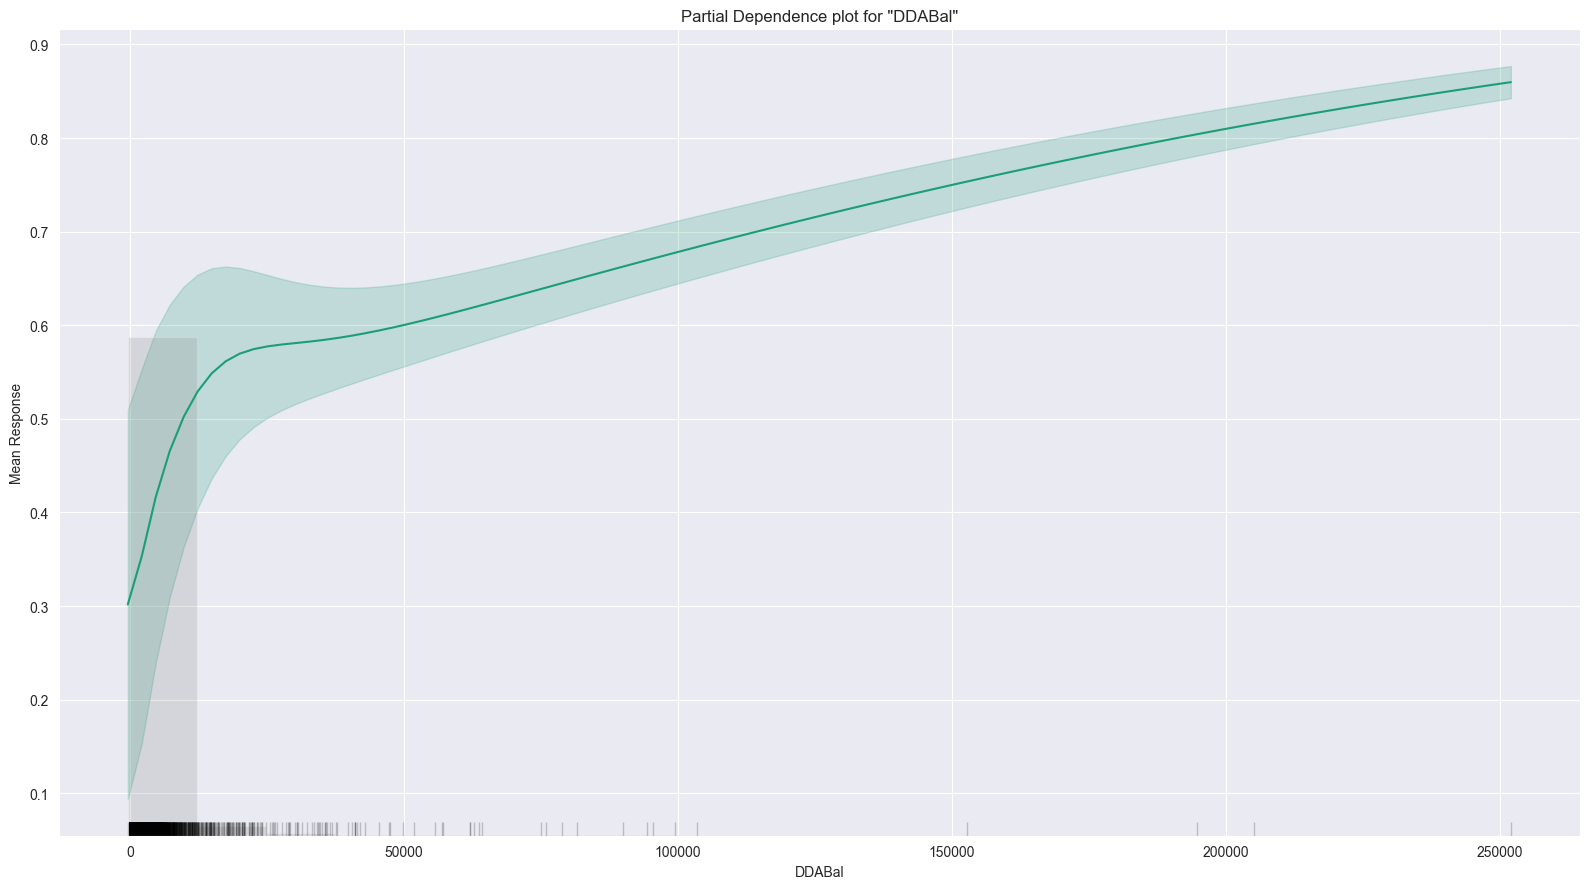

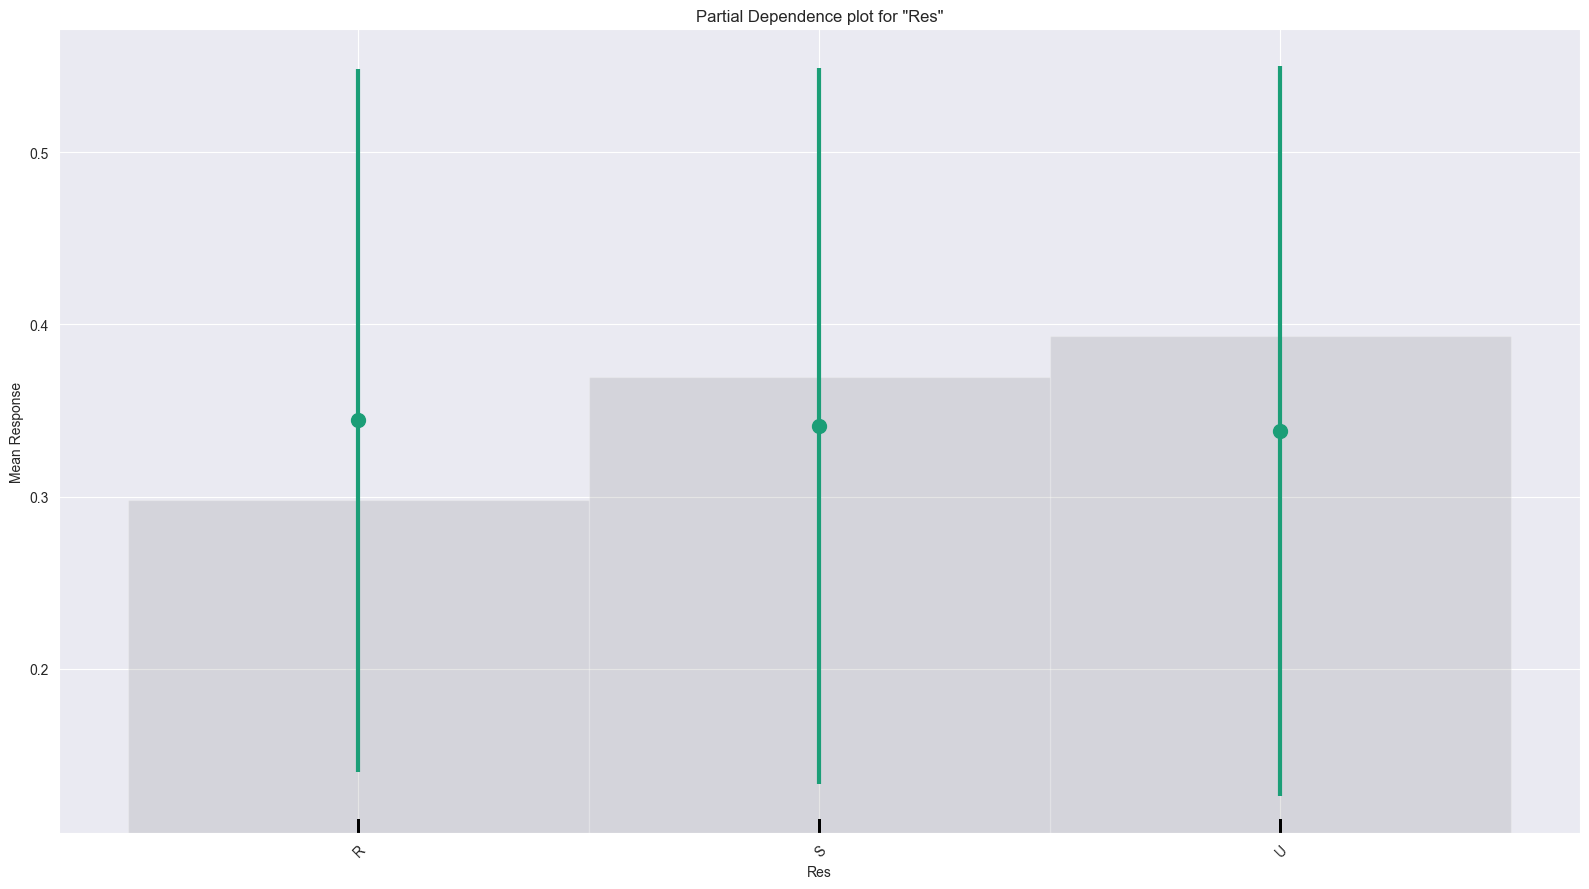

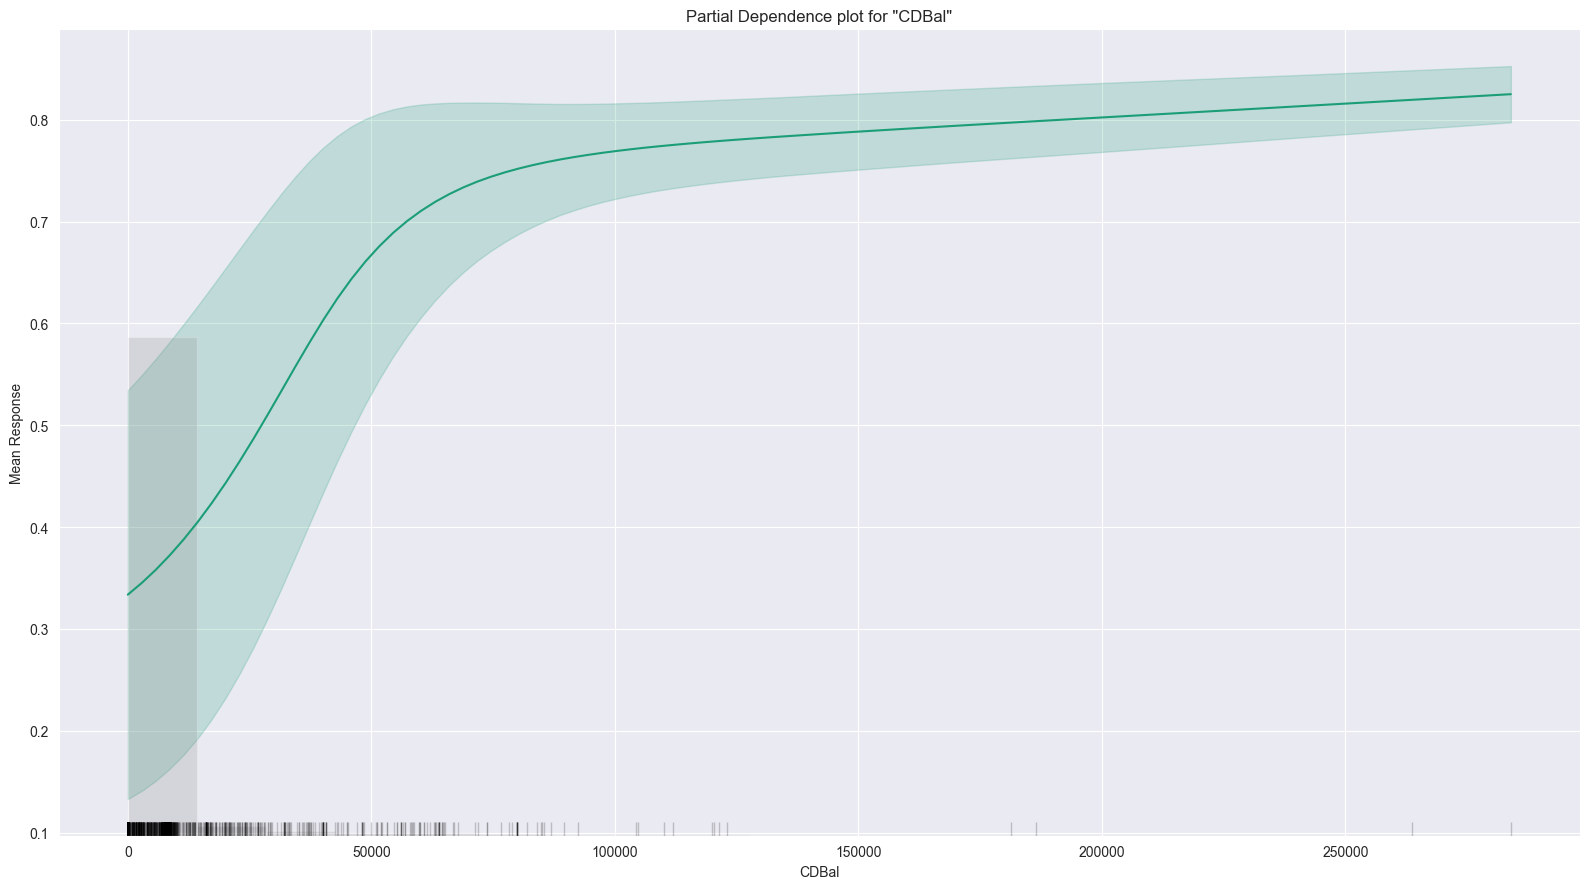

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

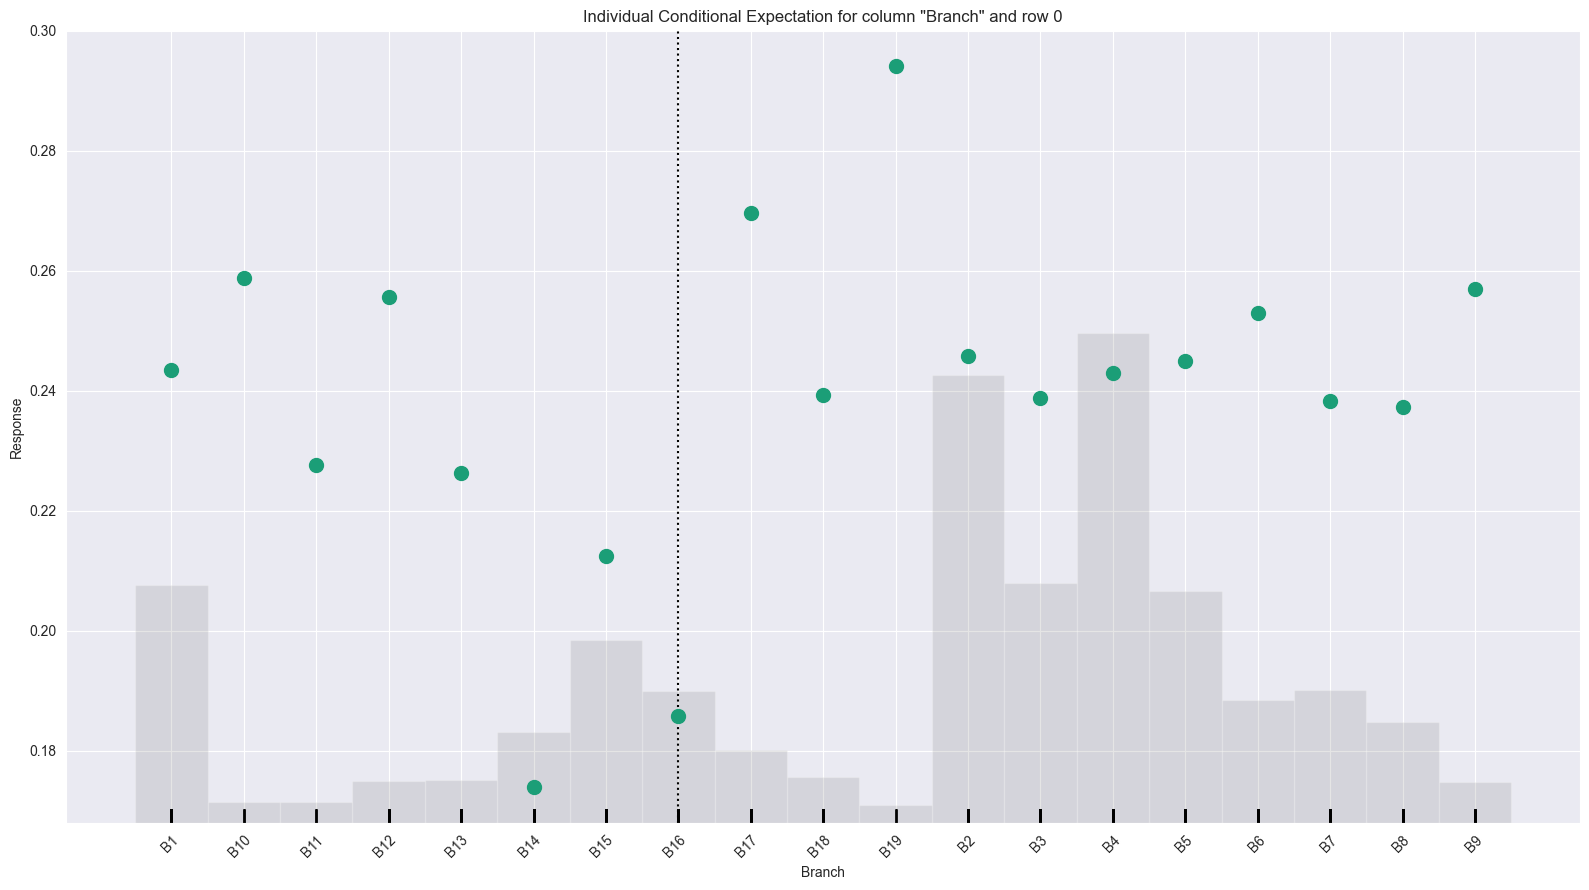

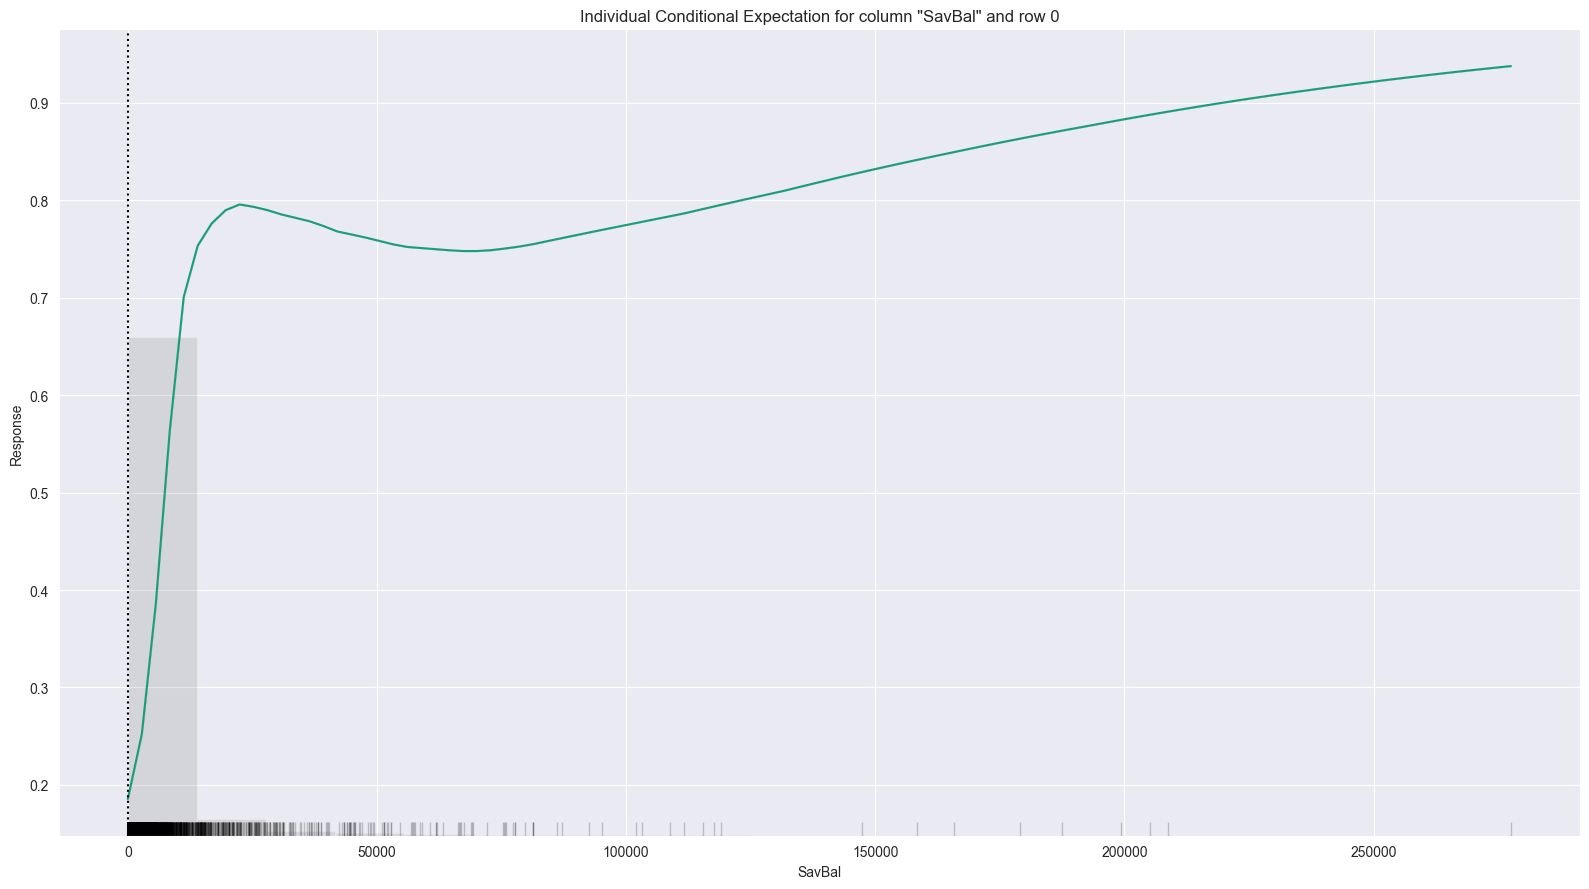

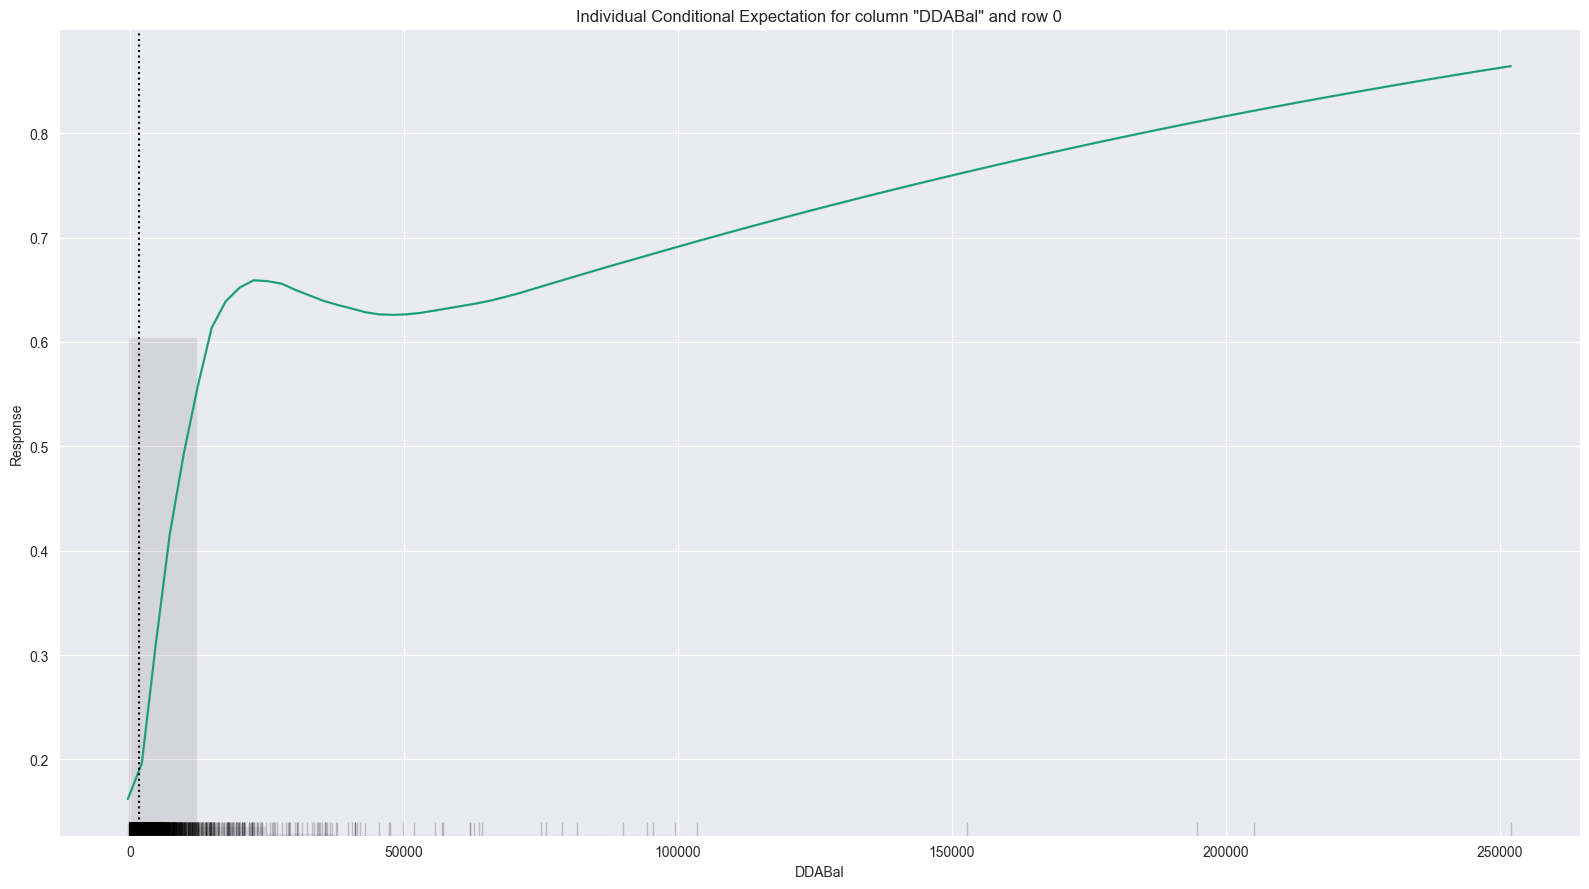

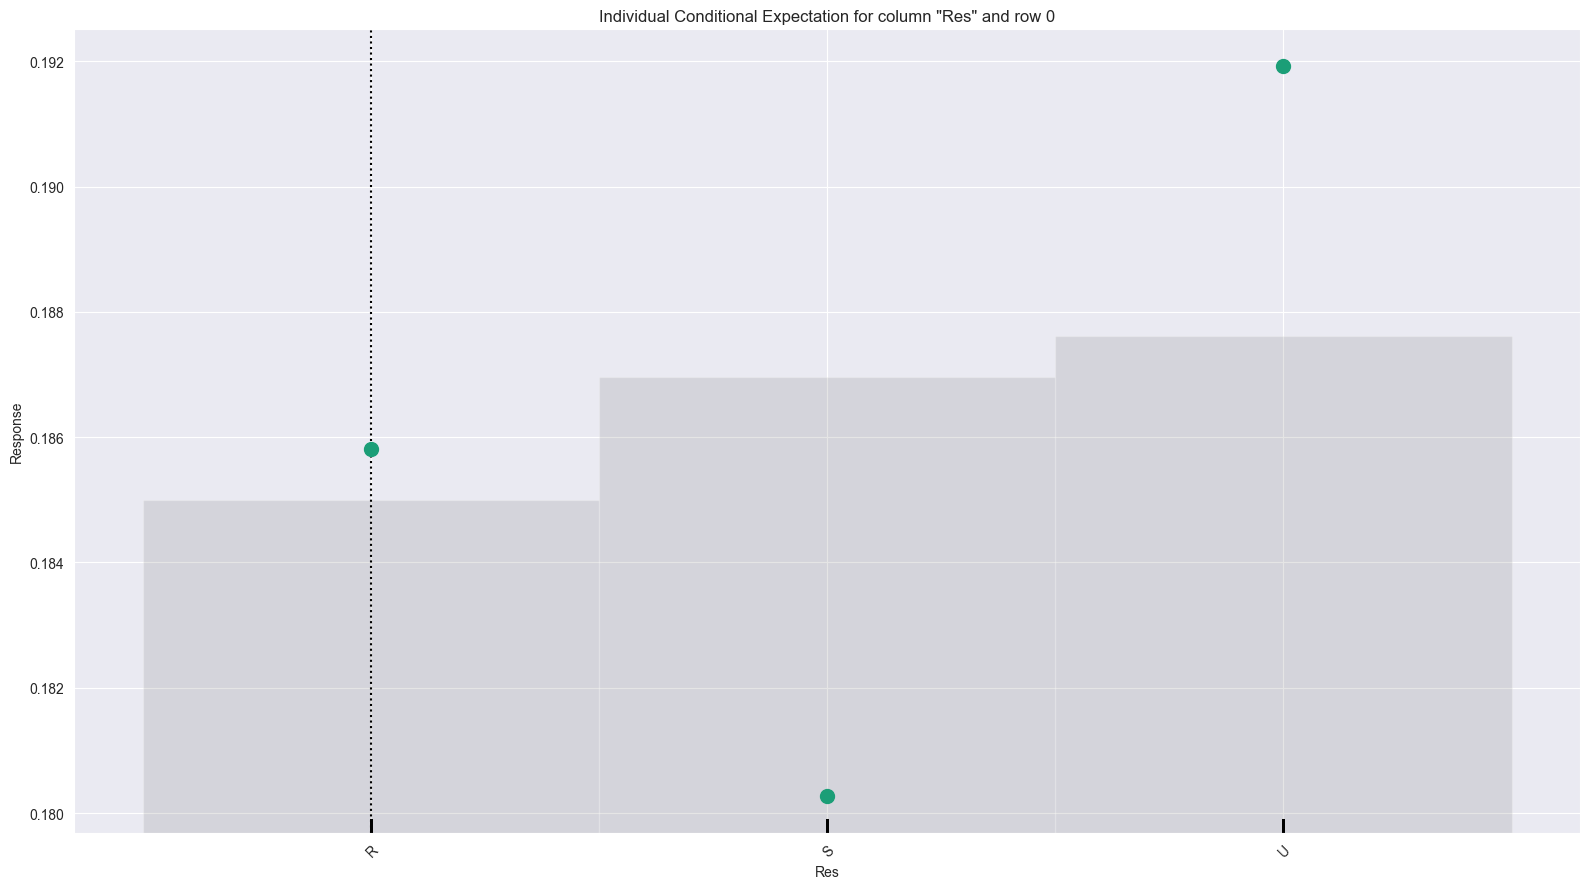

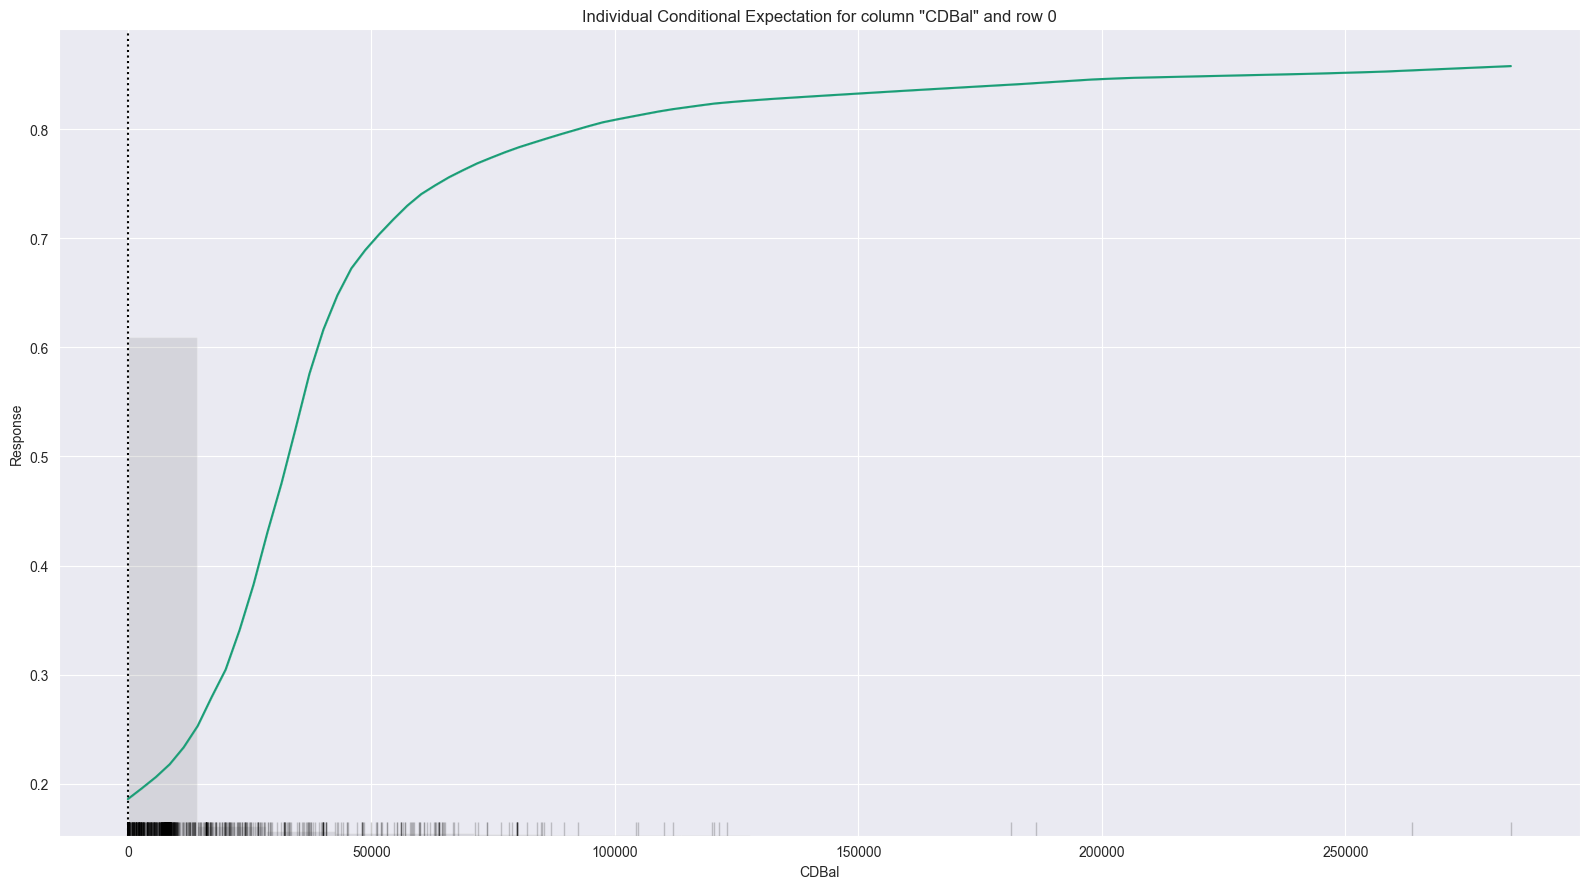

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

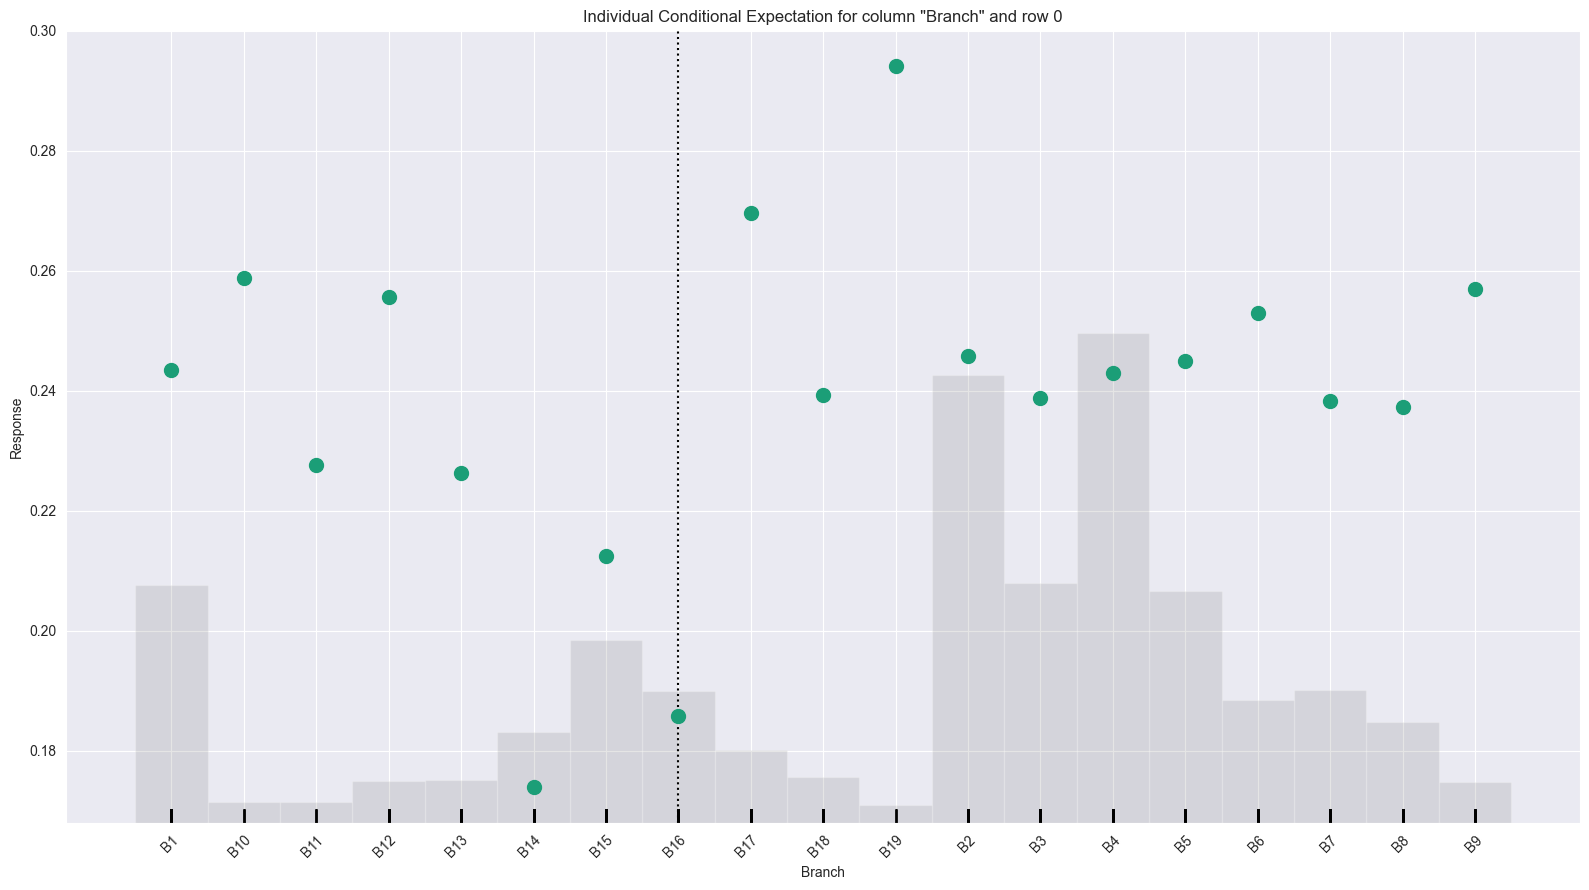

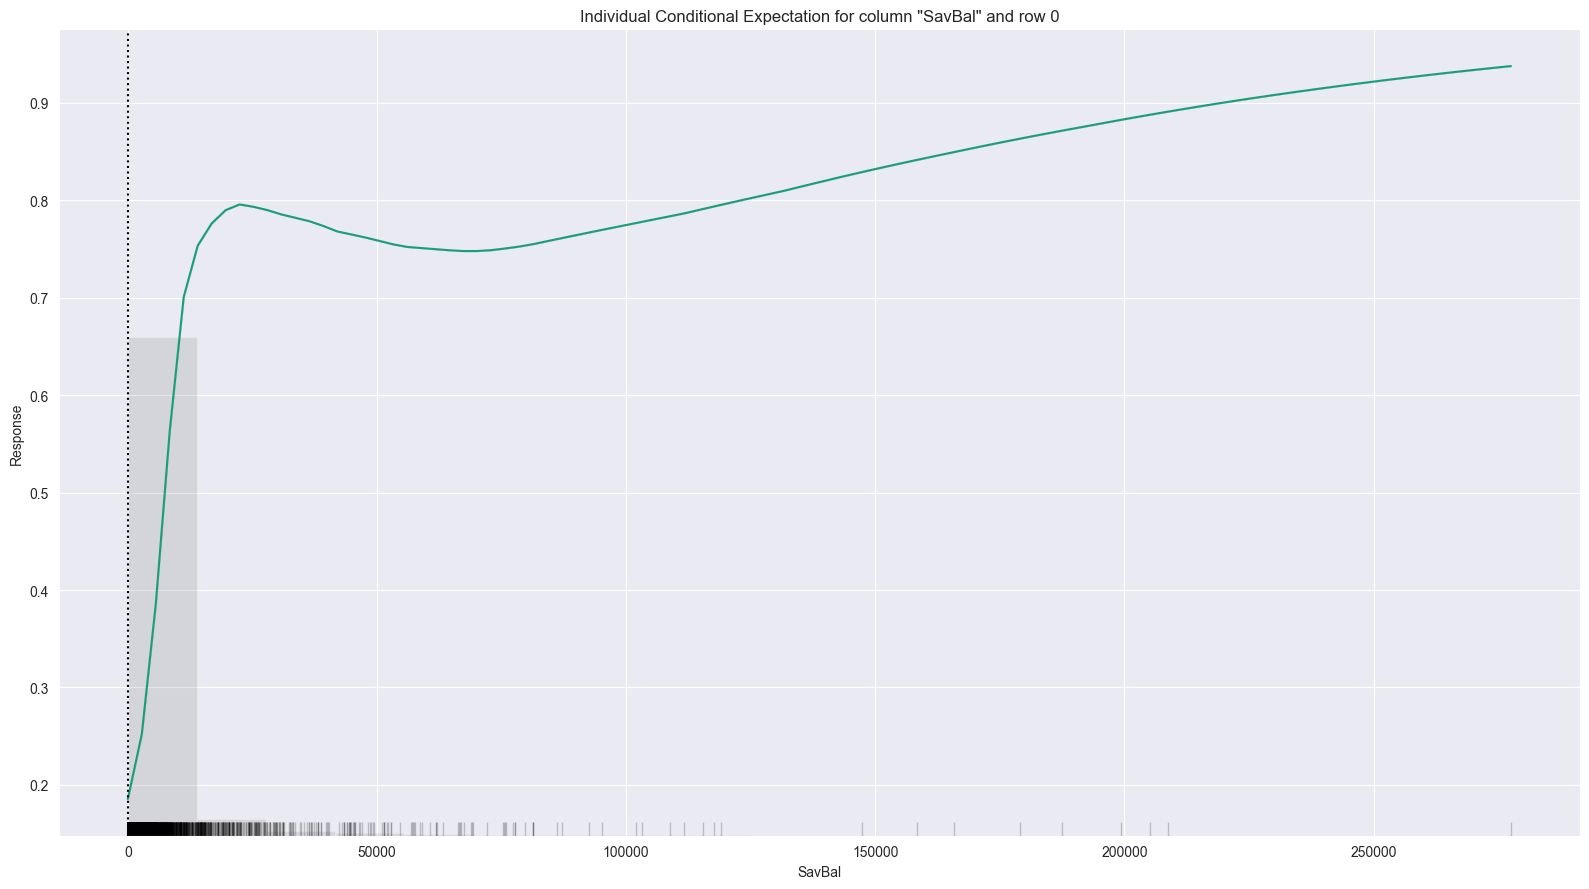

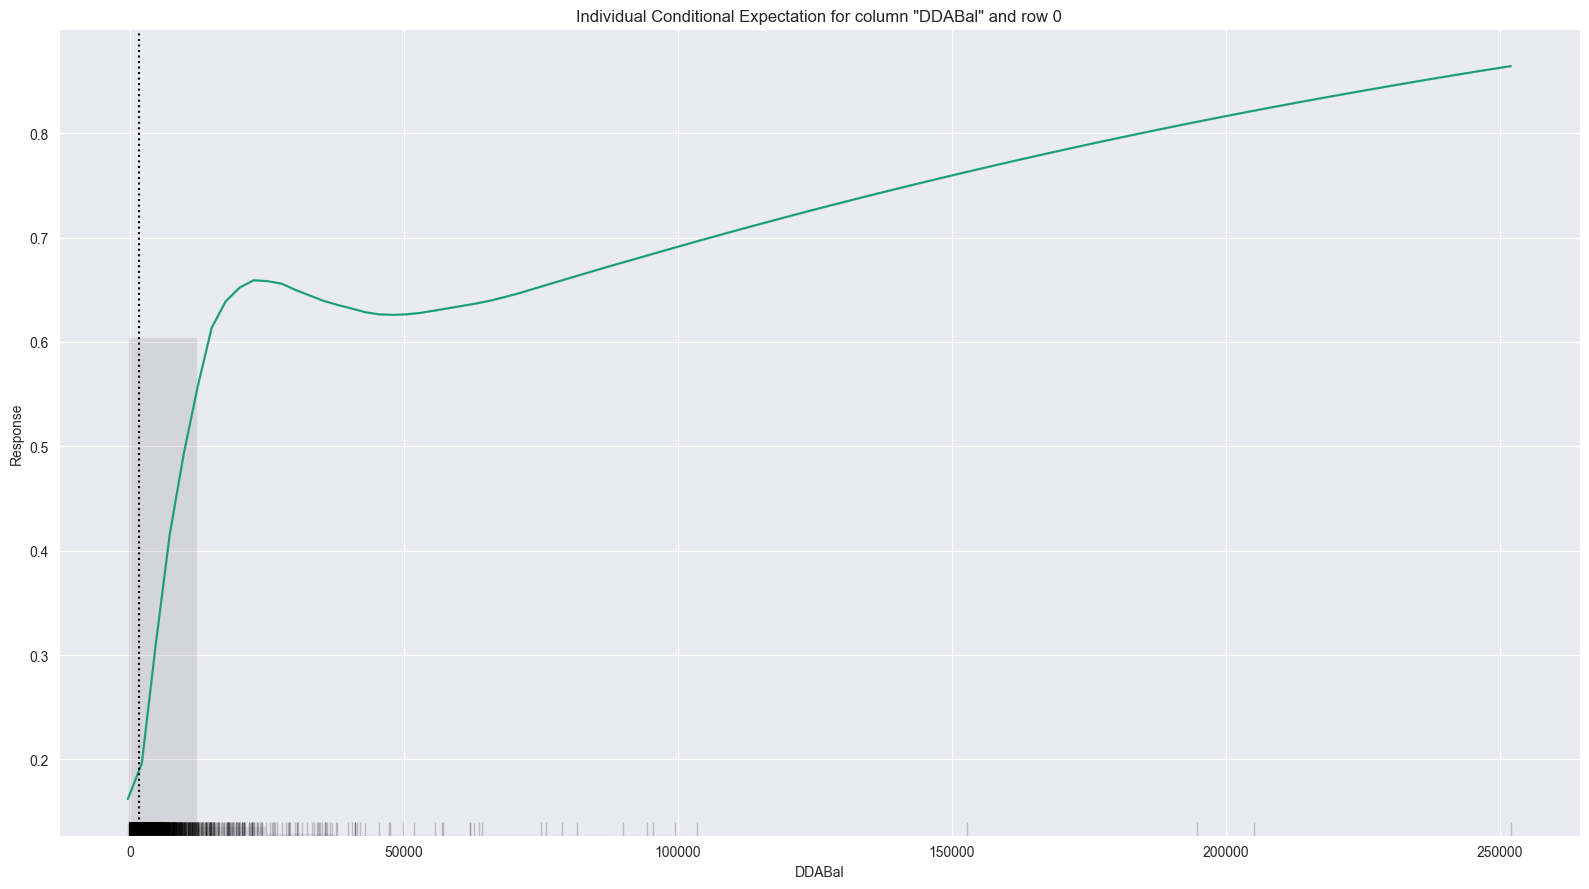

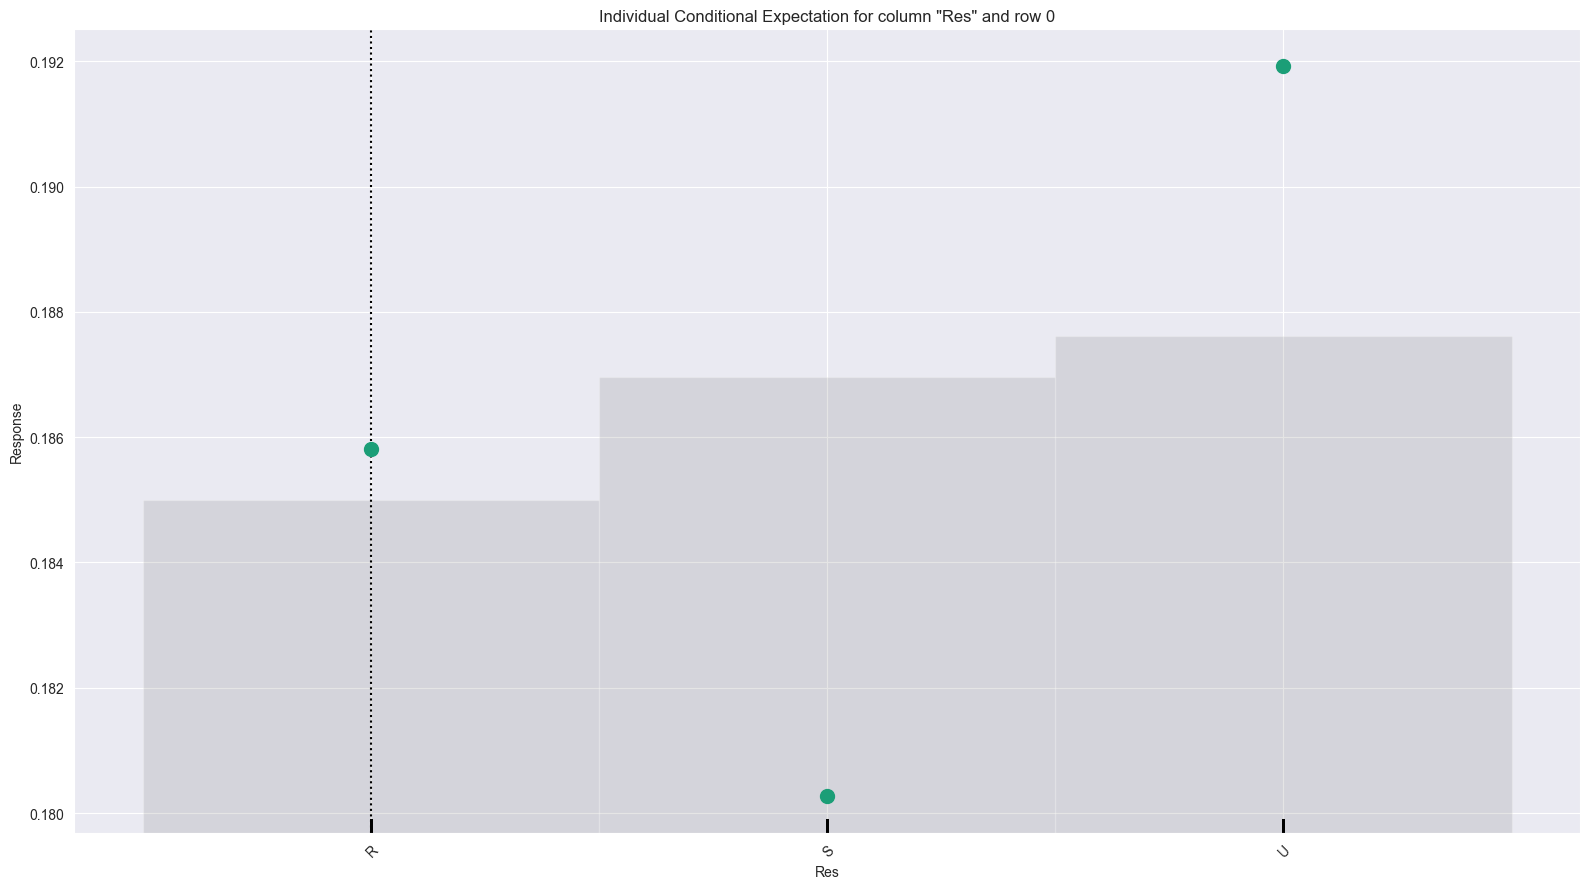

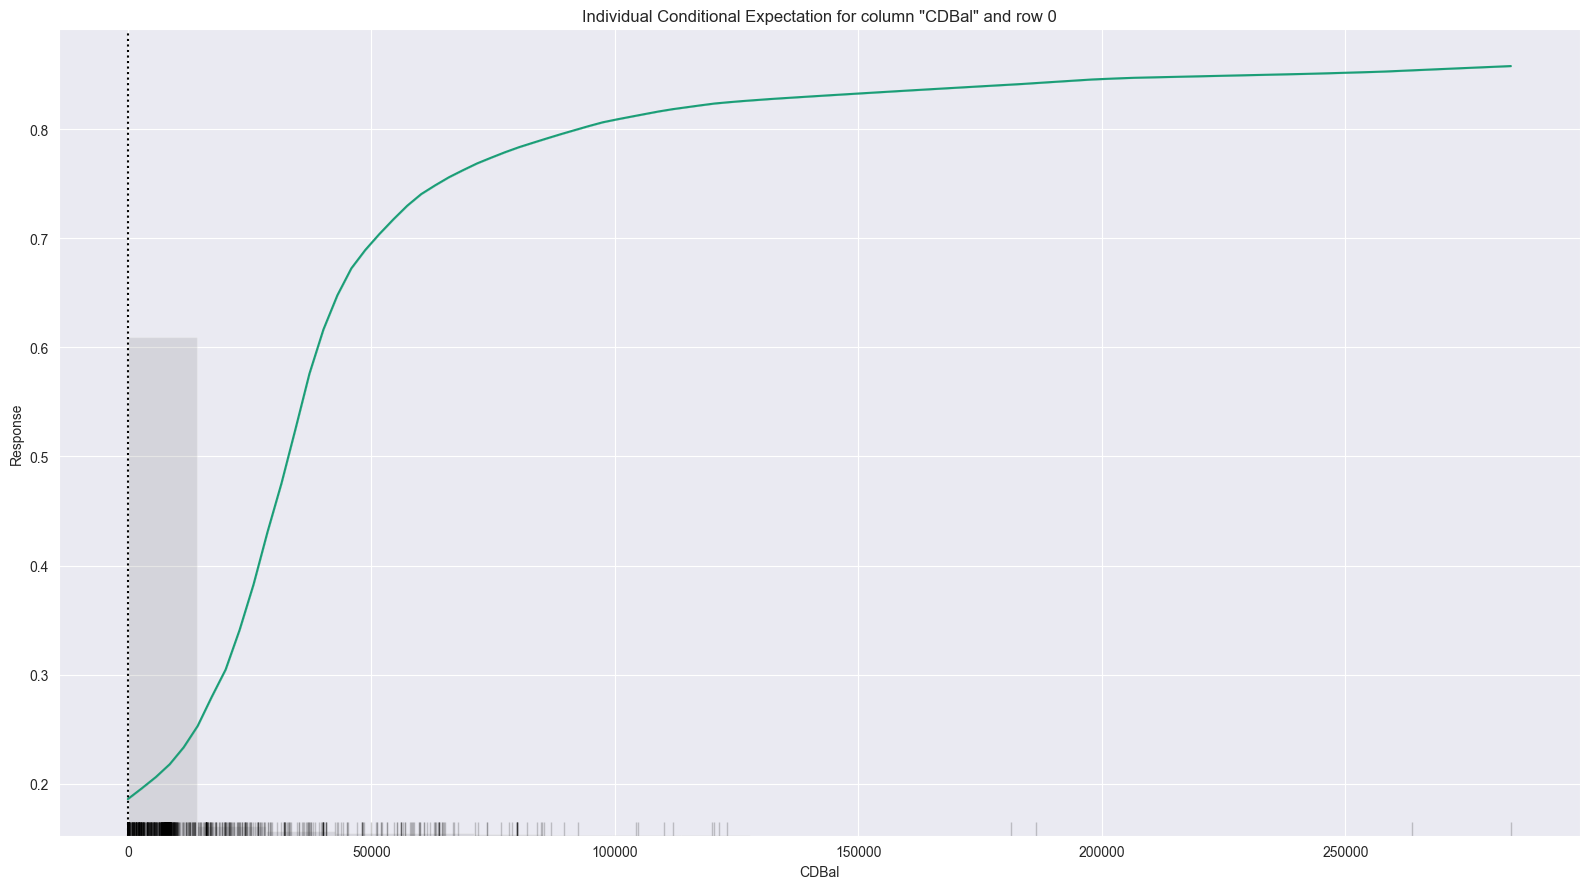

In [28]:
import h2o.explanation

# Sukurkite modelio aiškinimą su H2O Explainability funkcija
h2o.explain(dl_model, test_h2o)

# Paaiškinkite konkretų įrašą
h2o.explain_row(dl_model, test_h2o, row_index=0)

### Random Forest


In [5]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

# Hiperparametrų rinkinį
hyper_params = {
    'ntrees': [50],        # Skirtingas medžių skaičius
    'max_depth': [10],       # Skirtingas maksimalus gylis
    'min_rows': [5],          # Minimalus įrašų skaičius mazge
    'sample_rate': [0.8],  # Pavyzdžių atrankos norma
    'mtries': [5]             # Požymių skaičius, atrinktas kiekvienam medžiui (naudokite -1 visiems požymiams)
}

# Sukuriame „Random Forest“ modelį su H2OGridSearch
grid_search = H2OGridSearch(
    model=H2ORandomForestEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria={
        "strategy": "Cartesian"  # Išbandys kiekvieną kombinaciją, galima naudoti „RandomDiscrete“ greitesniam paieškojimui
    }
)

# Peliedizame tinklelio paiešką
grid_search.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
    max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                       logloss
--  -----------  ----------  --------  --------  -------------  --------------------------------------------------------------  ---------
    10           5           5         50        0.8            Grid_DRF_py_1_sid_95ef_model_python_1731085109530_1783_model_1  0.5305

In [6]:
# Peržiūrėkite tinklelio paieškos rezultatus
grid_results = grid_search.get_grid(sort_by="auc", decreasing=True)
print(grid_results)

# Gaukite geriausią modelį pagal AUC
best_rf_model = grid_results.models[0]

# Išveskite geriausio modelio parametrus ir našumą
print("Best model parameters:", best_rf_model.params)
print("Best model AUC:", best_rf_model.auc())

Hyper-Parameter Search Summary: ordered by decreasing auc
    max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                       auc
--  -----------  ----------  --------  --------  -------------  --------------------------------------------------------------  --------
    10           5           5         50        0.8            Grid_DRF_py_1_sid_95ef_model_python_1731085109530_1783_model_1  0.794479
Best model parameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_DRF_py_1_sid_95ef_model_python_1731085109530_1783_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_DRF_py_1_sid_95ef_model_python_1731085109530_1783_model_1'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_1_sid_95ef', 'type': 'Key<Frame>',

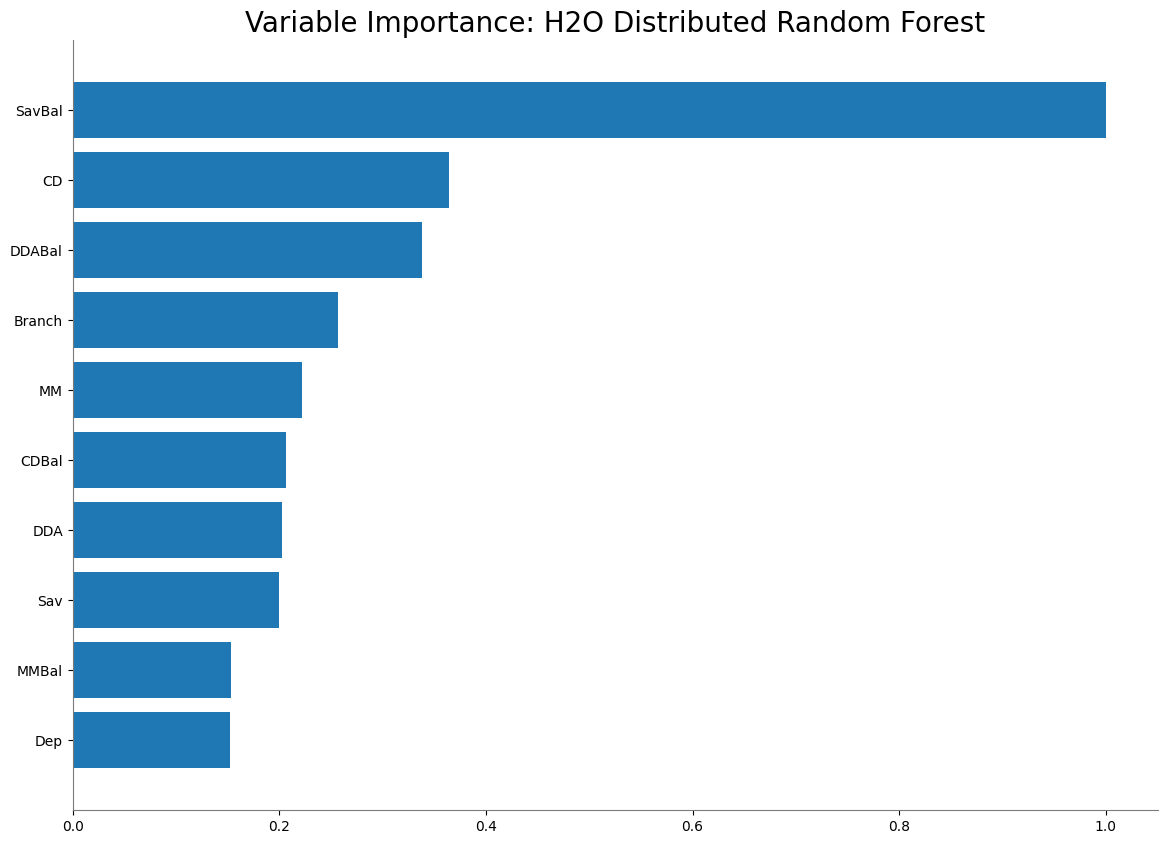

<Figure size 640x480 with 0 Axes>

In [68]:
# Sukurkite kintamųjų svarbos diagramą
best_rf_model.varimp_plot()

In [37]:
mojo_path = best_rf_model.download_mojo(path=os.getcwd(), get_genmodel_jar=False)
print("MOJO path:", mojo_path)

MOJO path: /Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/6 - notebooks/Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_81.zip


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## Grid_DRF_py_2_sid_b1a0_model_python_1728838744377_14457_model_81

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39812697762747606
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3209  1009  0.2392   (1009.0/4218.0)
1      618   1617  0.2765   (618.0/2235.0)
Total  3827  2626  0.2521   (1627.0/6453.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

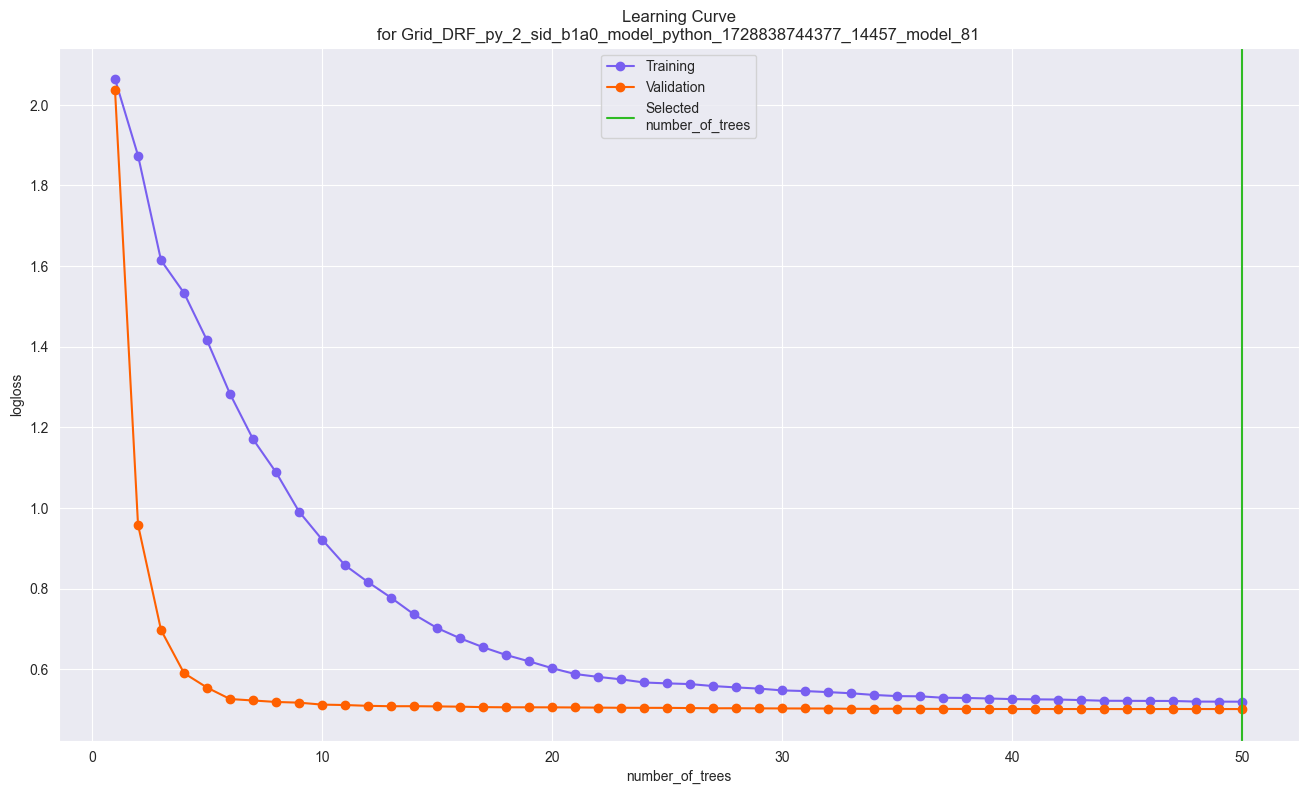

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

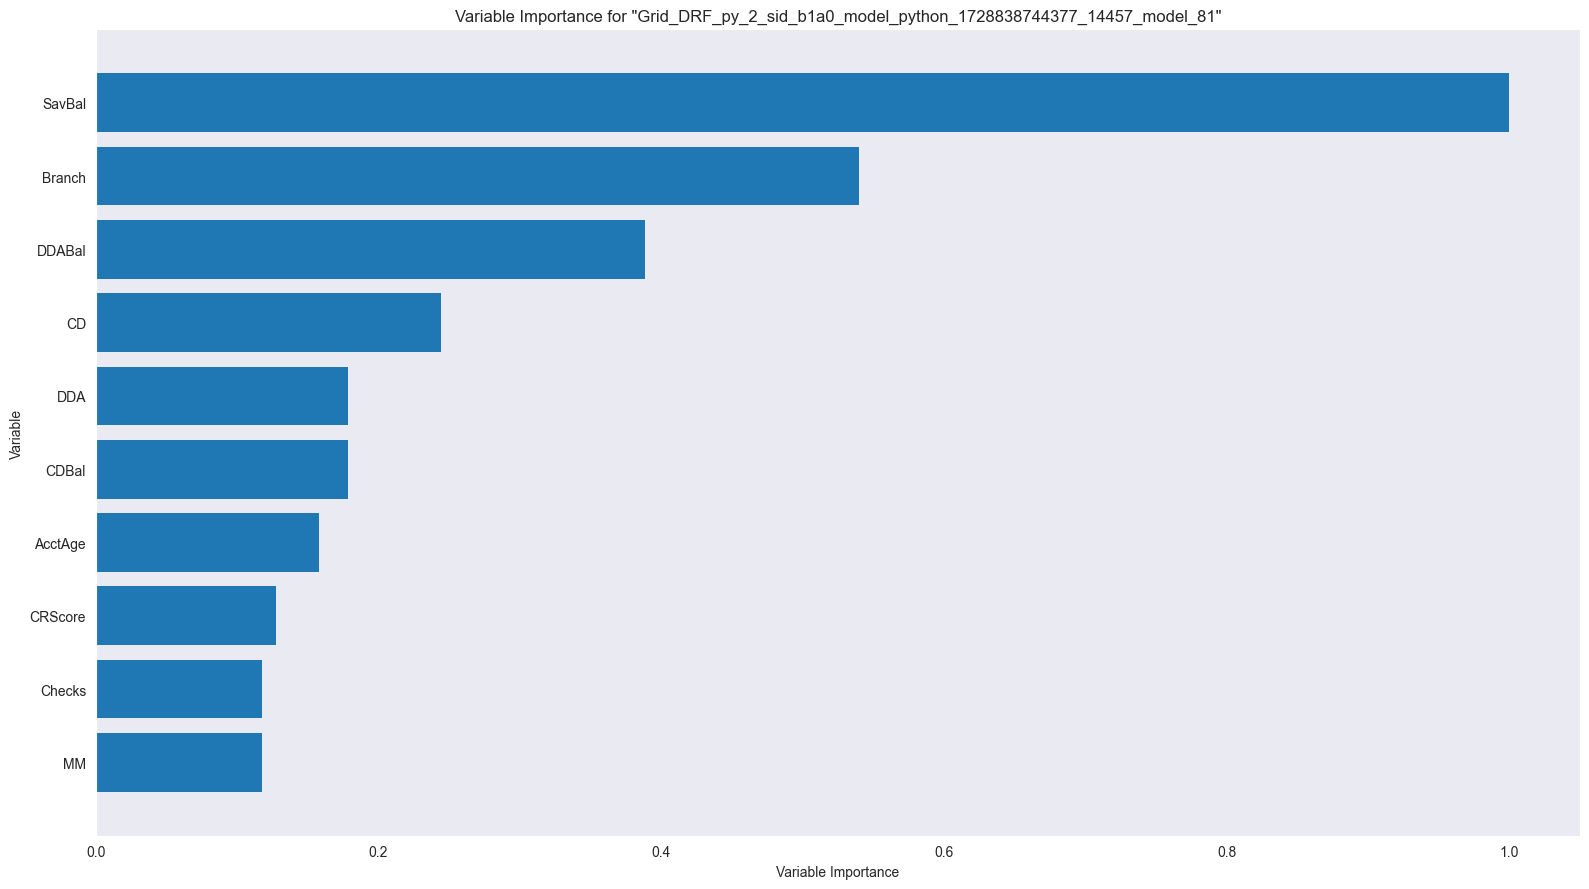

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

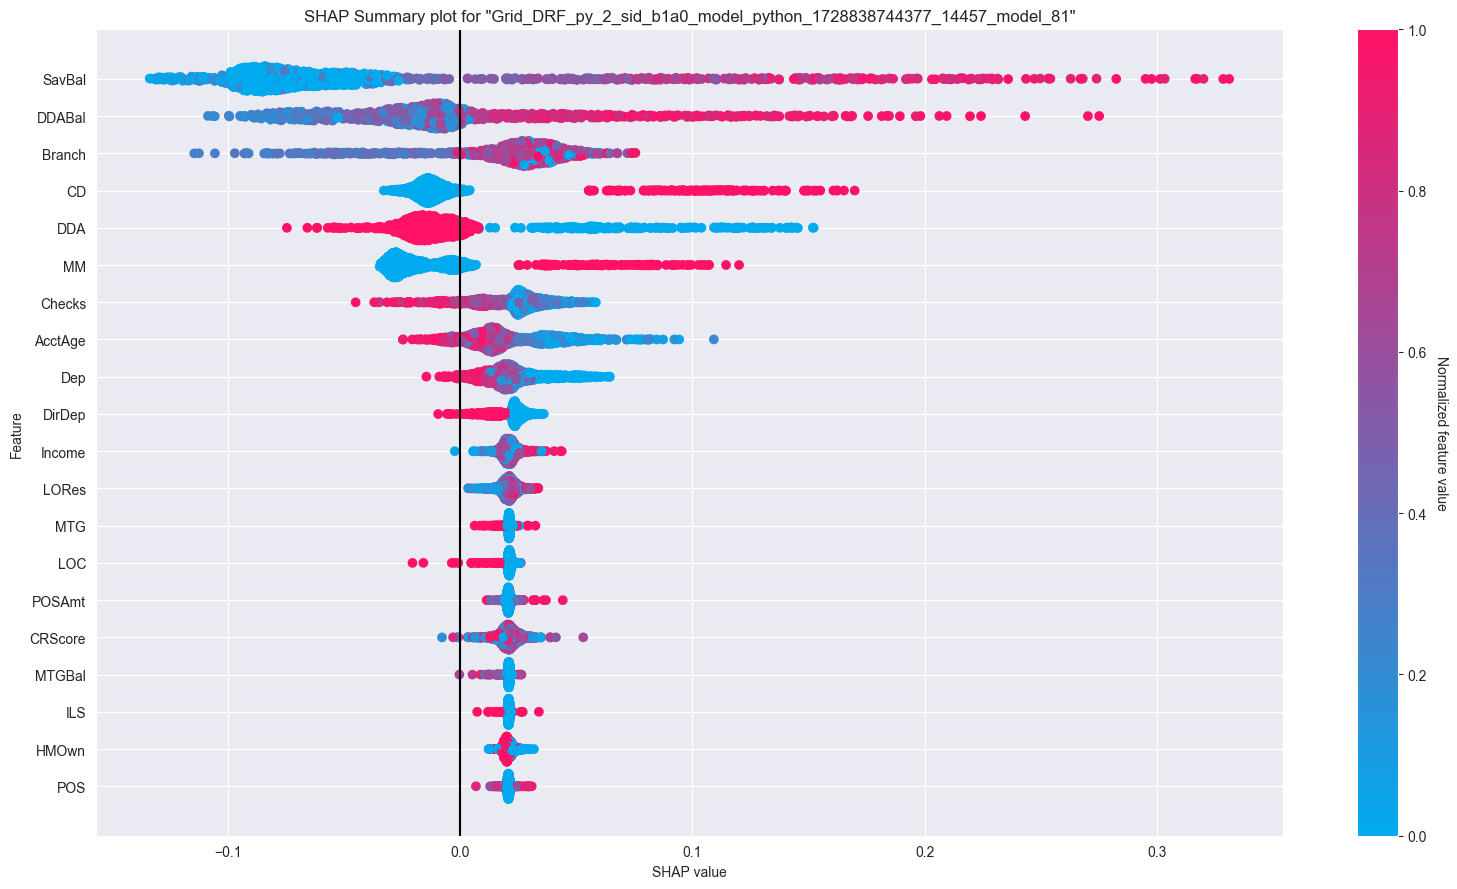

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

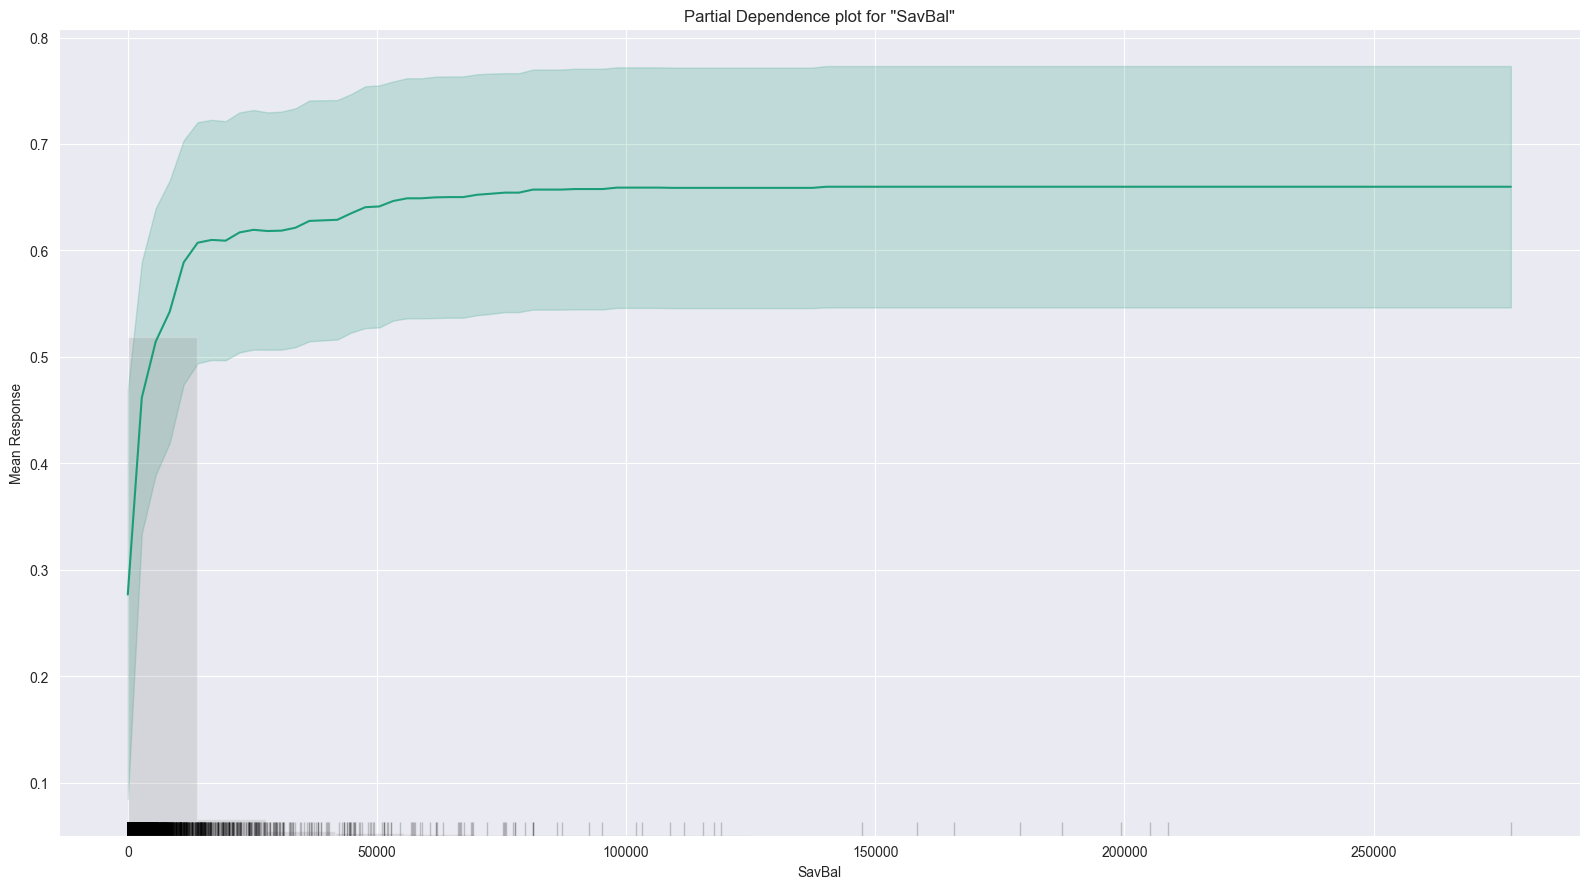

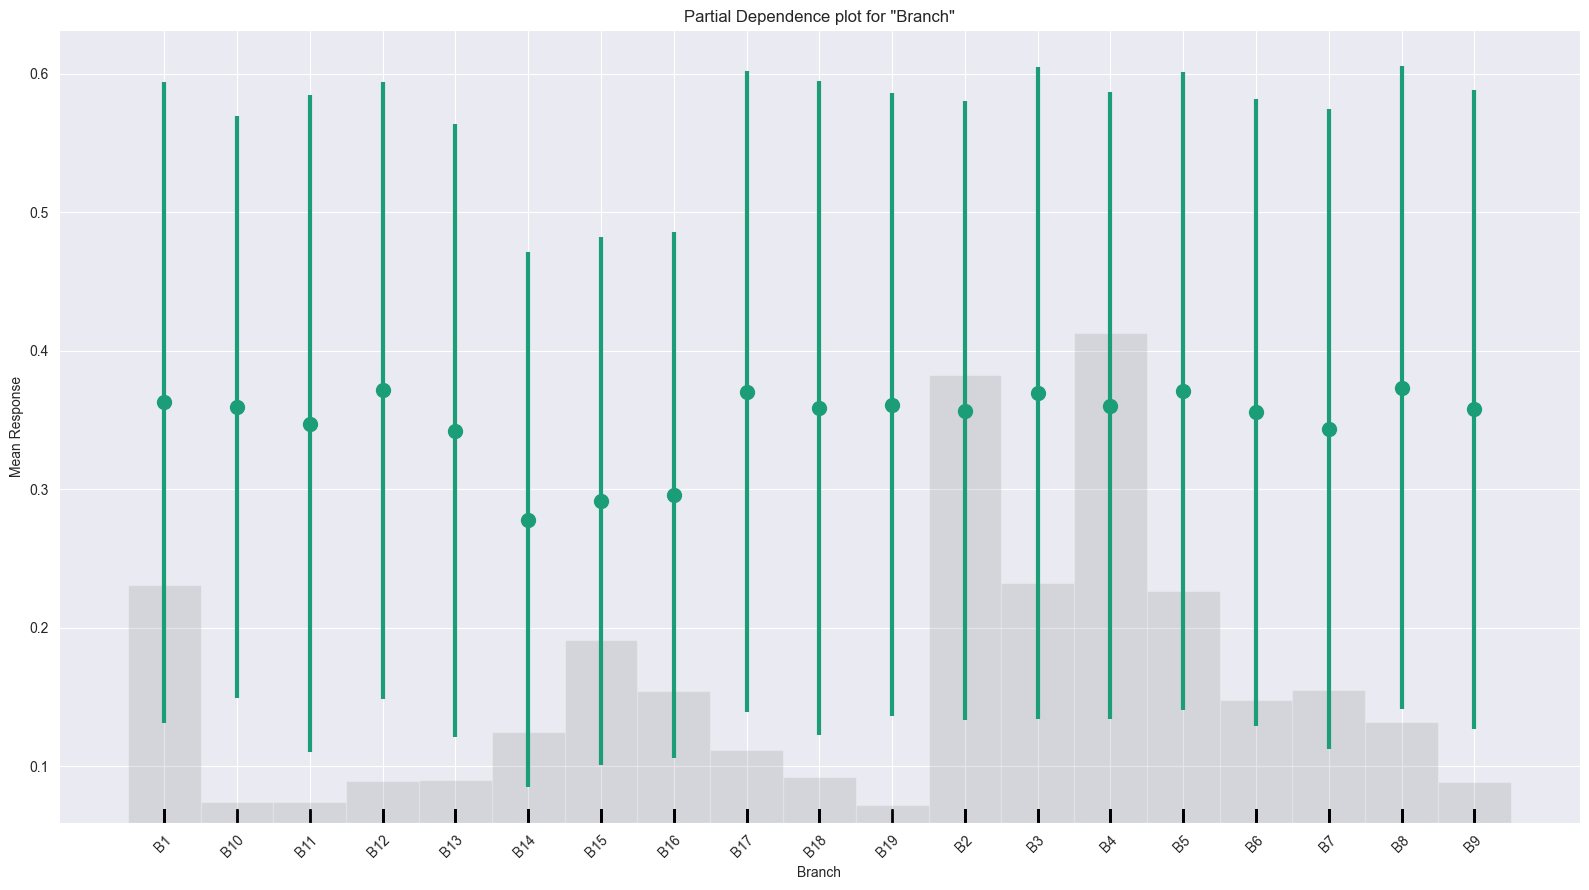

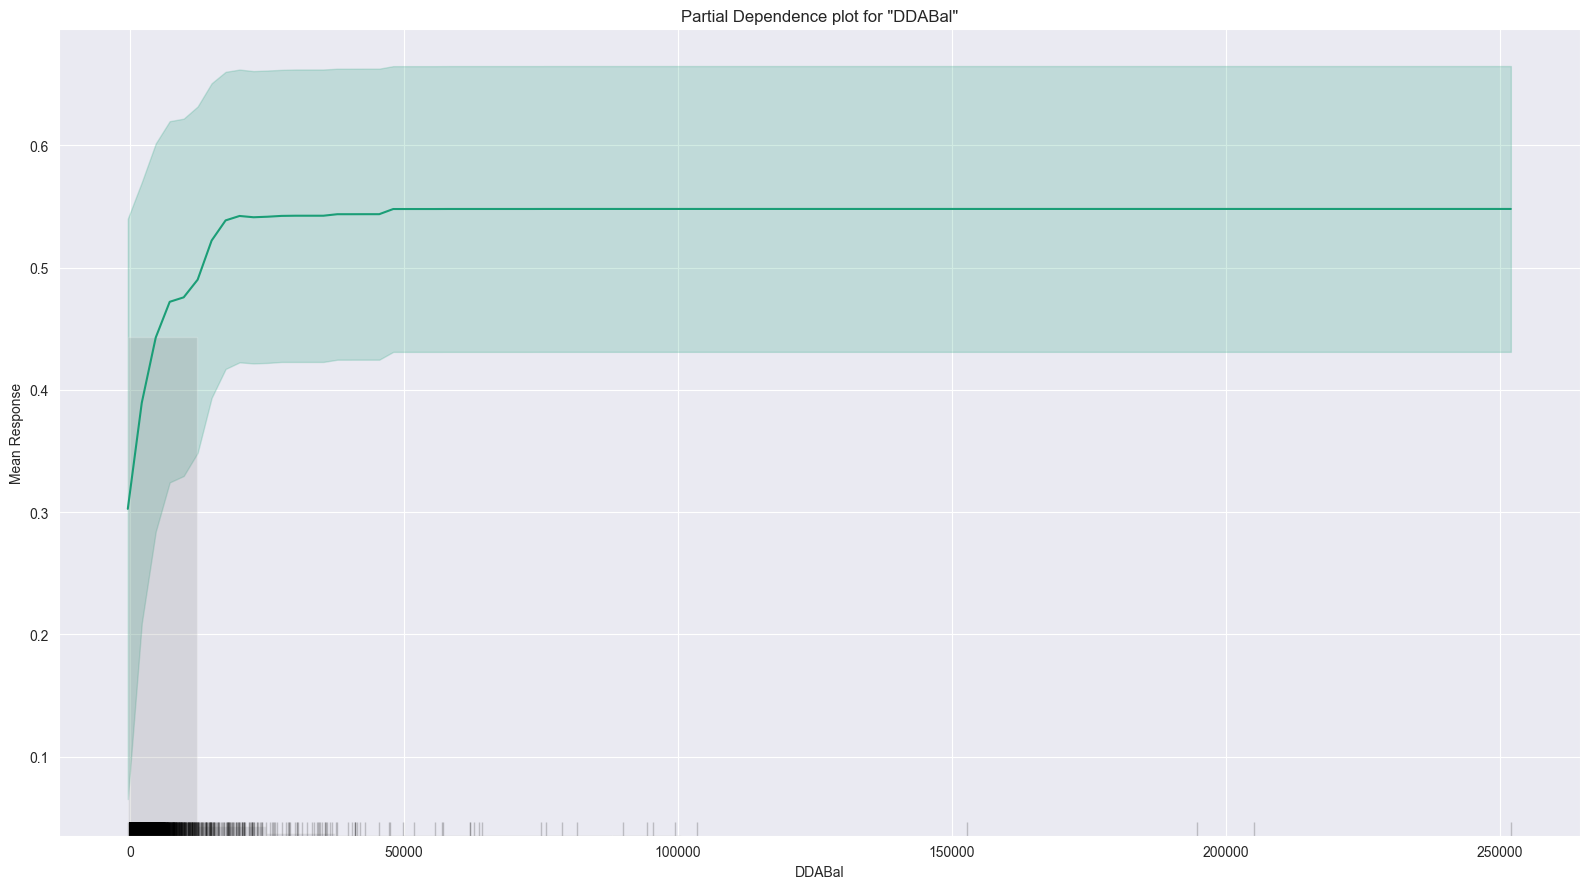

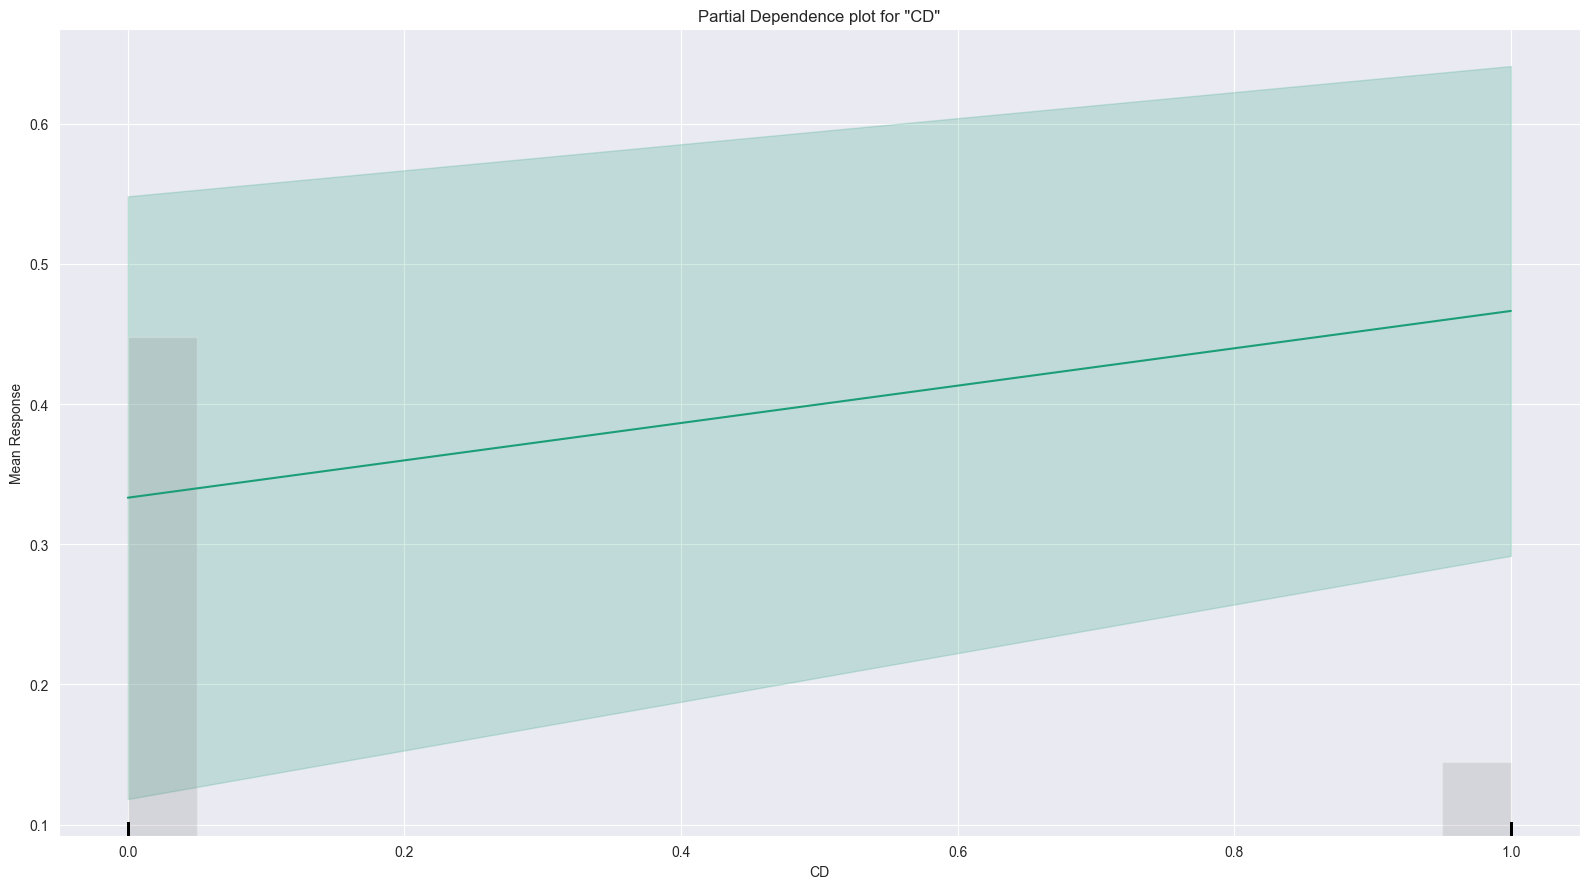

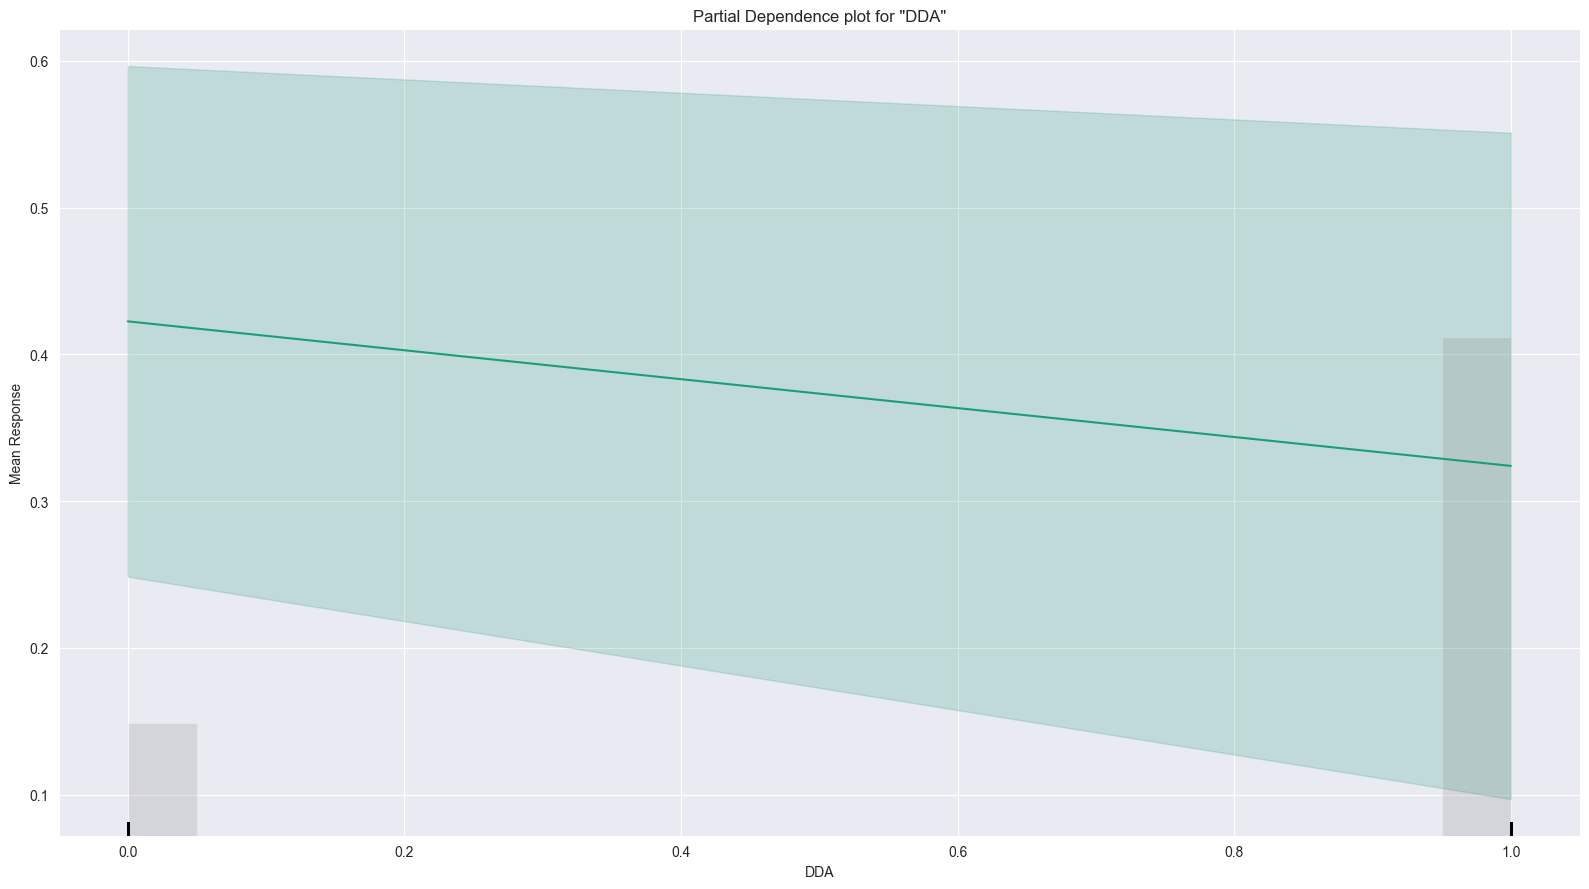

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

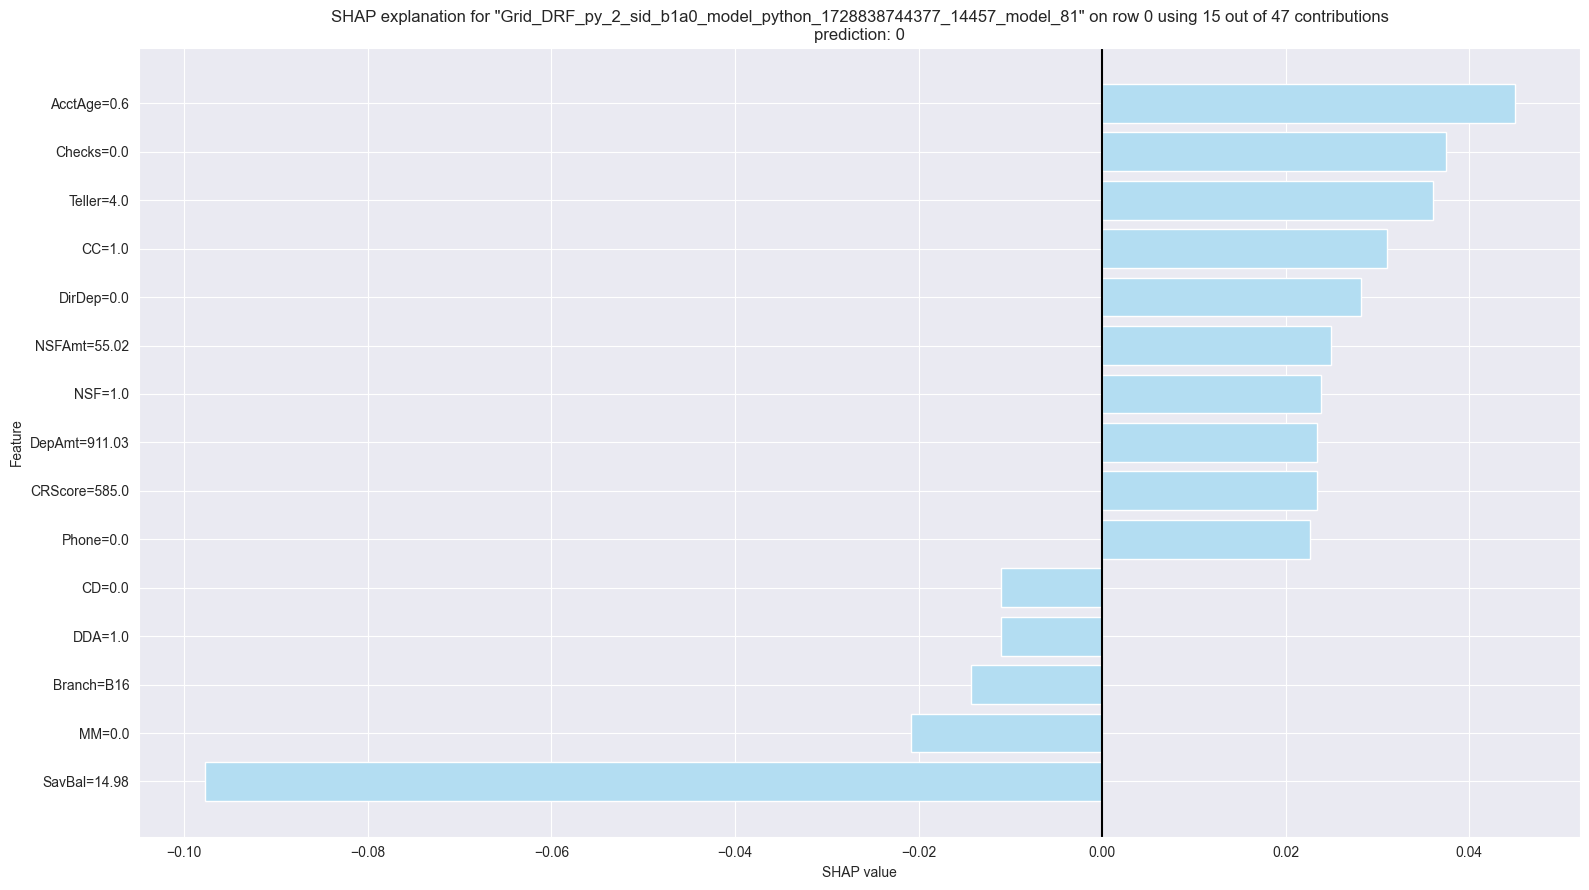

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

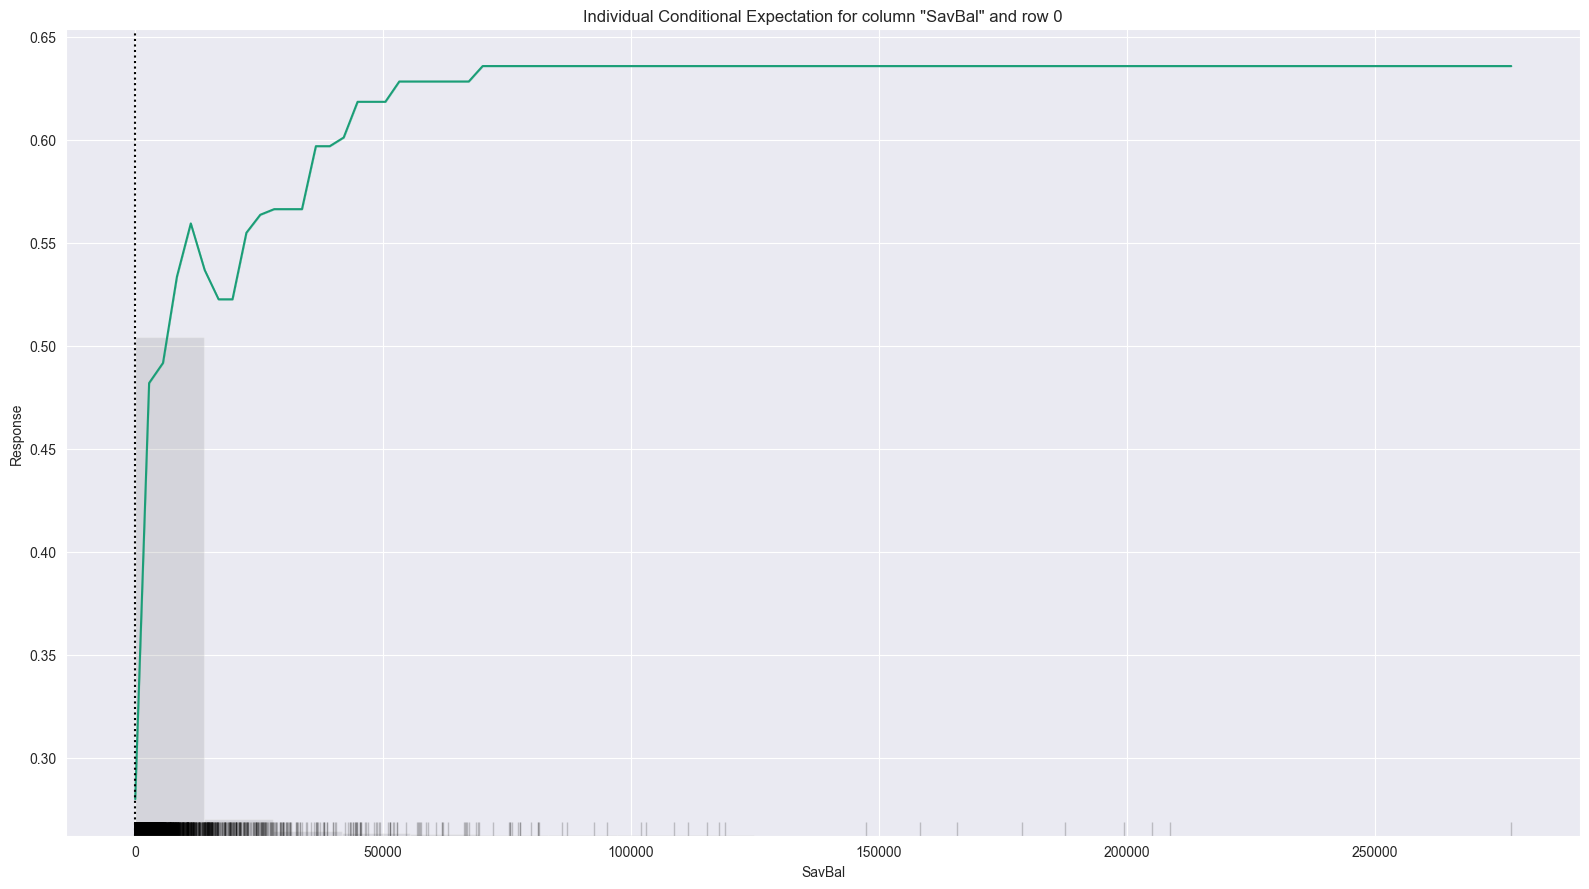

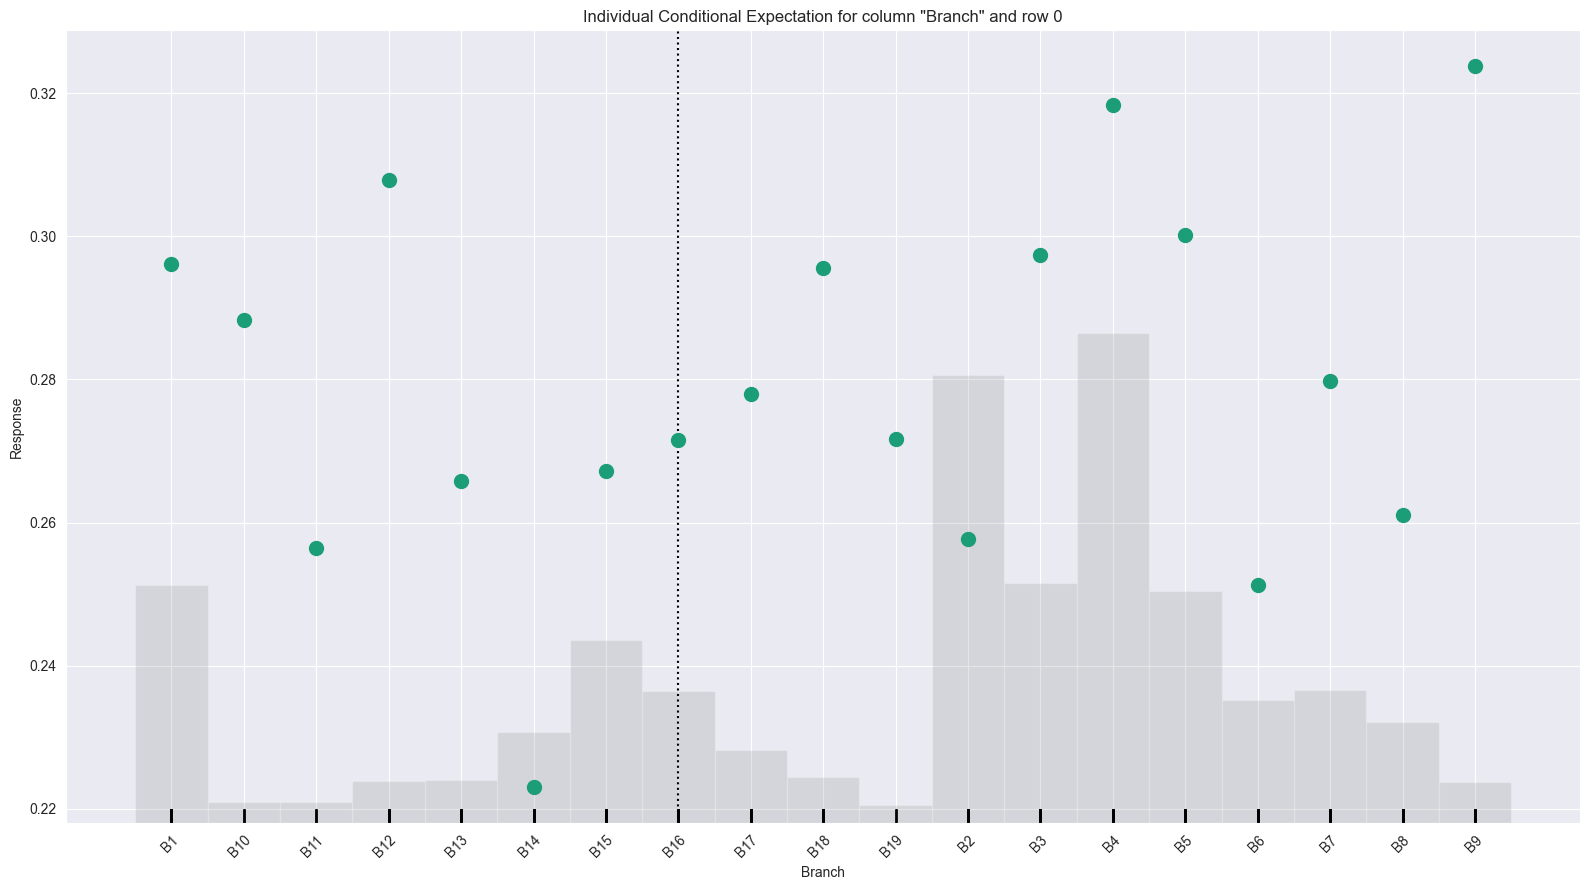

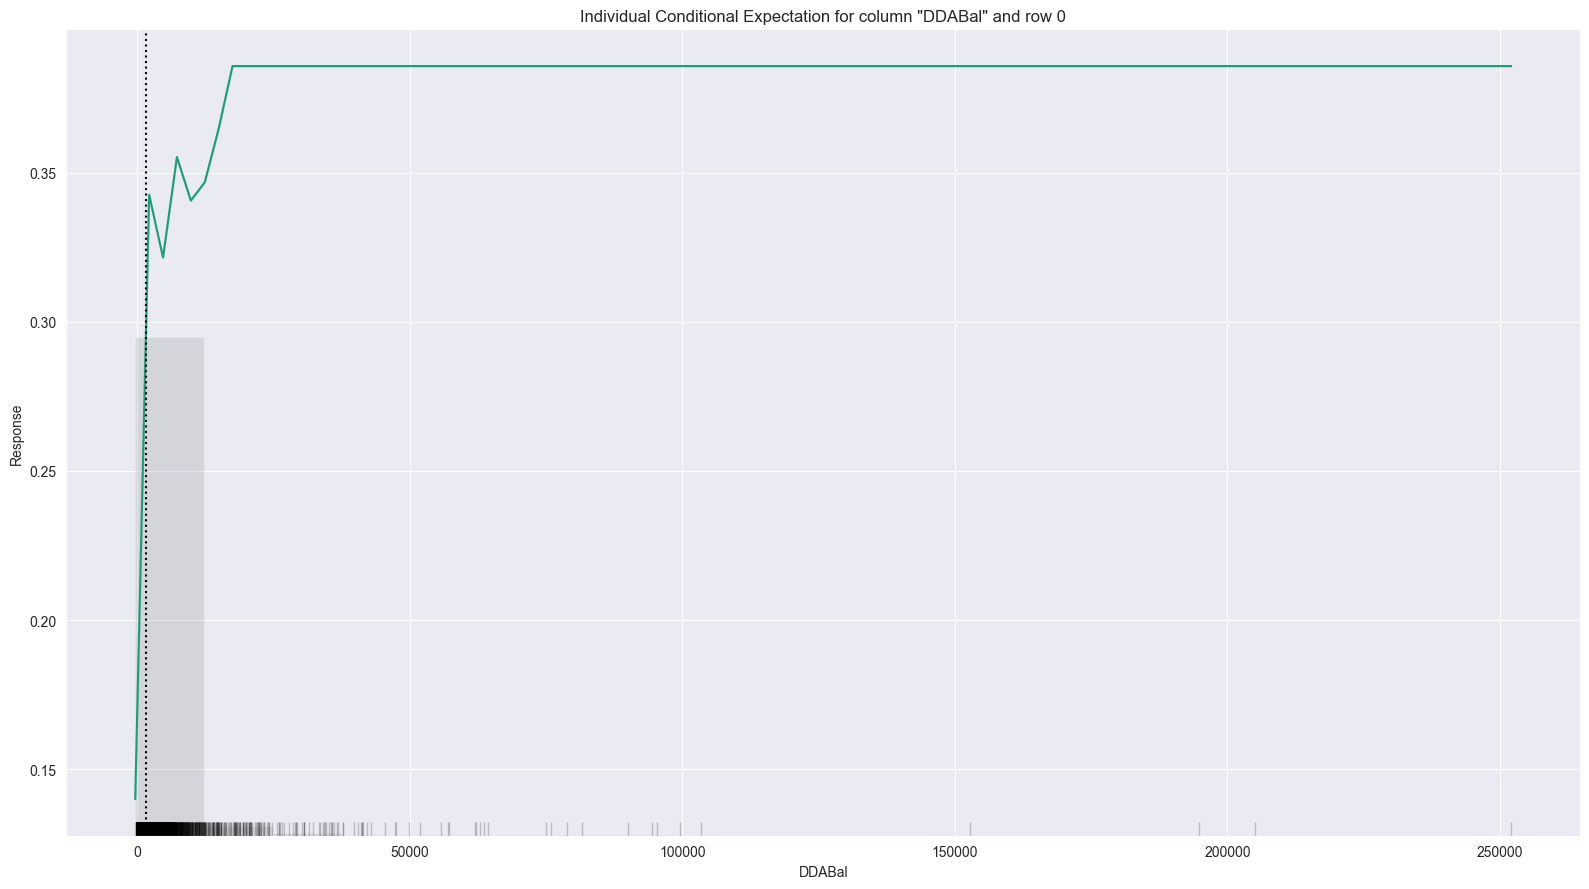

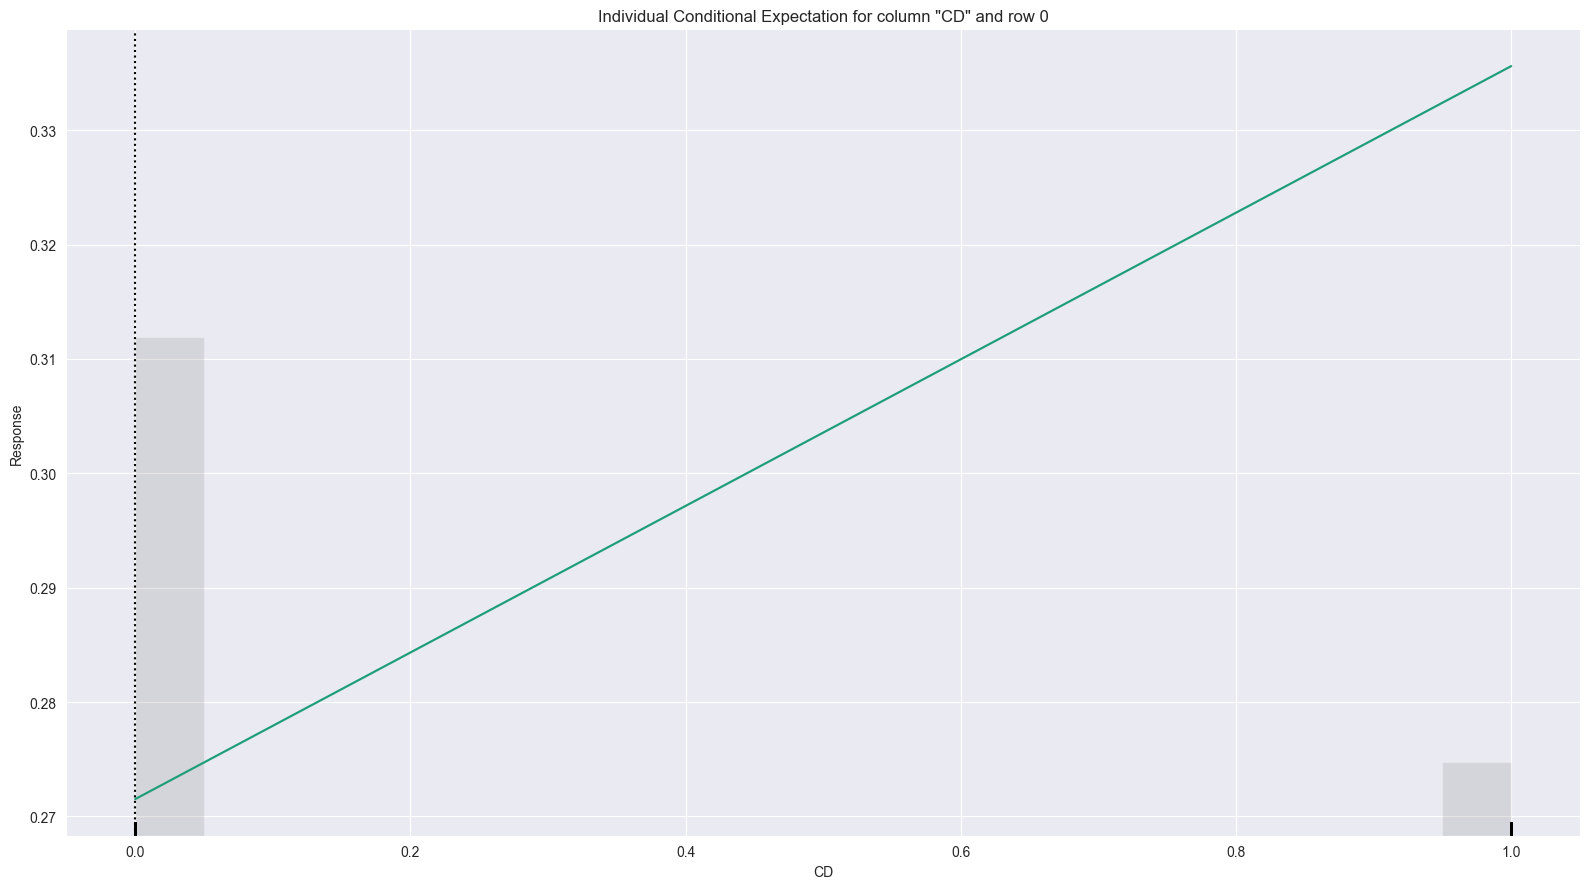

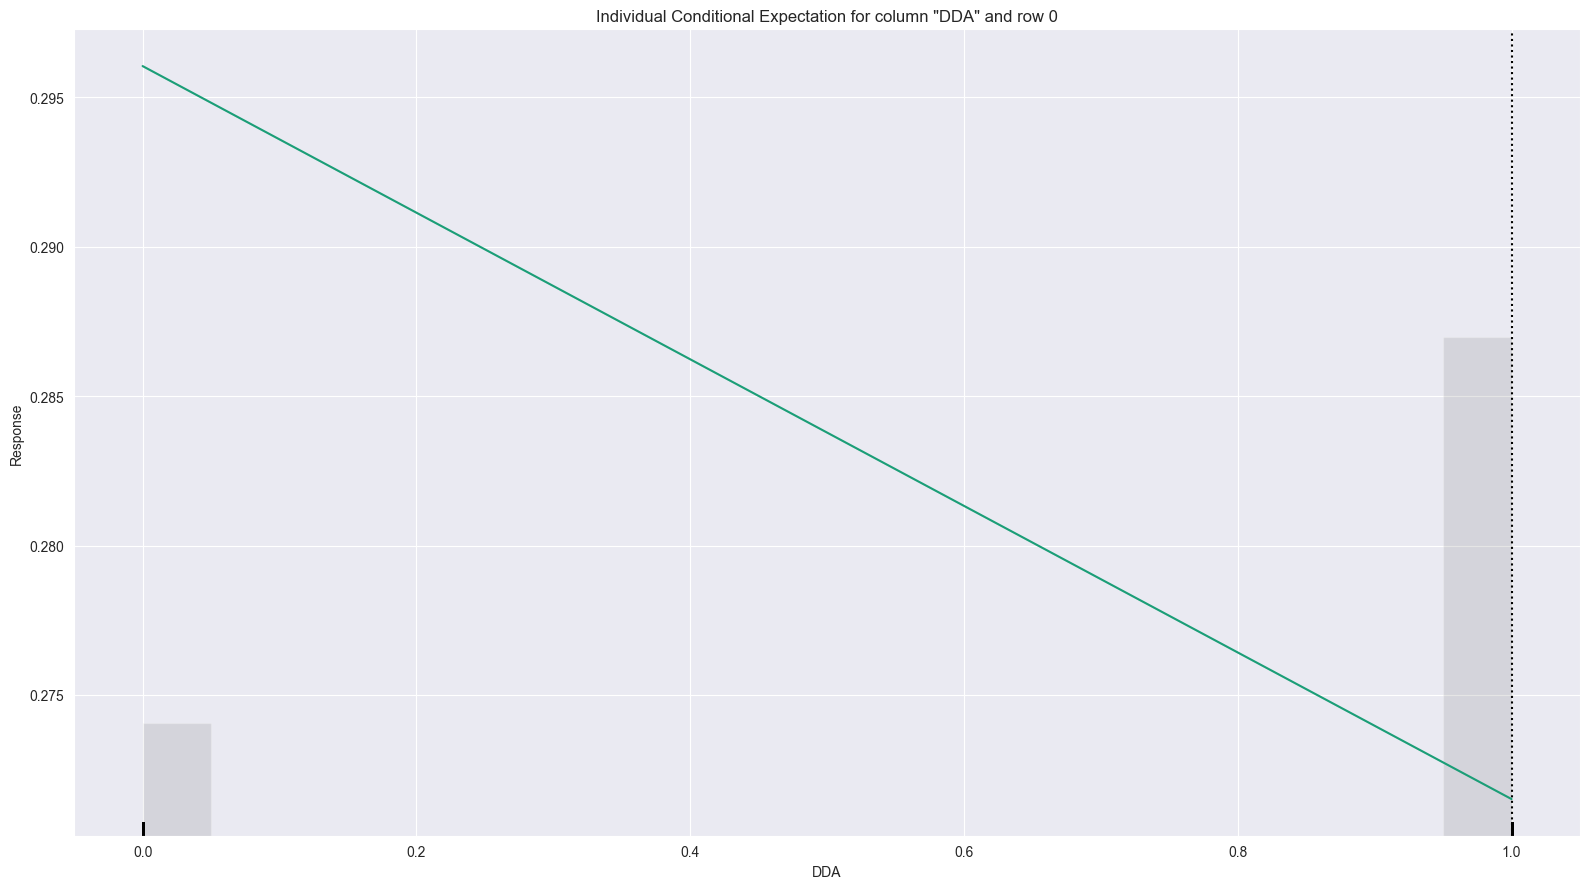

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

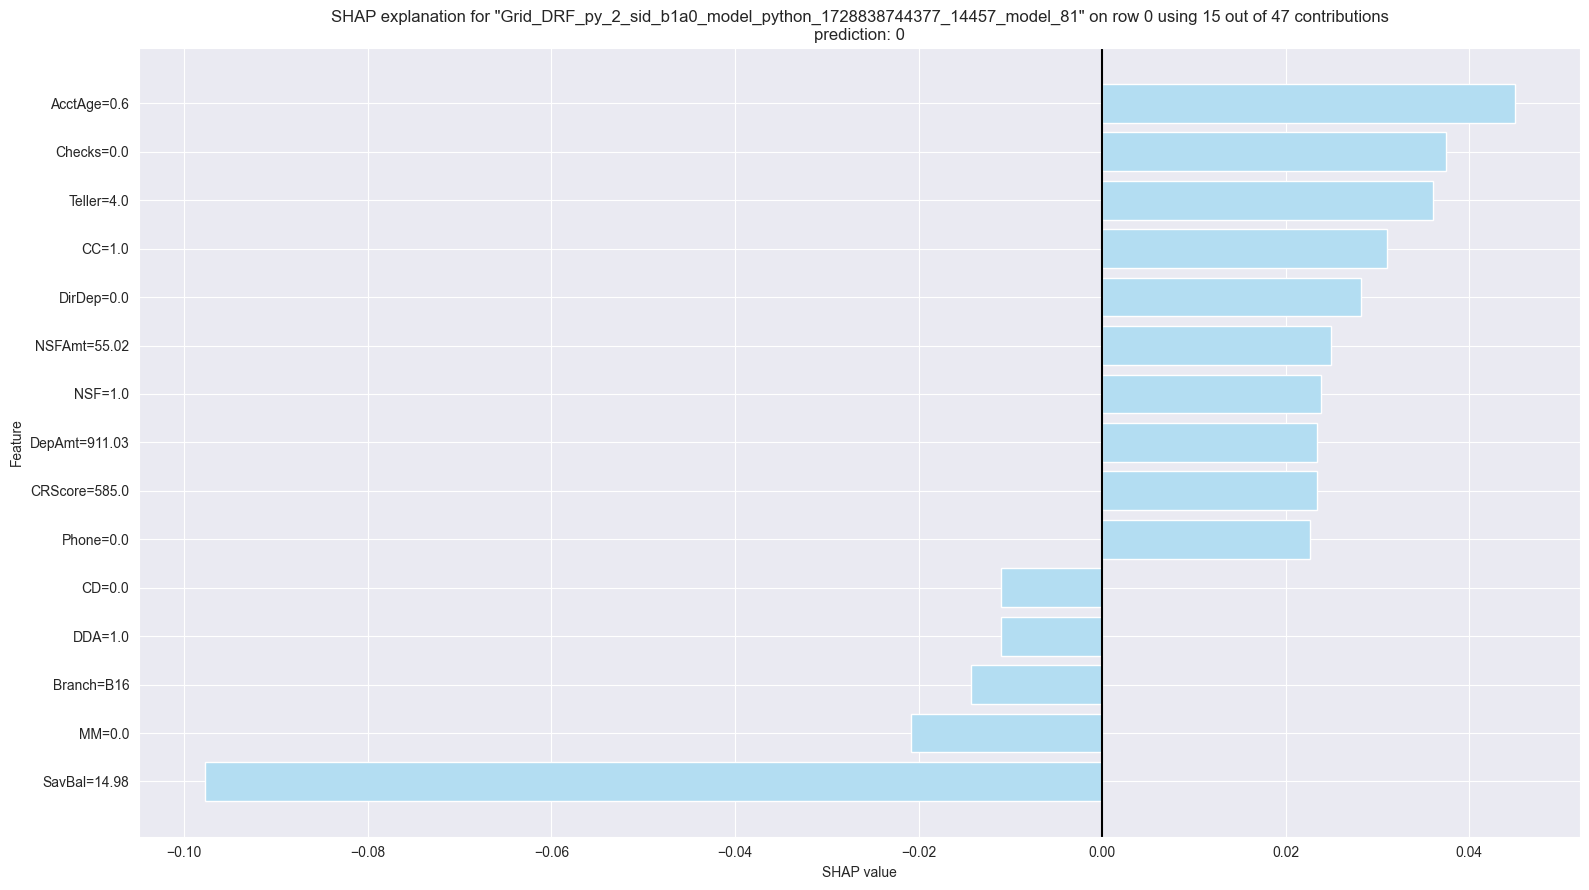

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

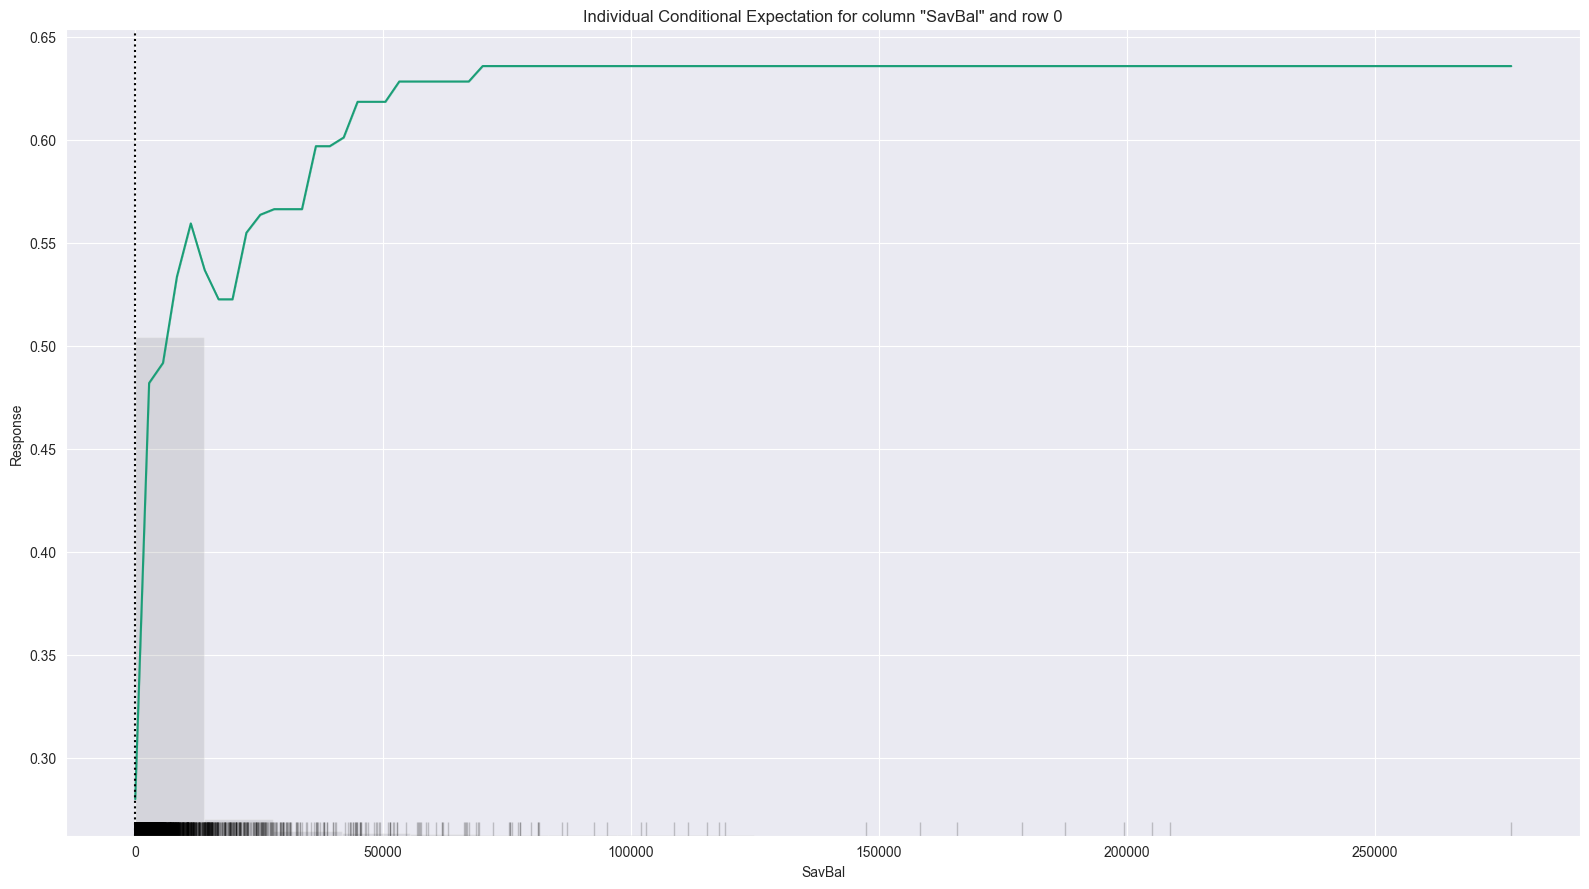

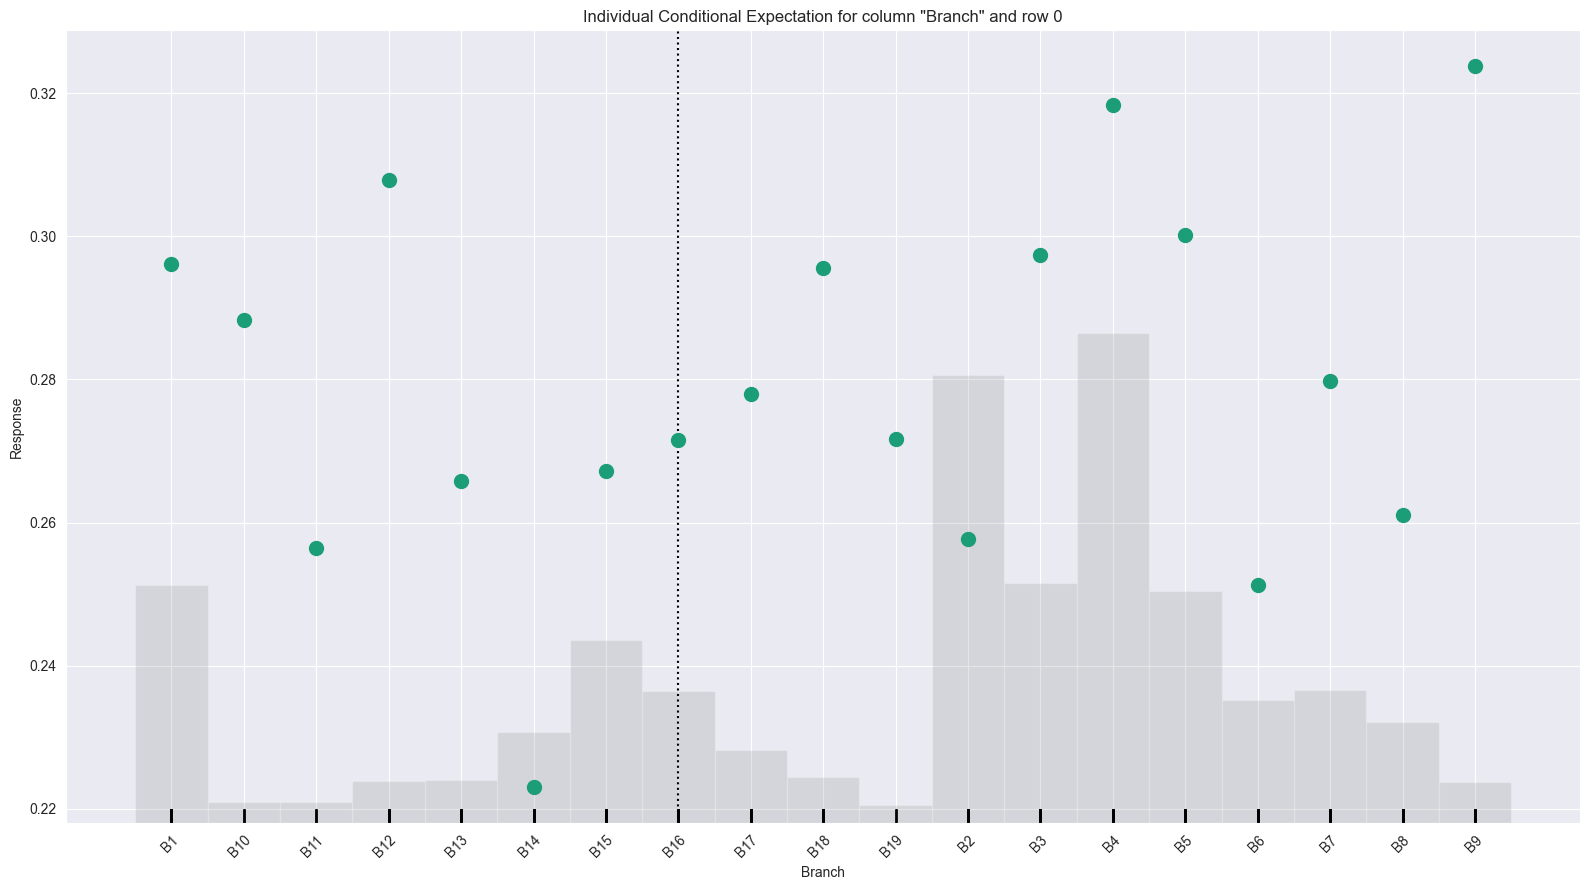

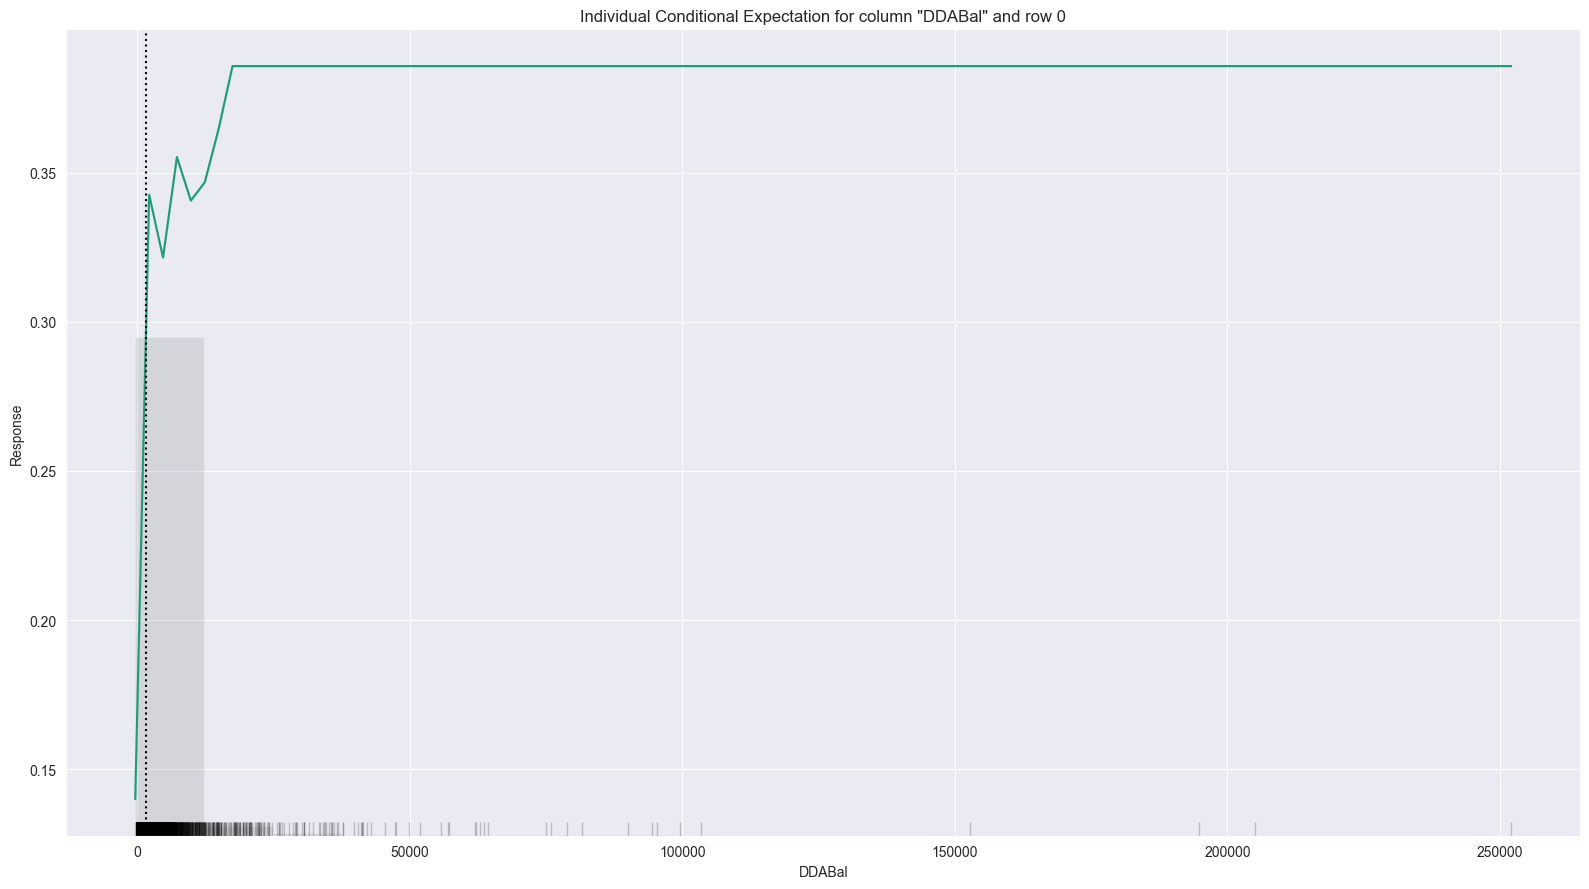

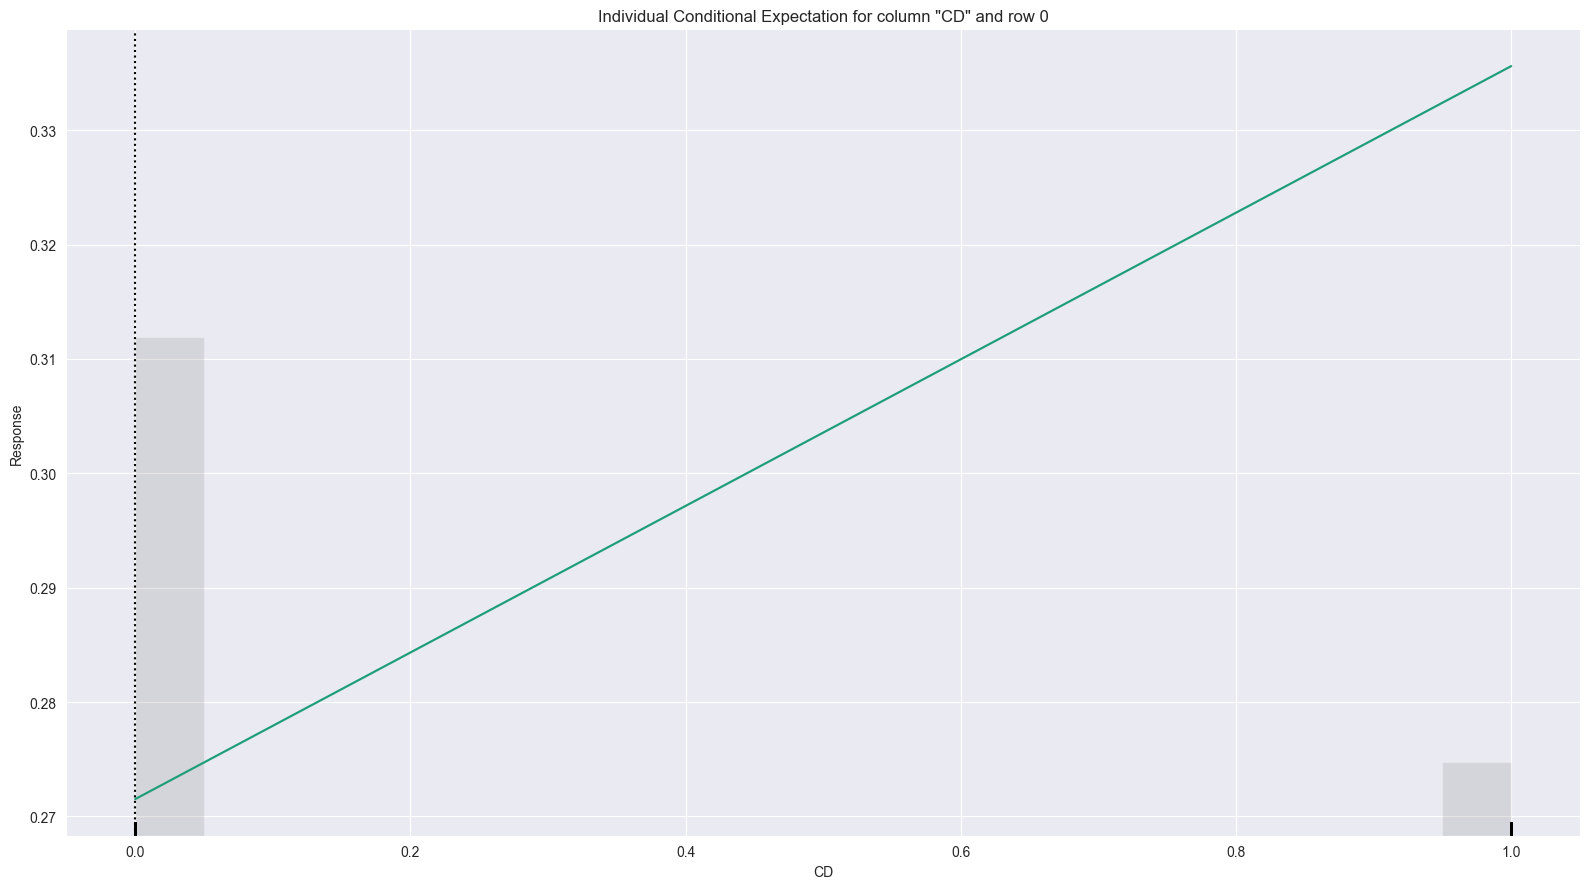

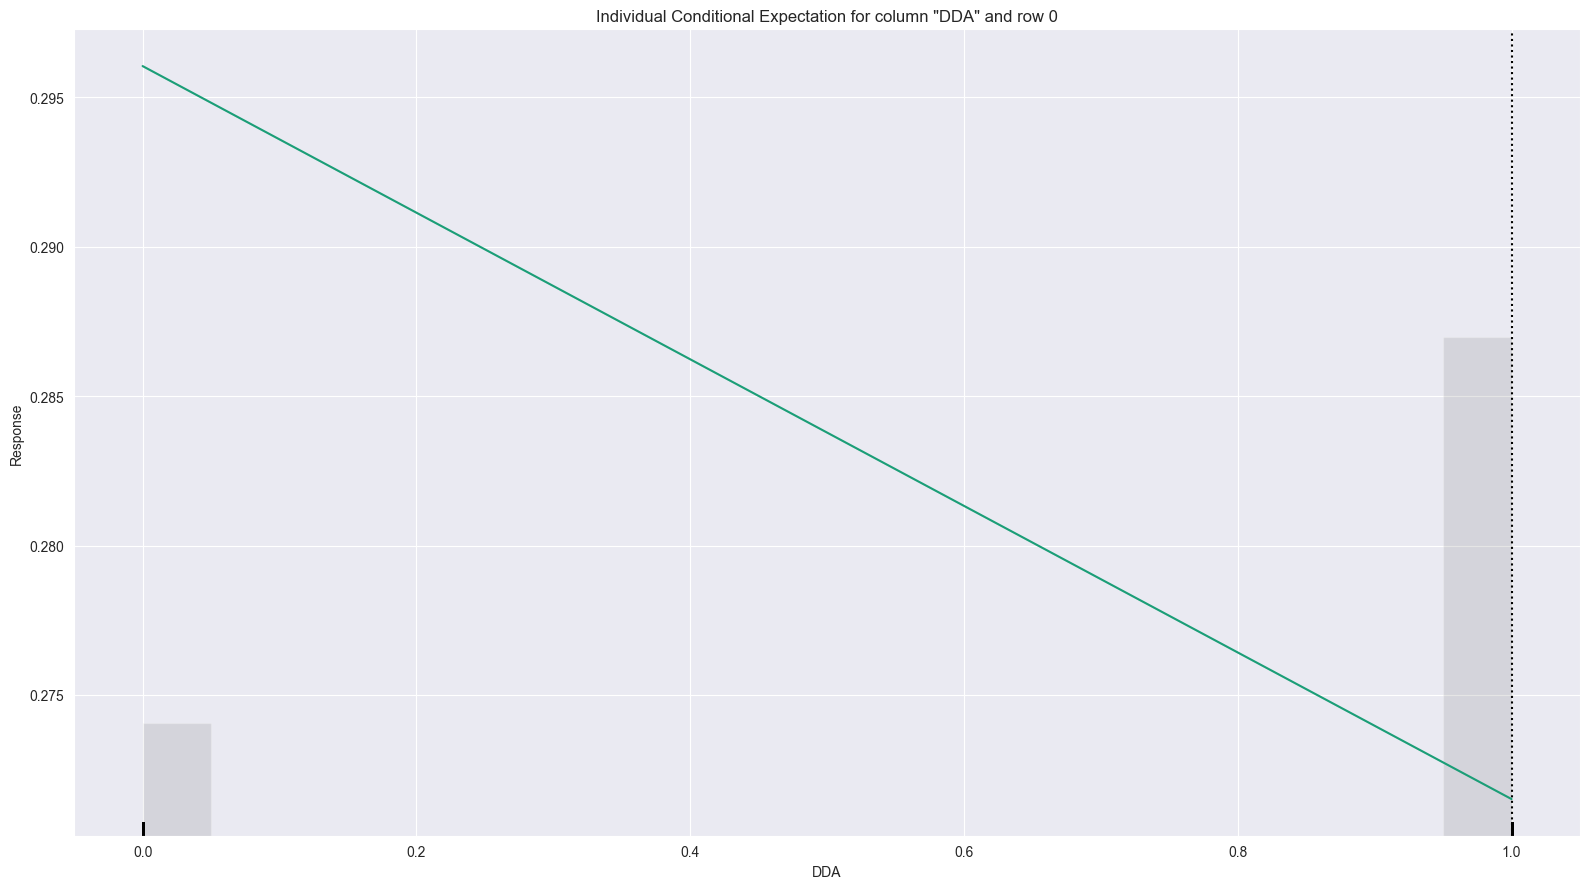

In [38]:
import h2o.explanation

# Bendras modelio paaiškinimas
h2o.explain(best_rf_model, test_h2o)

# Konkretus įrašo paaiškinimas
h2o.explain_row(best_rf_model, test_h2o, row_index=0)

### Naive Bayes

In [7]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator

# Hiperparametrų tinklelį
hyper_params = {
    'laplace': [0, 1, 2],       # Laplace sklandinimo parametras
    'min_sdev': [0.001, 0.01, 0.1],  # Minimalus standartinis nuokrypis
    'eps_sdev': [0, 1e-4, 1e-3] # Saugumo slenkstis nuokrypiui
}

# Sukuriame Naiviojo Bayeso modelio tinklelio paiešką su H2OGridSearch
grid_search = H2OGridSearch(
    model=H2ONaiveBayesEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria={
        "strategy": "Cartesian"  # Išbandys visas kombinacijas, galima naudoti „RandomDiscrete“ greitesniam paieškojimui
    }
)

# Paleidziama tinklelio paiešką
grid_search.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

naivebayes Grid Build progress: |████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
     eps_sdev    laplace    min_sdev    model_ids                                                               logloss
---  ----------  ---------  ----------  ----------------------------------------------------------------------  ------------------
     0.0         0.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_1   2.6324280423049458
     0.0         0.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_10  2.6324280423049458
     0.0001      0.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_11  2.6324280423049458
     0.001       0.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_12  2.6324280423049458
     0.0         0.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_19  2.6324280423049458
     0.0001      0.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_2   2.6324280423049458
     0.0001      0.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_20  2.6324280423049458
     0.001       0.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_21  2.6324280423049458
     0.001       0.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_3   2.6324280423049458
     0.0         1.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_13  2.6324351038588087
---  ---         ---        ---         ---                                                                     ---
     0.001       1.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_6   2.6324351038588087
     0.0         2.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_16  2.632442666708496
     0.0001      2.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_17  2.632442666708496
     0.001       2.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_18  2.632442666708496
     0.0         2.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_25  2.632442666708496
     0.0001      2.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_26  2.632442666708496
     0.001       2.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_27  2.632442666708496
     0.0         2.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_7   2.632442666708496
     0.0001      2.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_8   2.632442666708496
     0.001       2.0        0.001       Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_9   2.632442666708496
[27 rows x 6 columns]

In [8]:
# Gaukite tinklelio paieškos rezultatus
grid_results = grid_search.get_grid(sort_by="auc", decreasing=True)  # Pvz., rikiuojama pagal AUC
print(grid_results)

# Gaukite geriausią modelį
best_nb_model = grid_results.models[0]

# Išveskite geriausio modelio parametrus ir metrikas
print("Best model parameters:", best_nb_model.params)
print("Best model AUC:", best_nb_model.auc())

Hyper-Parameter Search Summary: ordered by decreasing auc
     eps_sdev    laplace    min_sdev    model_ids                                                               auc
---  ----------  ---------  ----------  ----------------------------------------------------------------------  ------------------
     0.0         1.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_13  0.7258941916130189
     0.0001      1.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_14  0.7258941916130189
     0.001       1.0        0.01        Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_15  0.7258941916130189
     0.0         1.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_22  0.7258941916130189
     0.0001      1.0        0.1         Grid_NaiveBayes_py_1_sid_95ef_model_python_1731085109530_1885_model_23  0.7258941916130189
     0.001       1.0        0.1         

### PANAUDOJAM SMOTE IR PAZIURIM AR PAGEREJO MODELIU KOKYBE ( DEL KLASIU DISBALANSO)


In [9]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('../2 - Data/develop.csv')  # Path to your data
target = 'Ins'  # Define your target variable

# Apply pd.get_dummies to the entire dataset
data_dummies = pd.get_dummies(data, drop_first=True)

# Split the dataset into train and test sets
train, test = train_test_split(data_dummies, test_size=0.2, random_state=42, stratify=data[target])

# Separate features and target in the training set
X_train = train.drop(columns=[target])
y_train = train[target]

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine resampled features and target back into a DataFrame
train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled[target] = y_train_resampled

# Convert resampled DataFrame and test set to H2O Frames
train_h2o_smote = h2o.H2OFrame(train_resampled)
test_h2o = h2o.H2OFrame(test)

# Convert the target column to a factor for classification
train_h2o_smote[target] = train_h2o_smote[target].asfactor()
test_h2o[target] = test_h2o[target].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
# AutoML with SMOTE-balanced data
aml_smote = H2OAutoML(max_models=20, seed=42, balance_classes=False)
aml_smote.train(x=train_h2o_smote.columns, y=target, training_frame=train_h2o_smote, validation_frame=test_h2o)

# Model performance evaluation
print("\nSMOTE Model Performance on Test Data:")
print(aml_smote.leader.model_performance(test_h2o))

AutoML progress: |
19:25:43.844: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
19:25:43.846: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

SMOTE Model Performance on Test Data:
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.16695124050195814
RMSE: 0.408596672162119
LogLoss: 0.5065128763703602
AUC: 0.8065477876322101
AUCPR: 0.6786154364839974
Gini: 0.6130955752644203
Null degrees of freedom: 6452
Residual degrees of freedom: 6444
Null deviance: 8945.757512307619
Residual deviance: 6537.05518243587
AIC: 6555.05518243587

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34566520597358963
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0 

In [11]:
lb = aml_smote.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_2_20241108_192543     0.894612   0.404225  0.906423                0.198743  0.362258  0.131231
StackedEnsemble_BestOfFamily_1_AutoML_2_20241108_192543  0.890825   0.410209  0.903303                0.201322  0.365374  0.133498
GBM_4_AutoML_2_20241108_192543                           0.887602   0.417519  0.899685                0.207397  0.368563  0.135839
GBM_grid_1_AutoML_2_20241108_192543_model_4              0.887015   0.421704  0.896691                0.206004  0.369805  0.136756
GBM_3_AutoML_2_20241108_192543                           0.886976   0.419549  0.899128                0.2023    0.368932  0.136111
GBM_grid_1_AutoML_2_20241108_192543_model_5              0.886592   0.418968  0.899032                0.2031    0.369193  0.136304
GBM_2_AutoML_2_20241108_192543                           0.88541    0.422819  0.897

In [12]:
best_smote_auto_ml = aml_smote.leader

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_4_20241014_192902

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32356265472948015
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2941  1277  0.3028   (1277.0/4218.0)
1      473   1762  0.2116   (473.0/2235.0)
Total  3414  3039  0.2712   (1750.0/6453.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

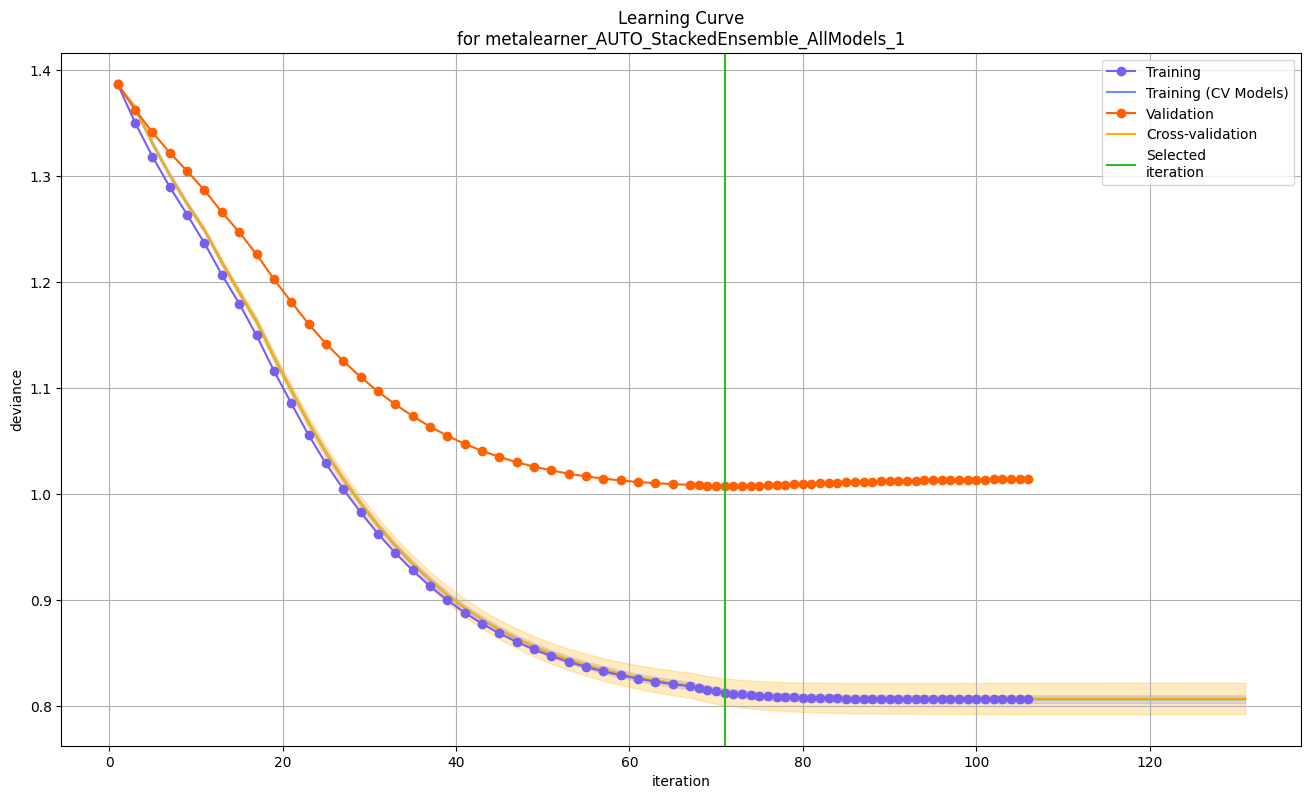

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

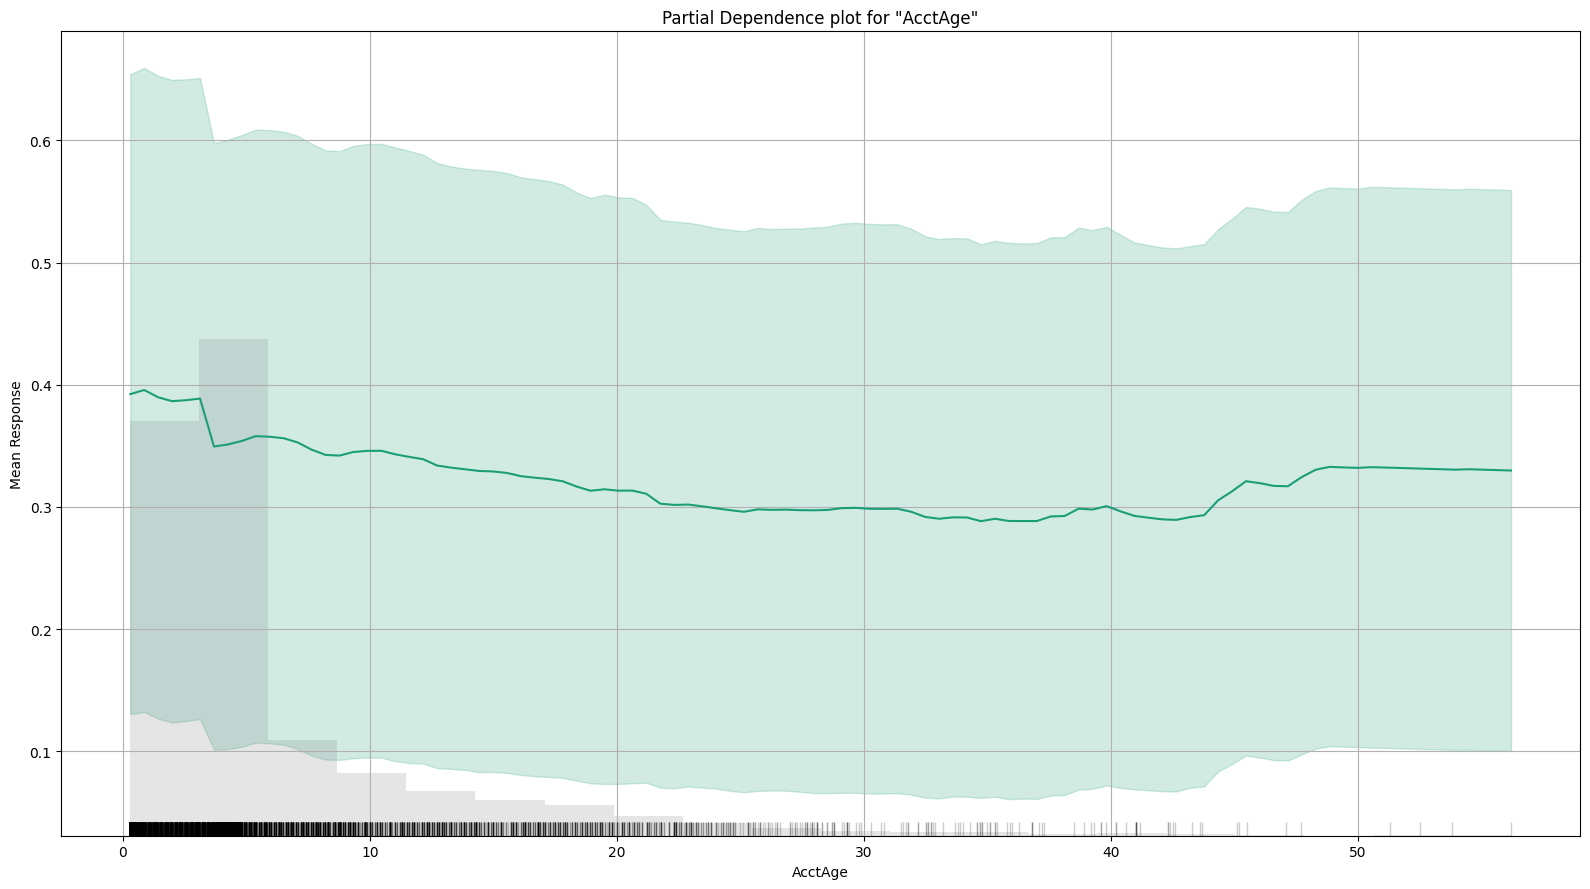

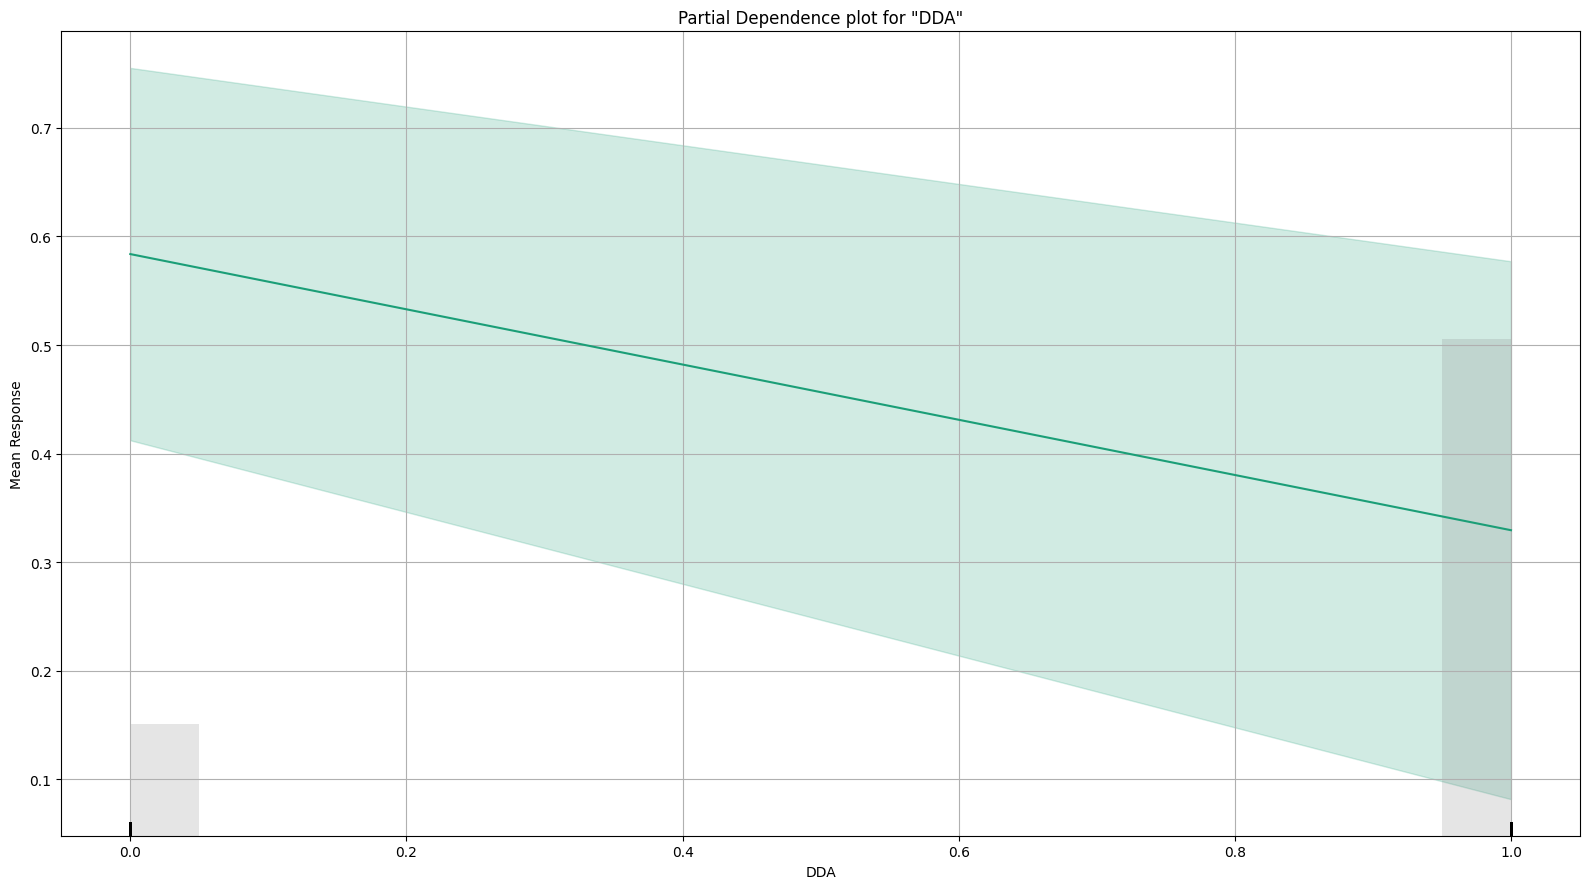

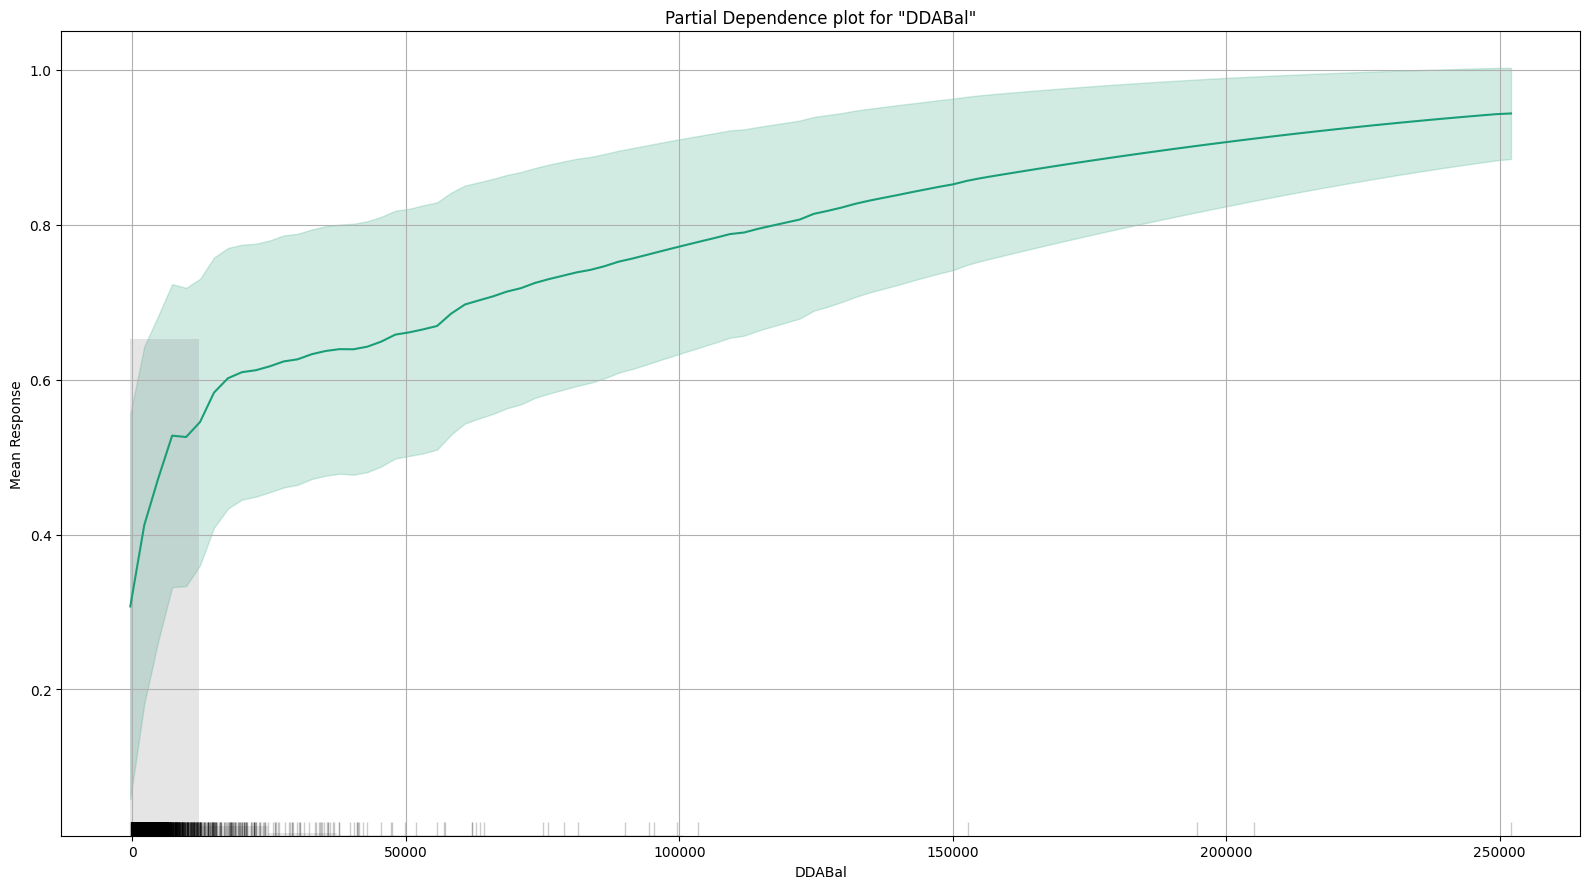

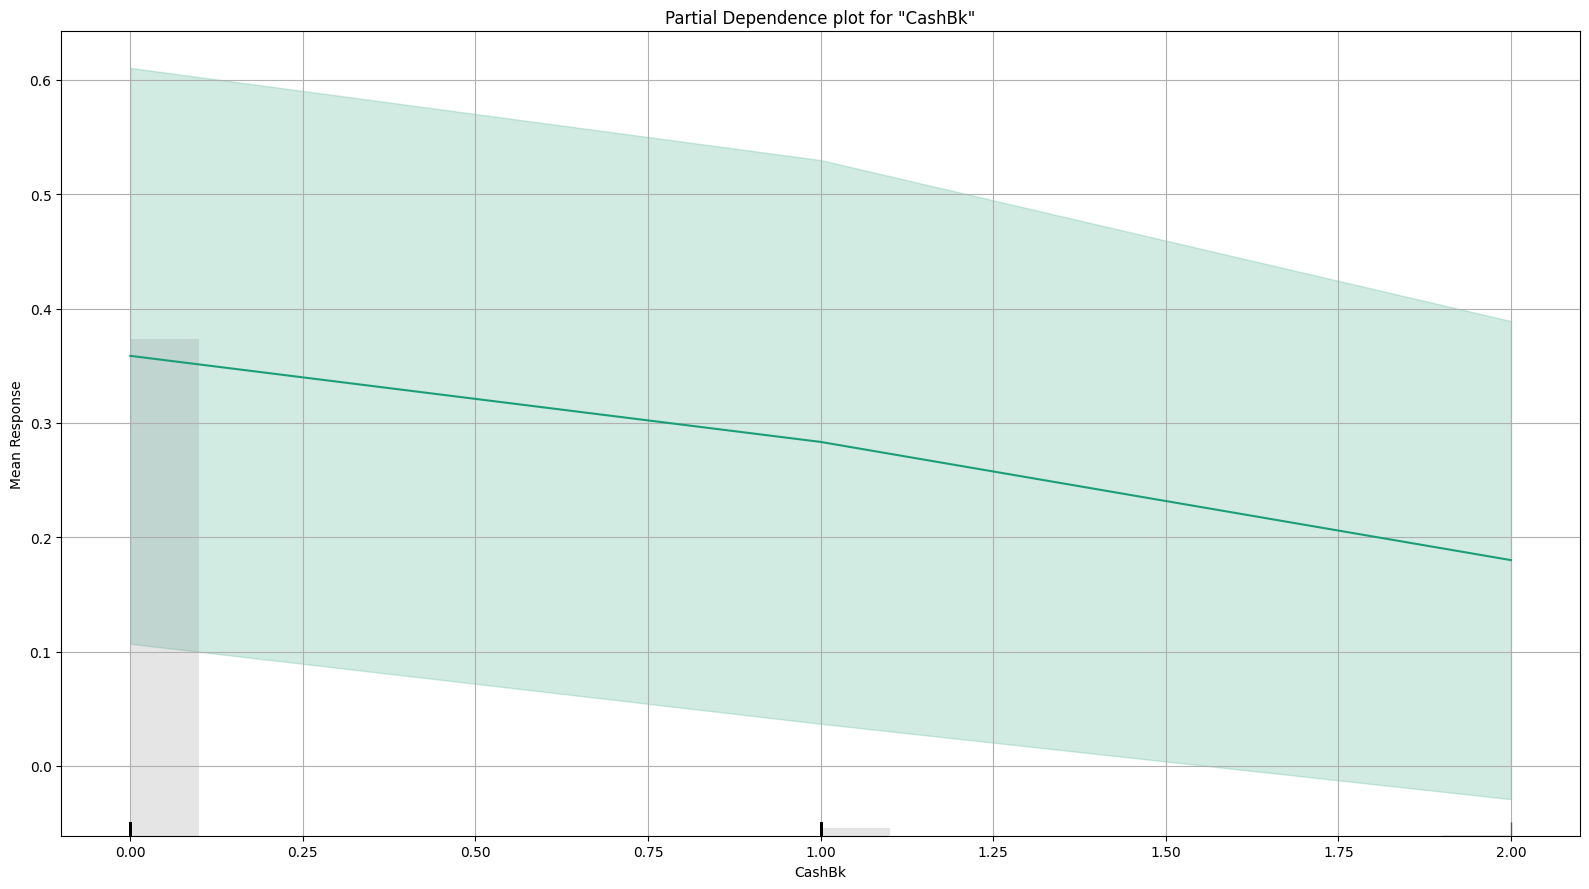

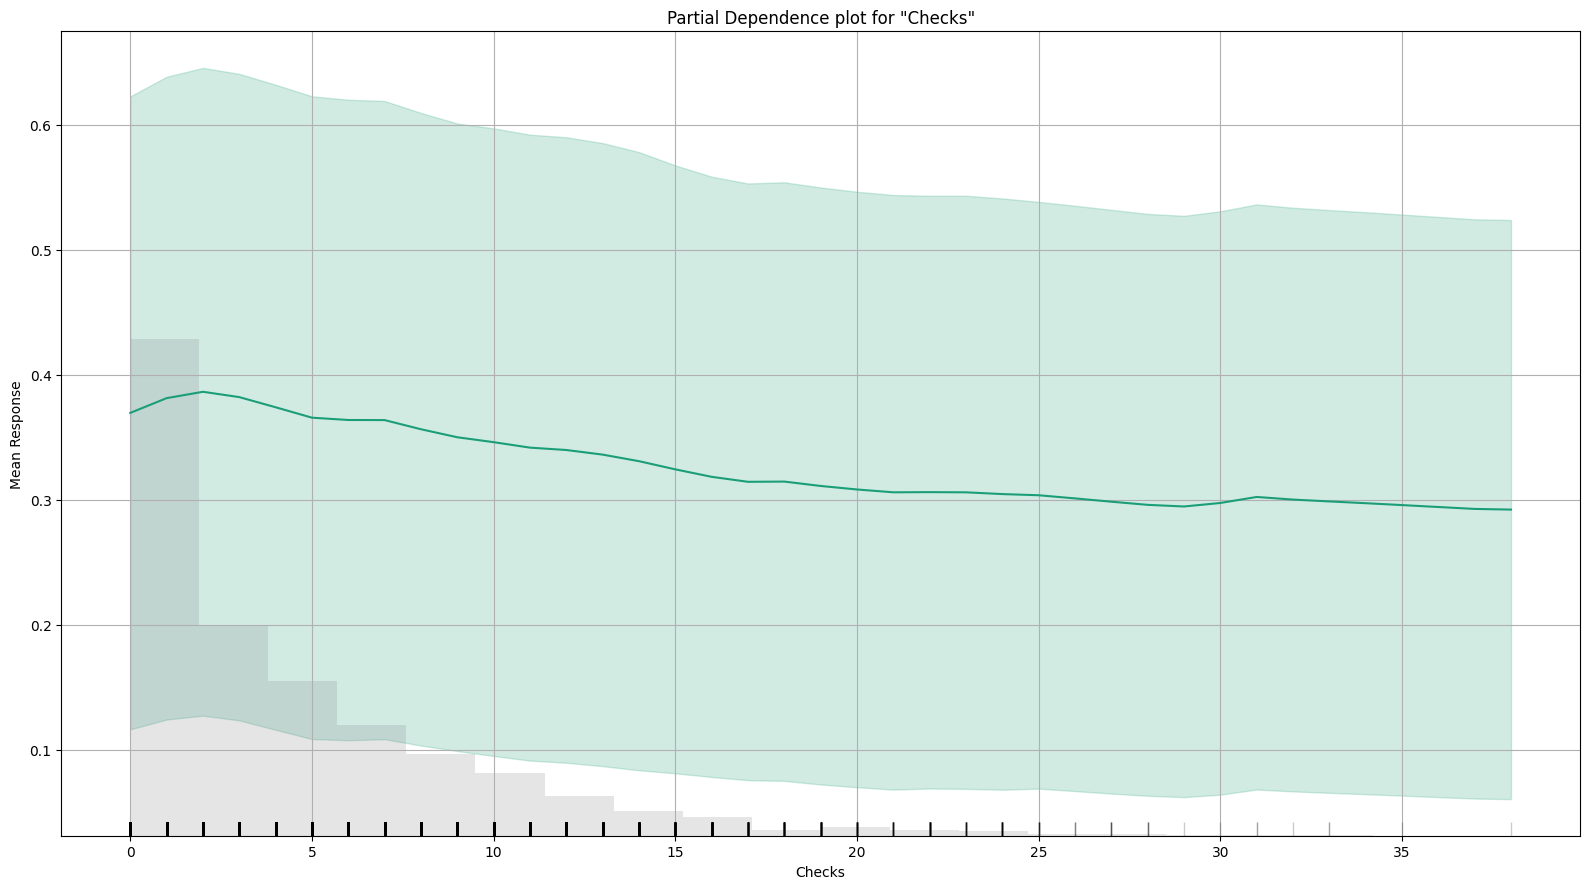

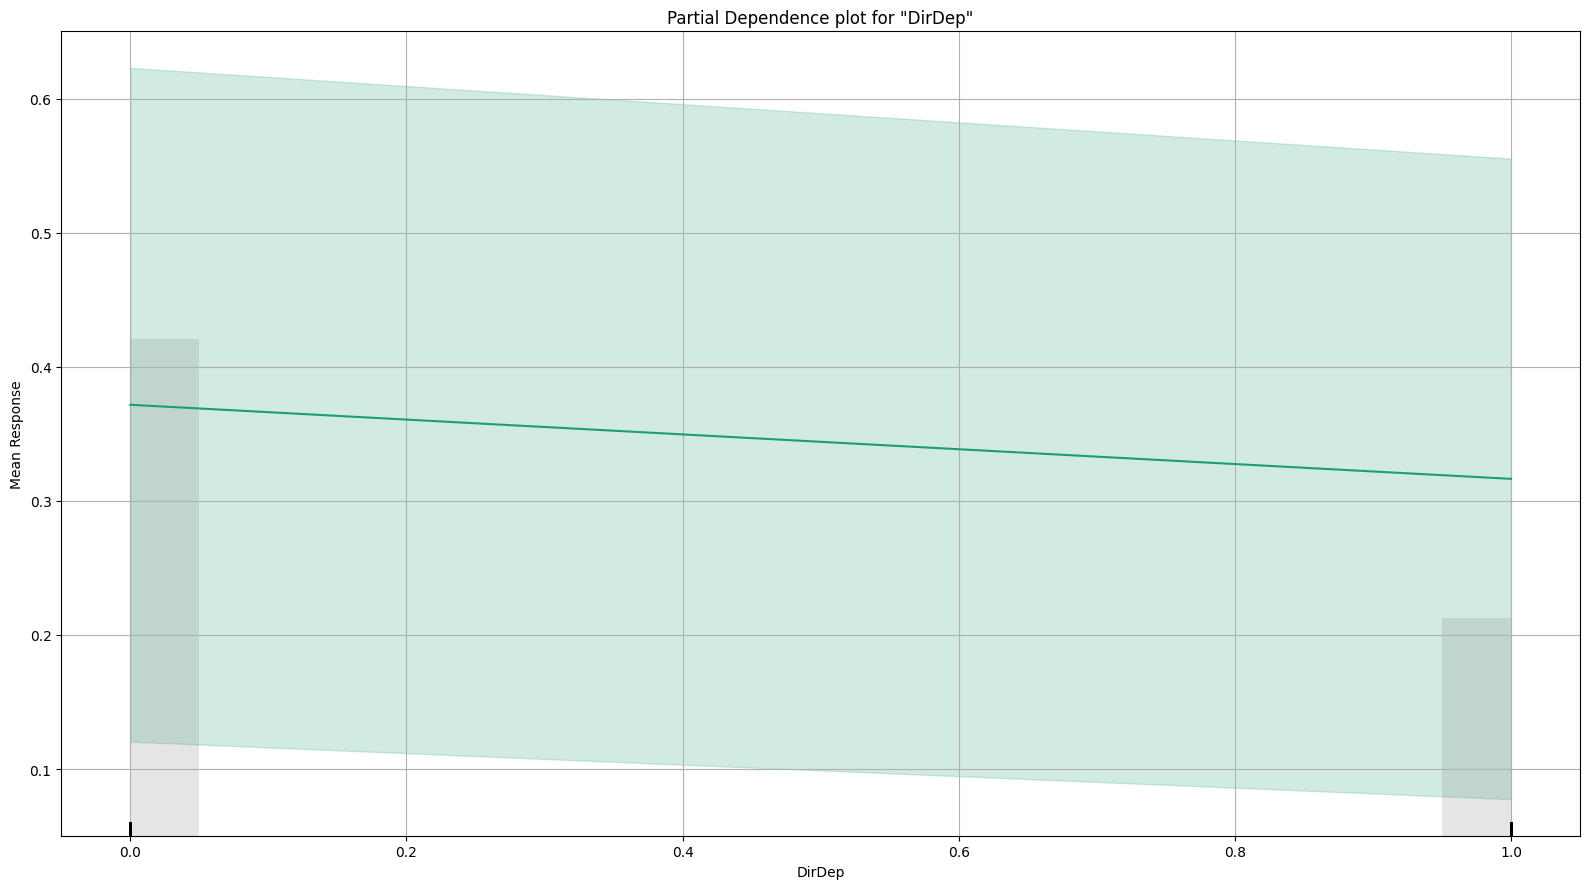

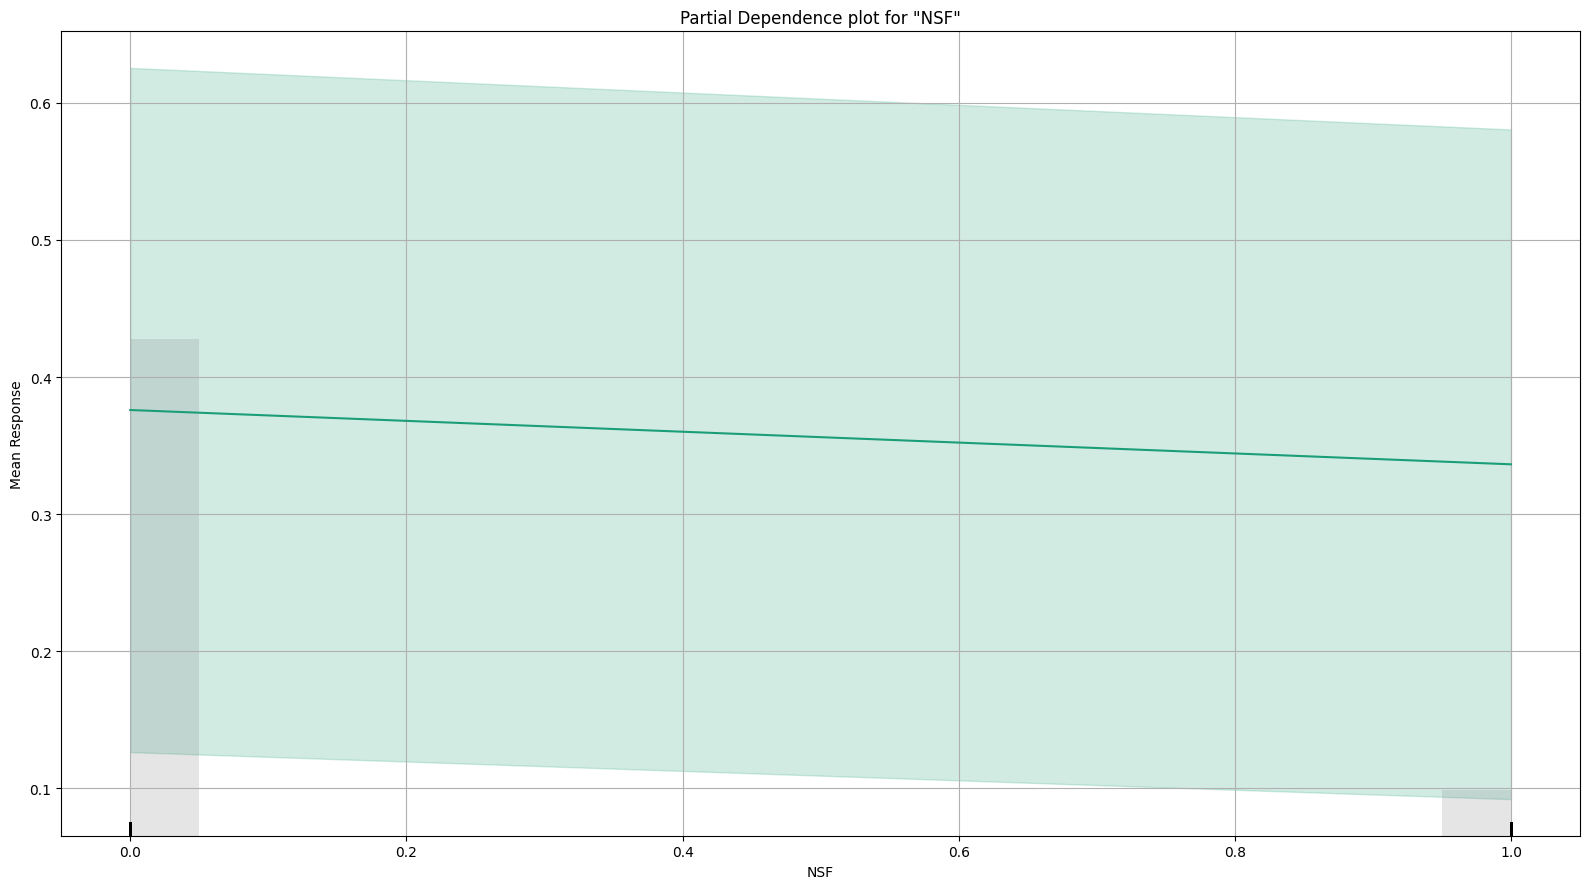

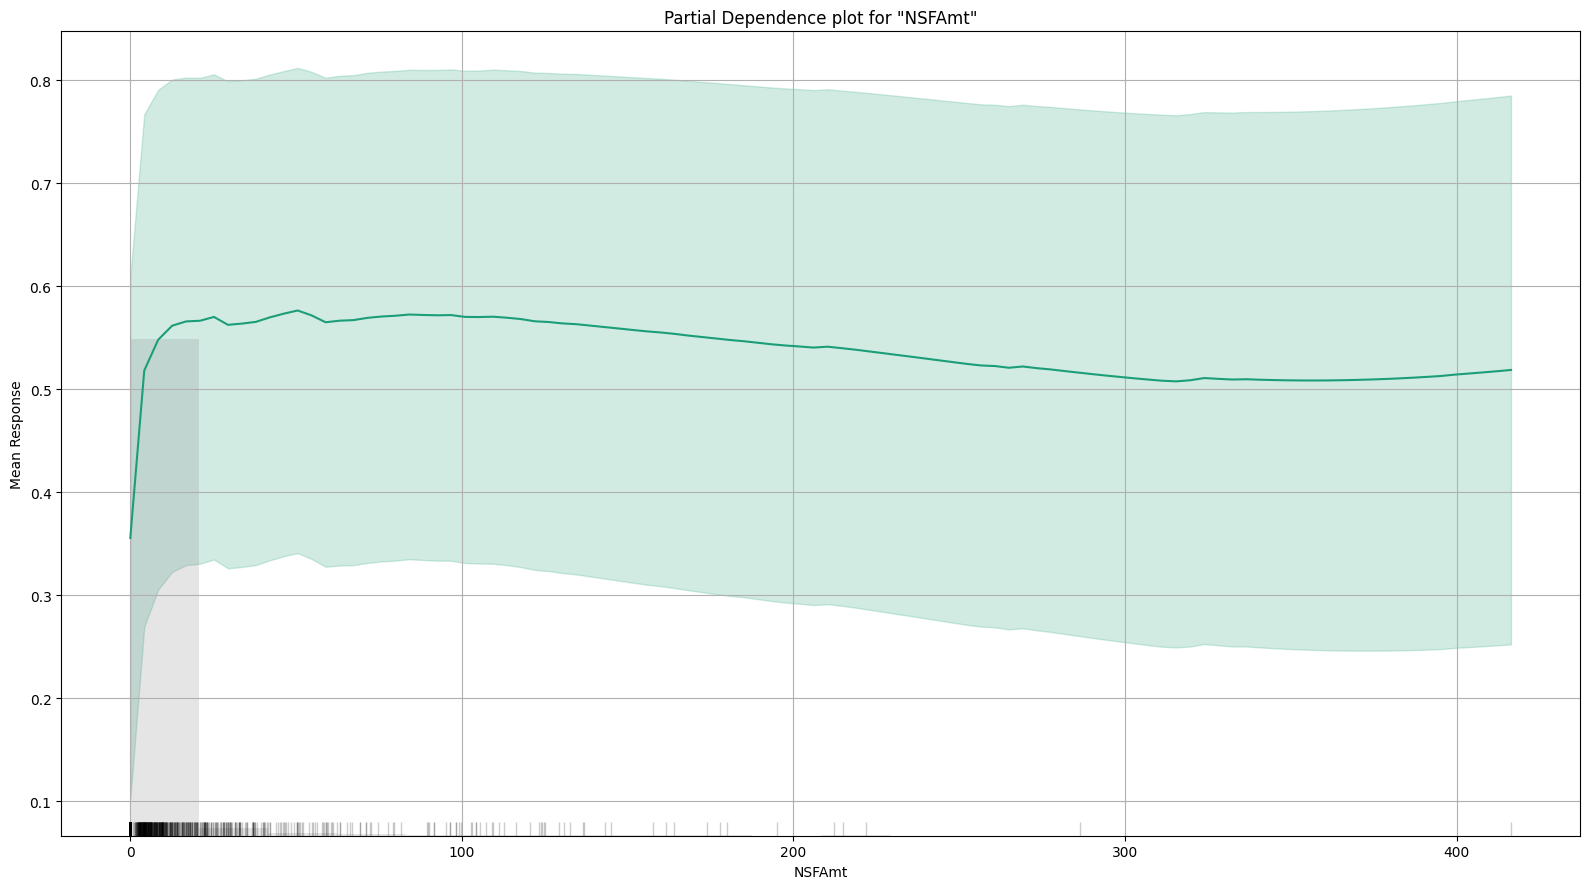

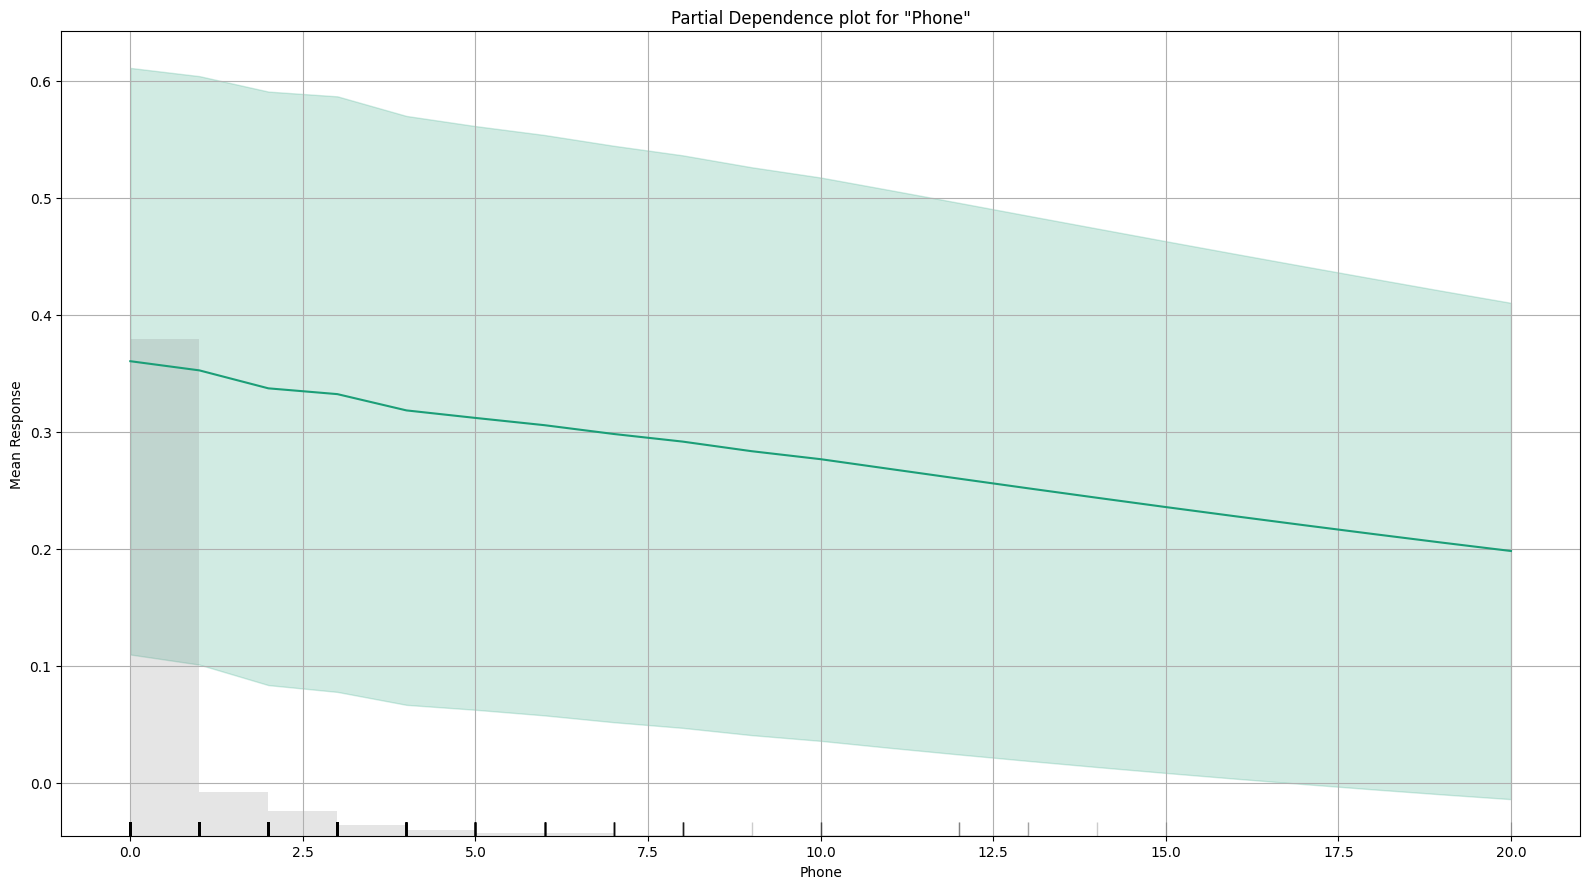

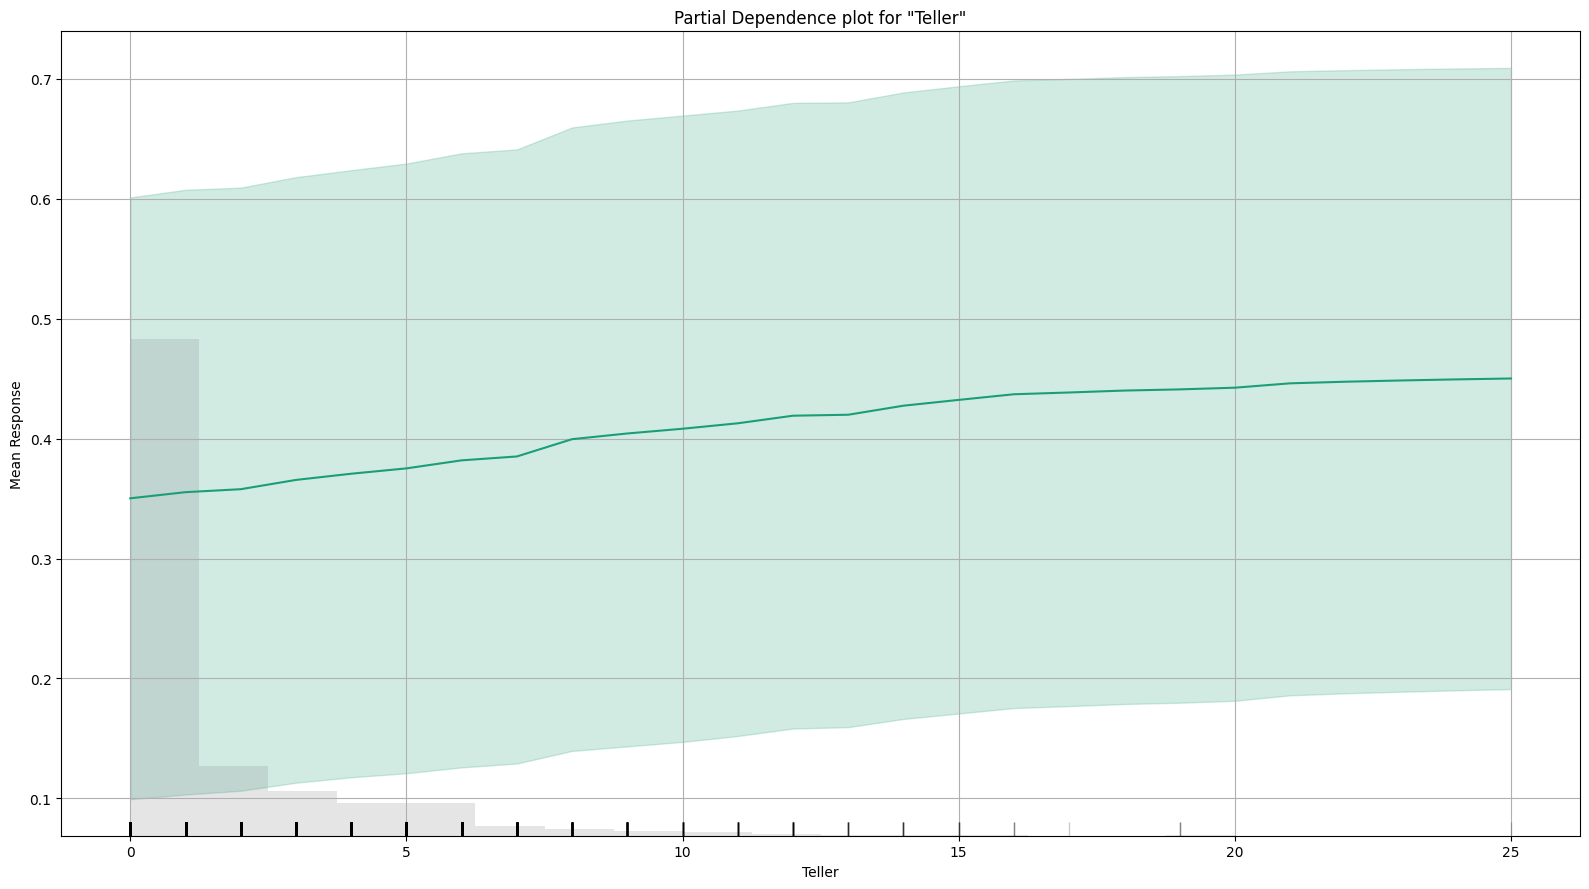

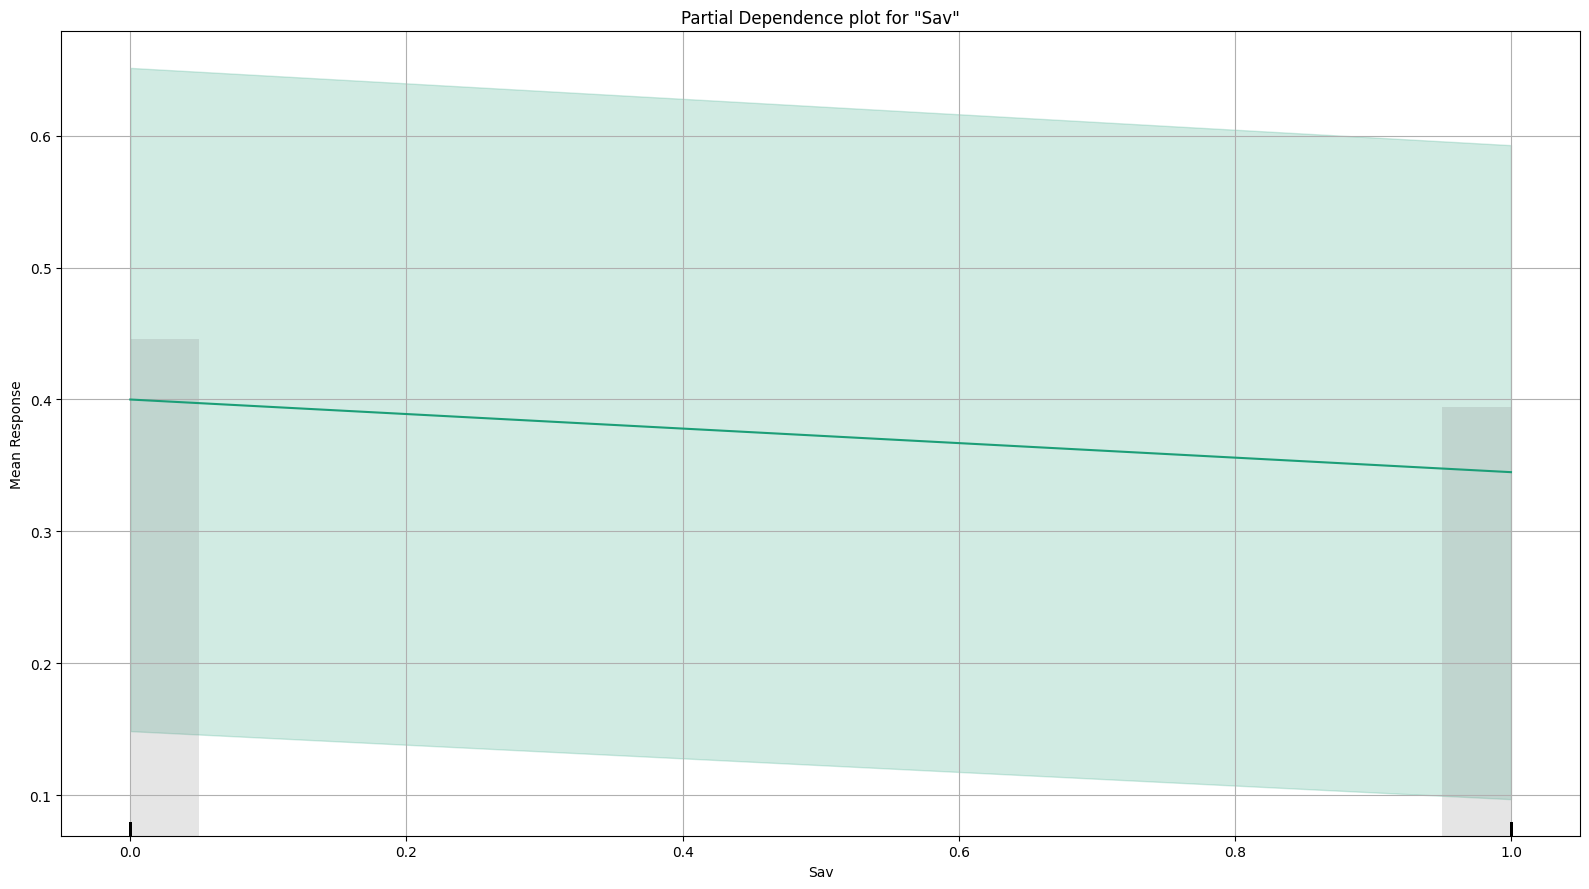

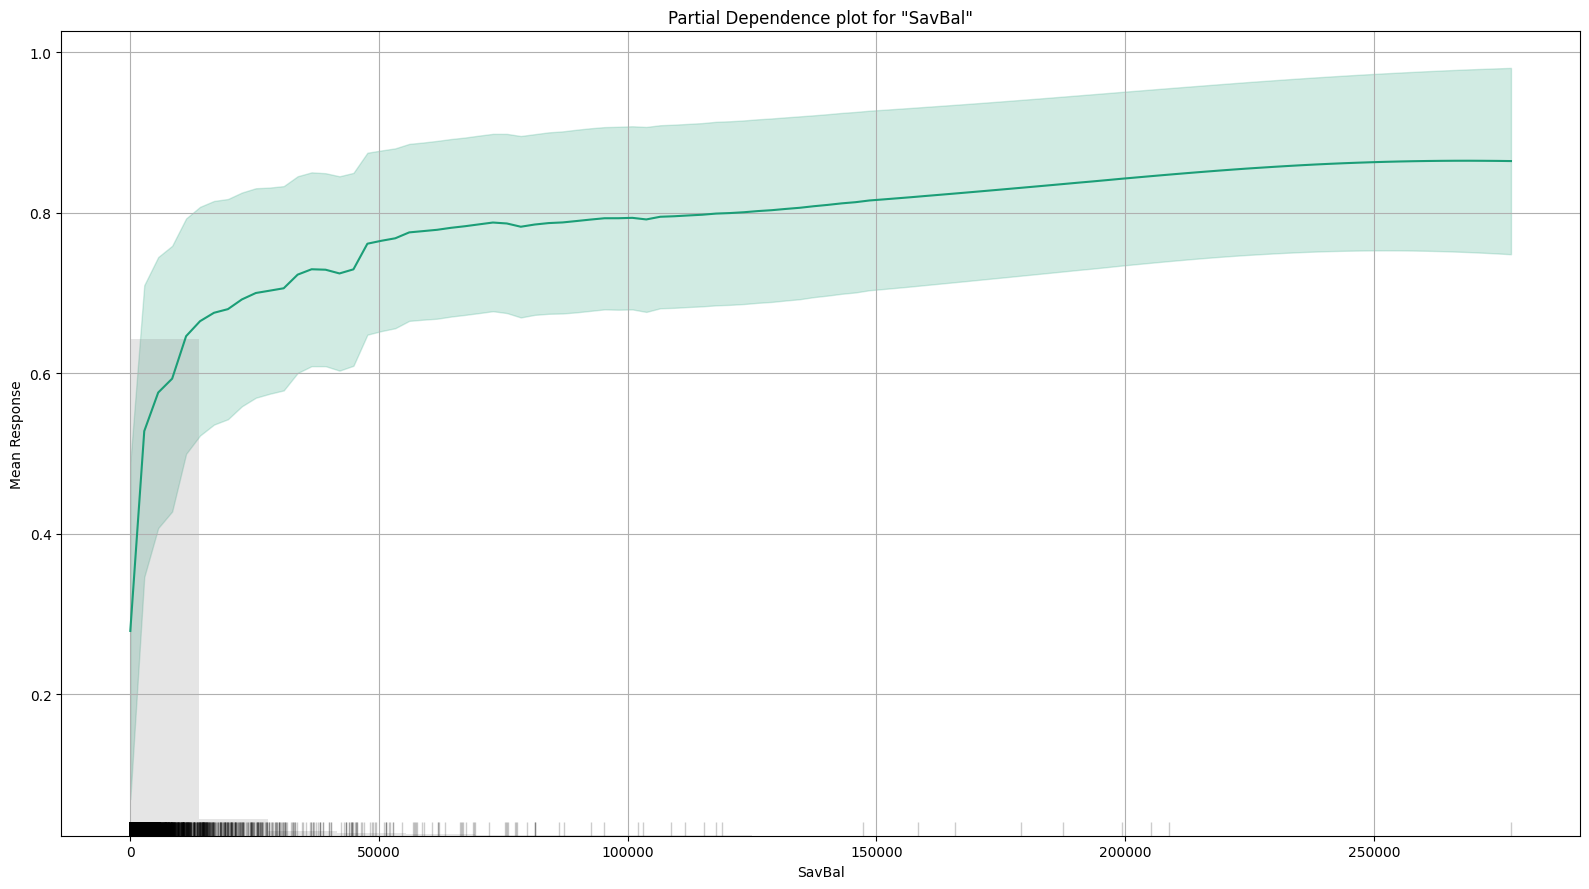

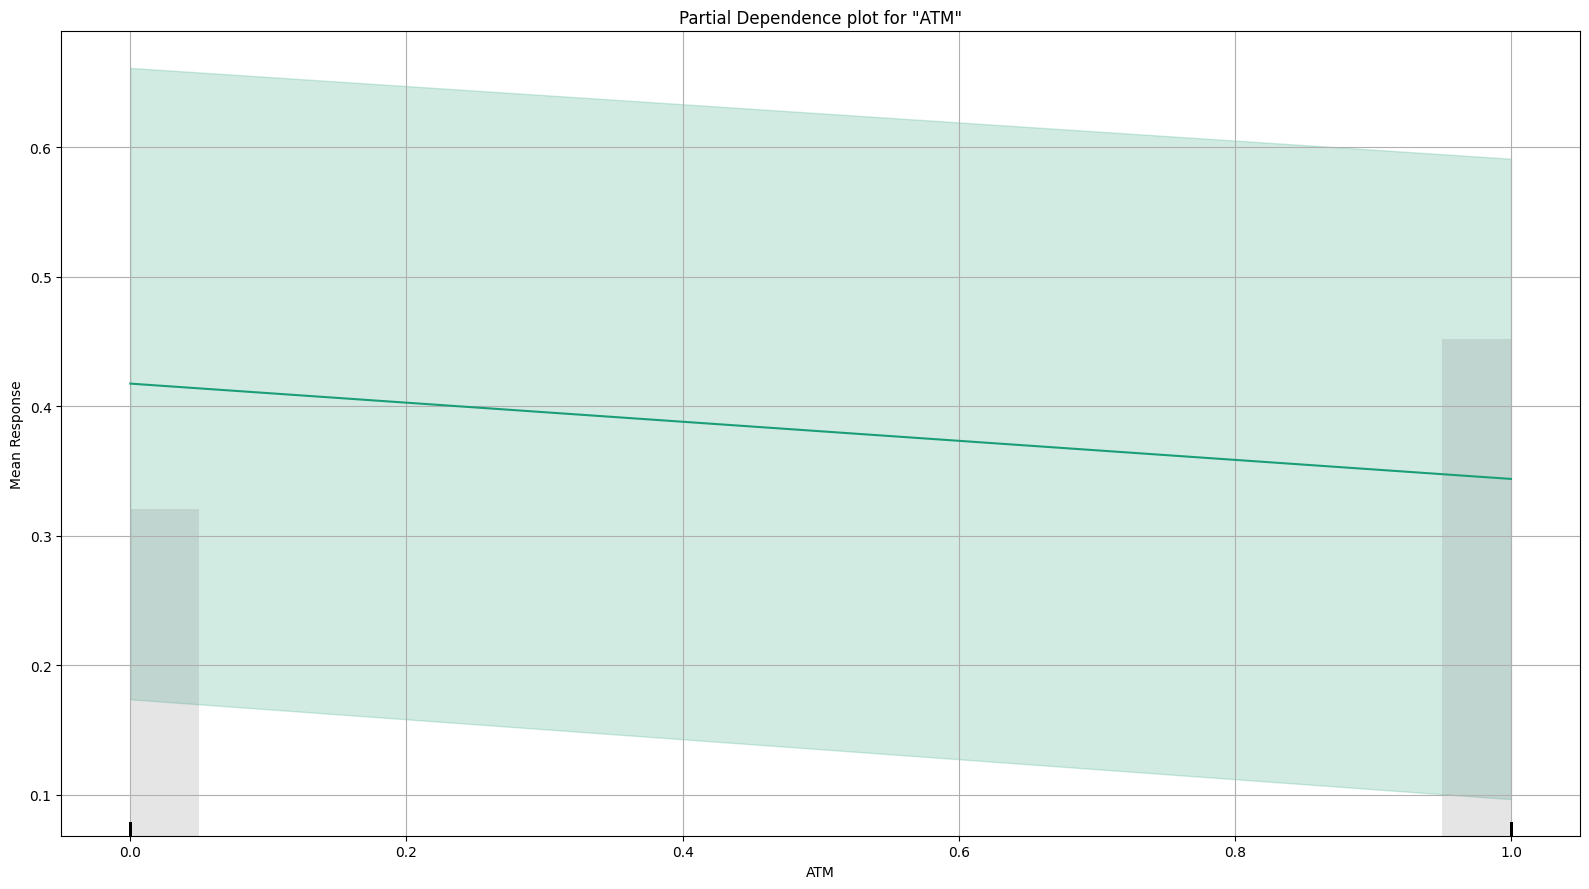

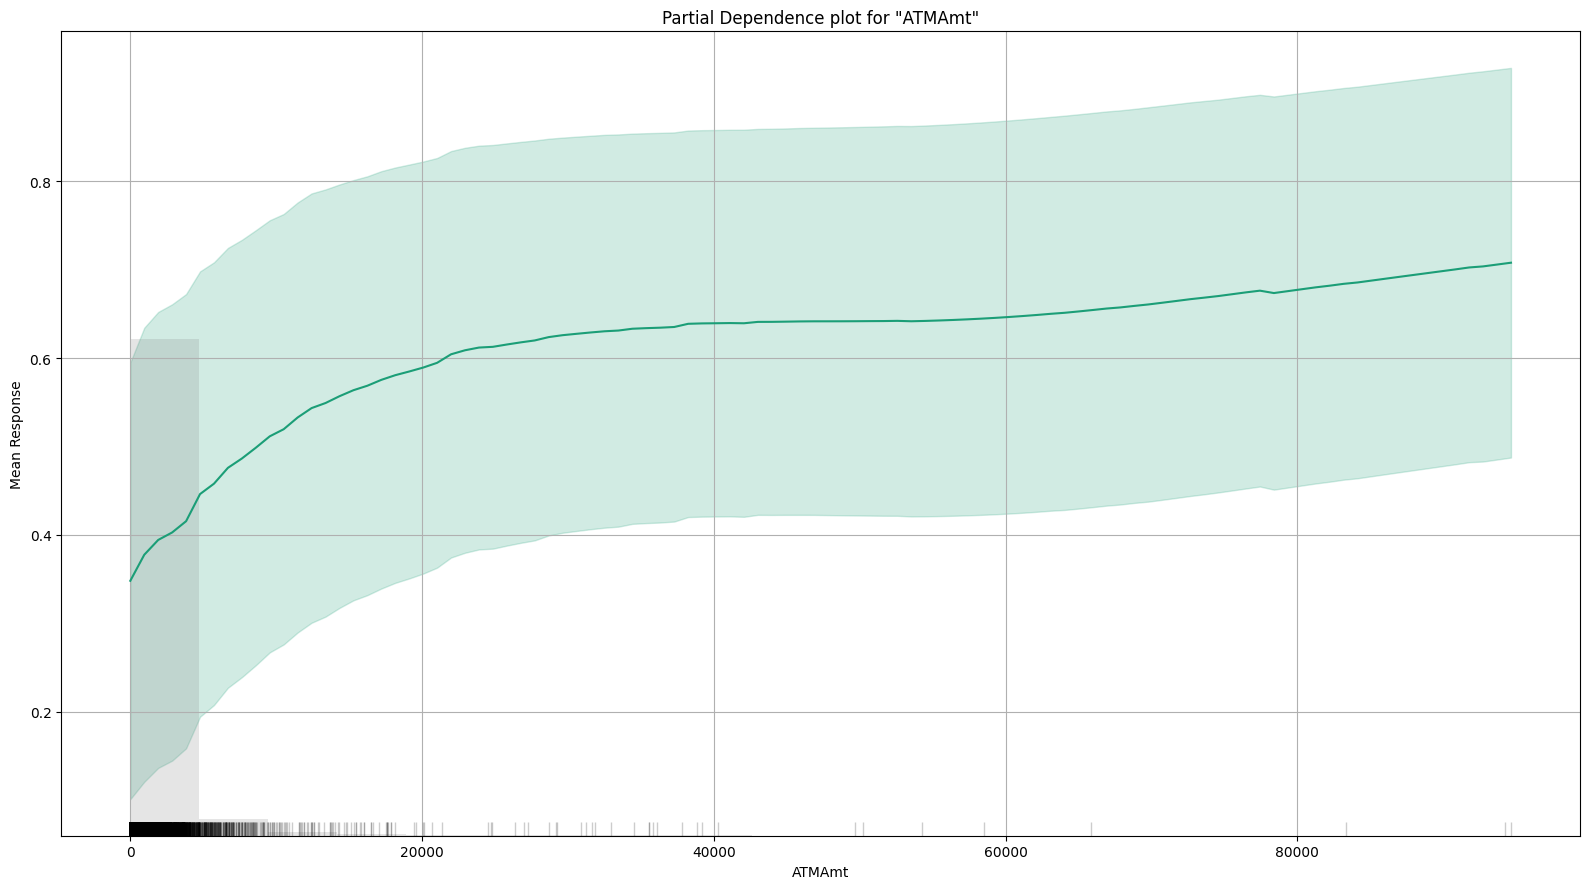

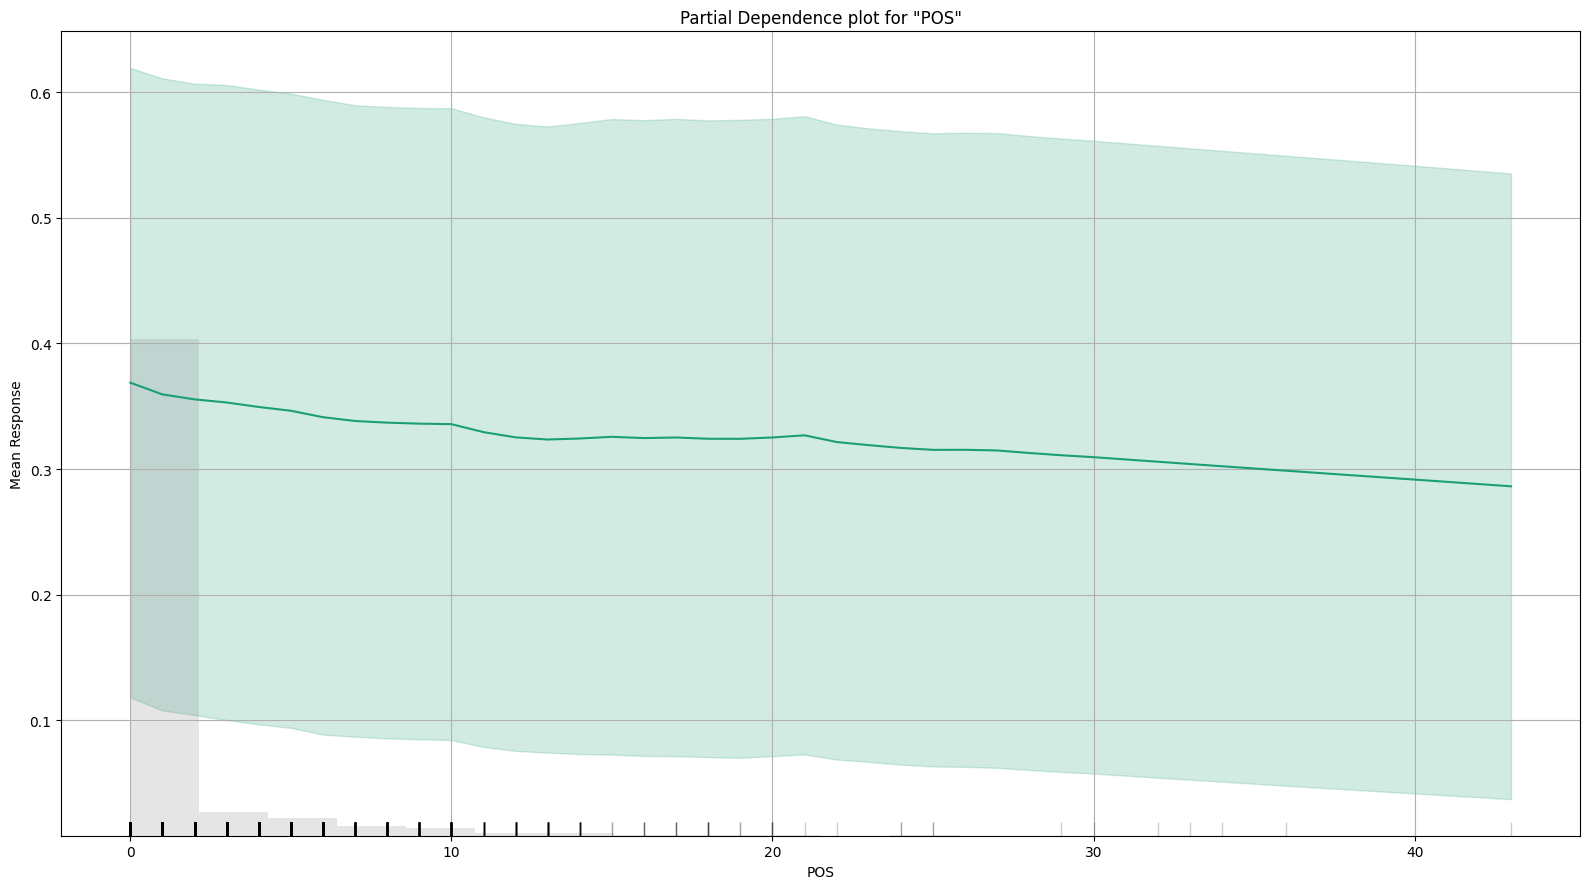

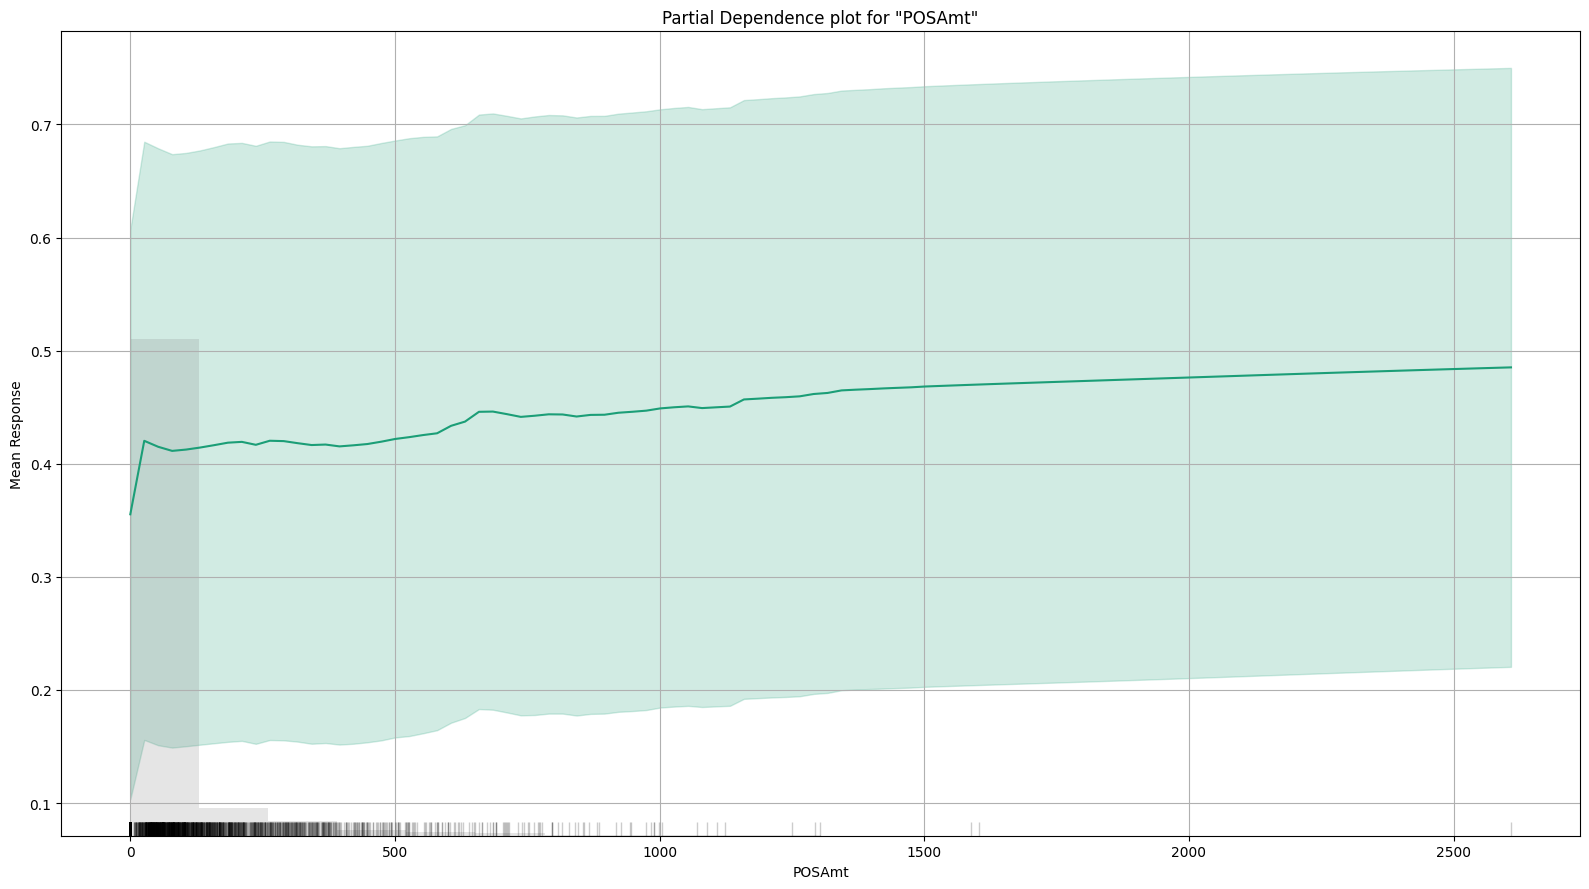

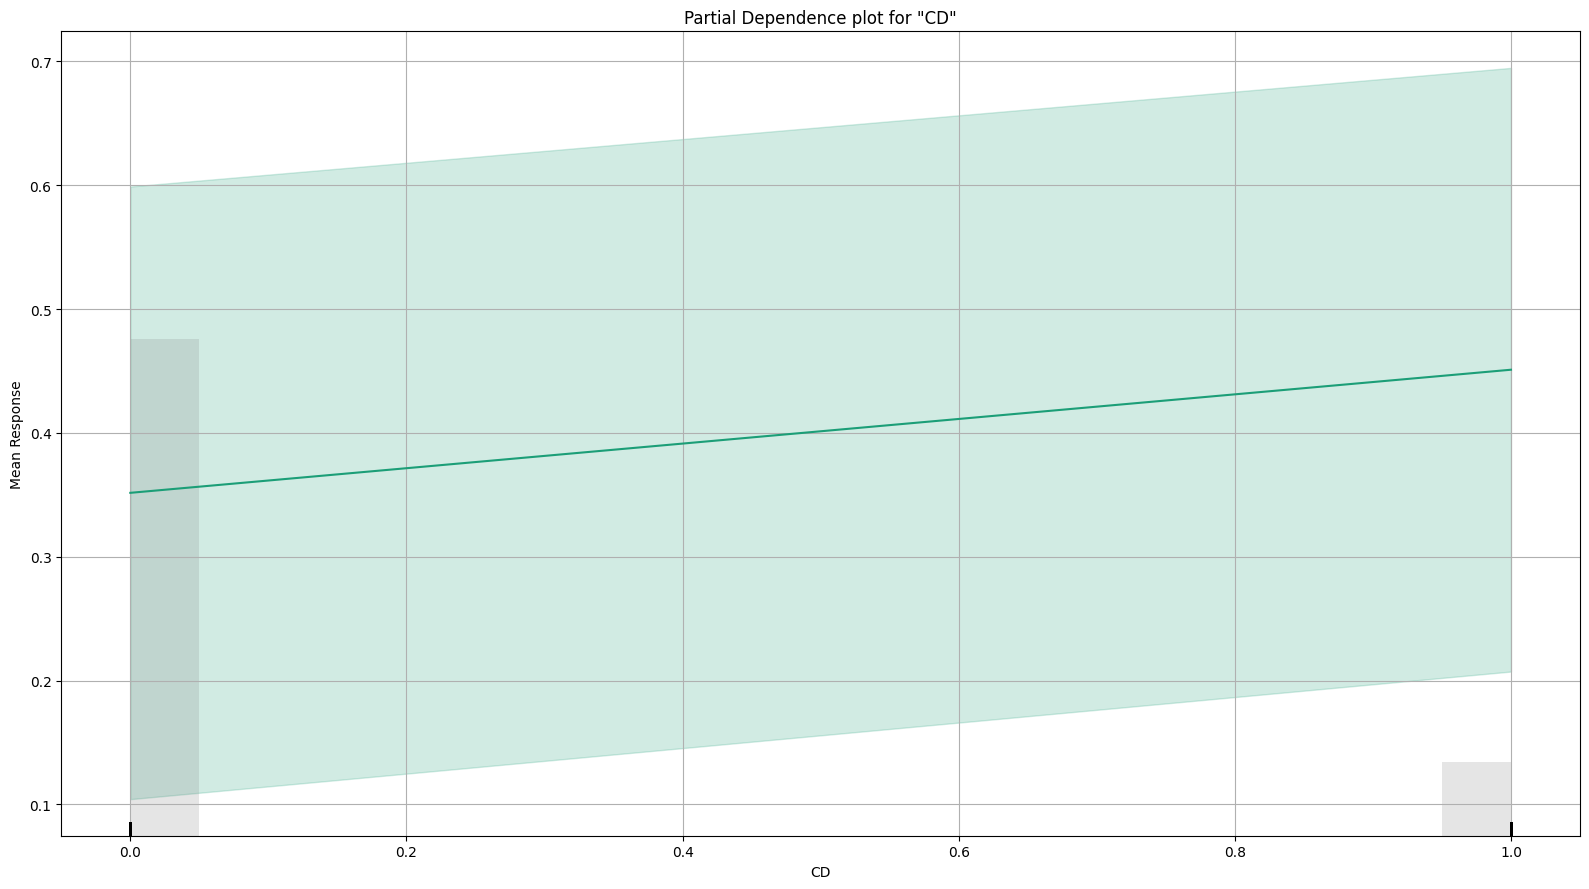

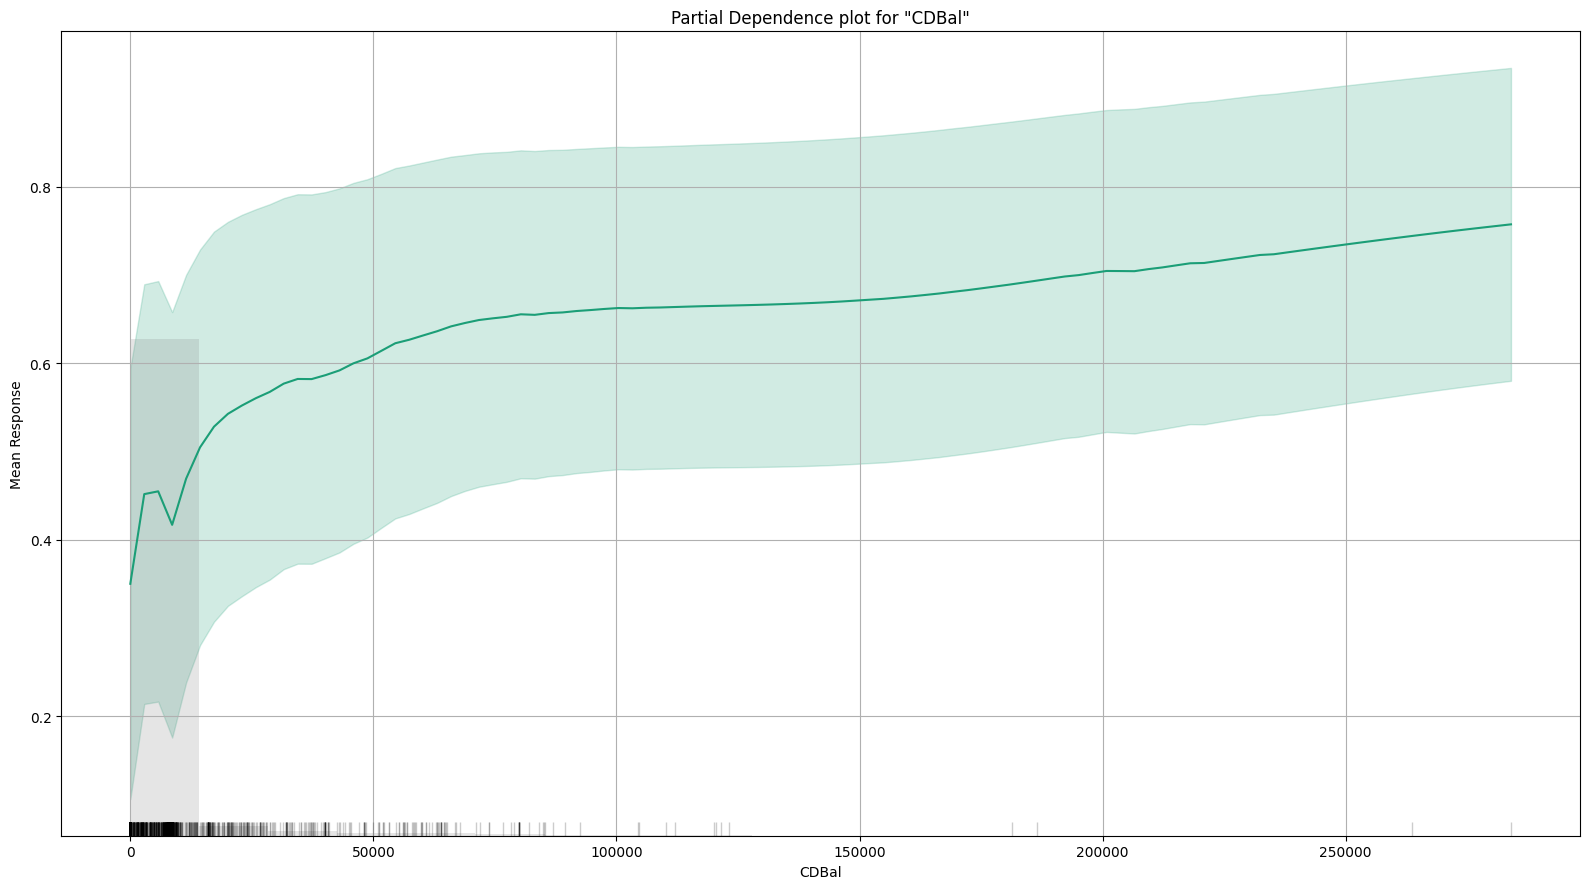

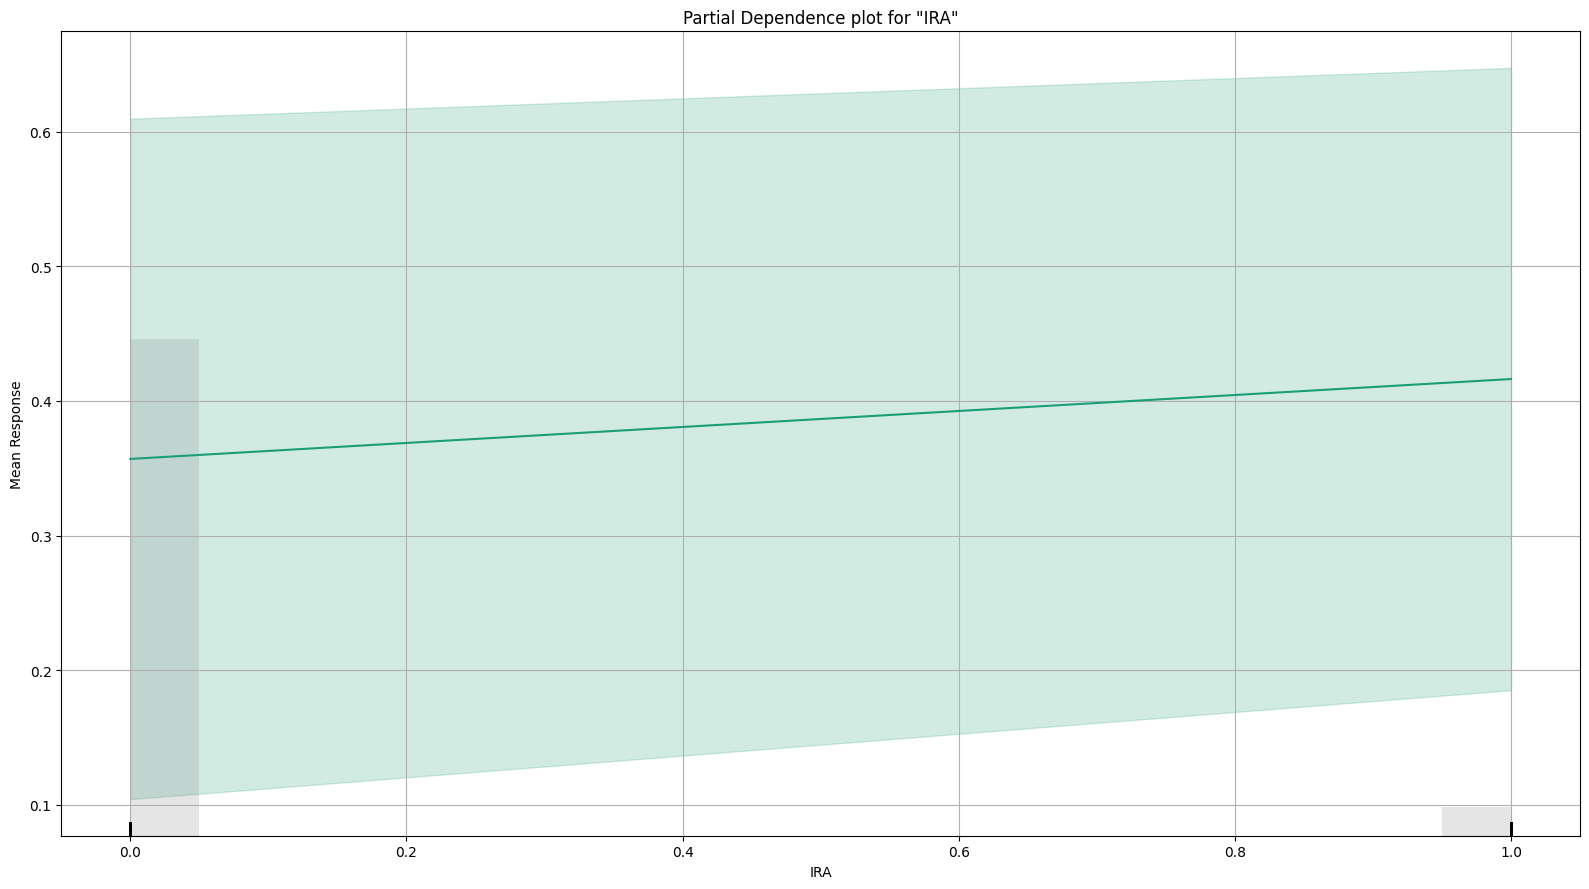

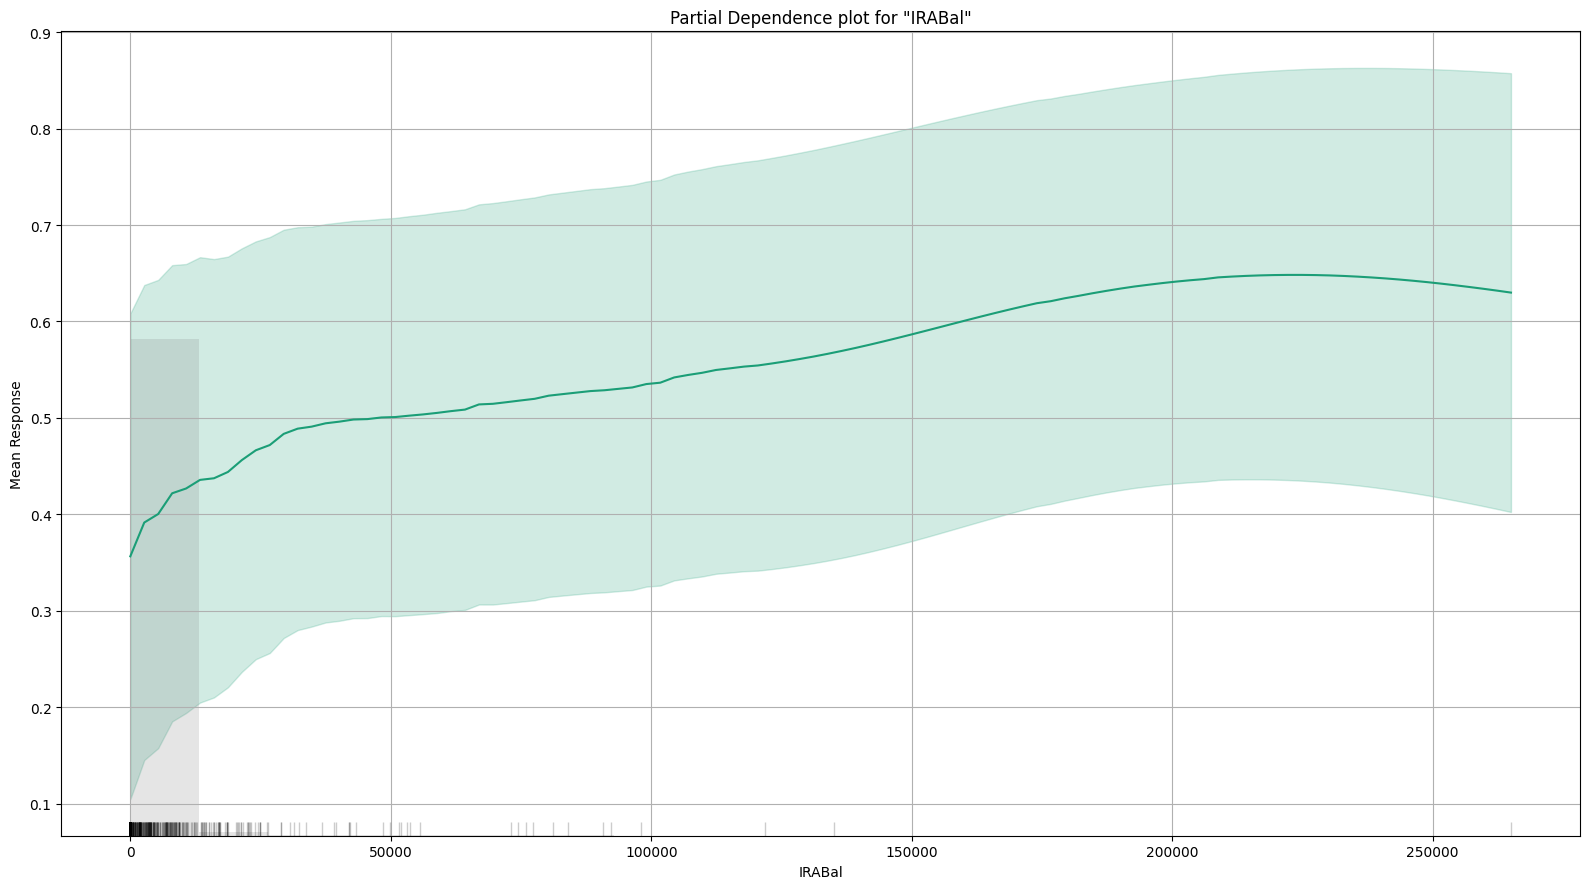

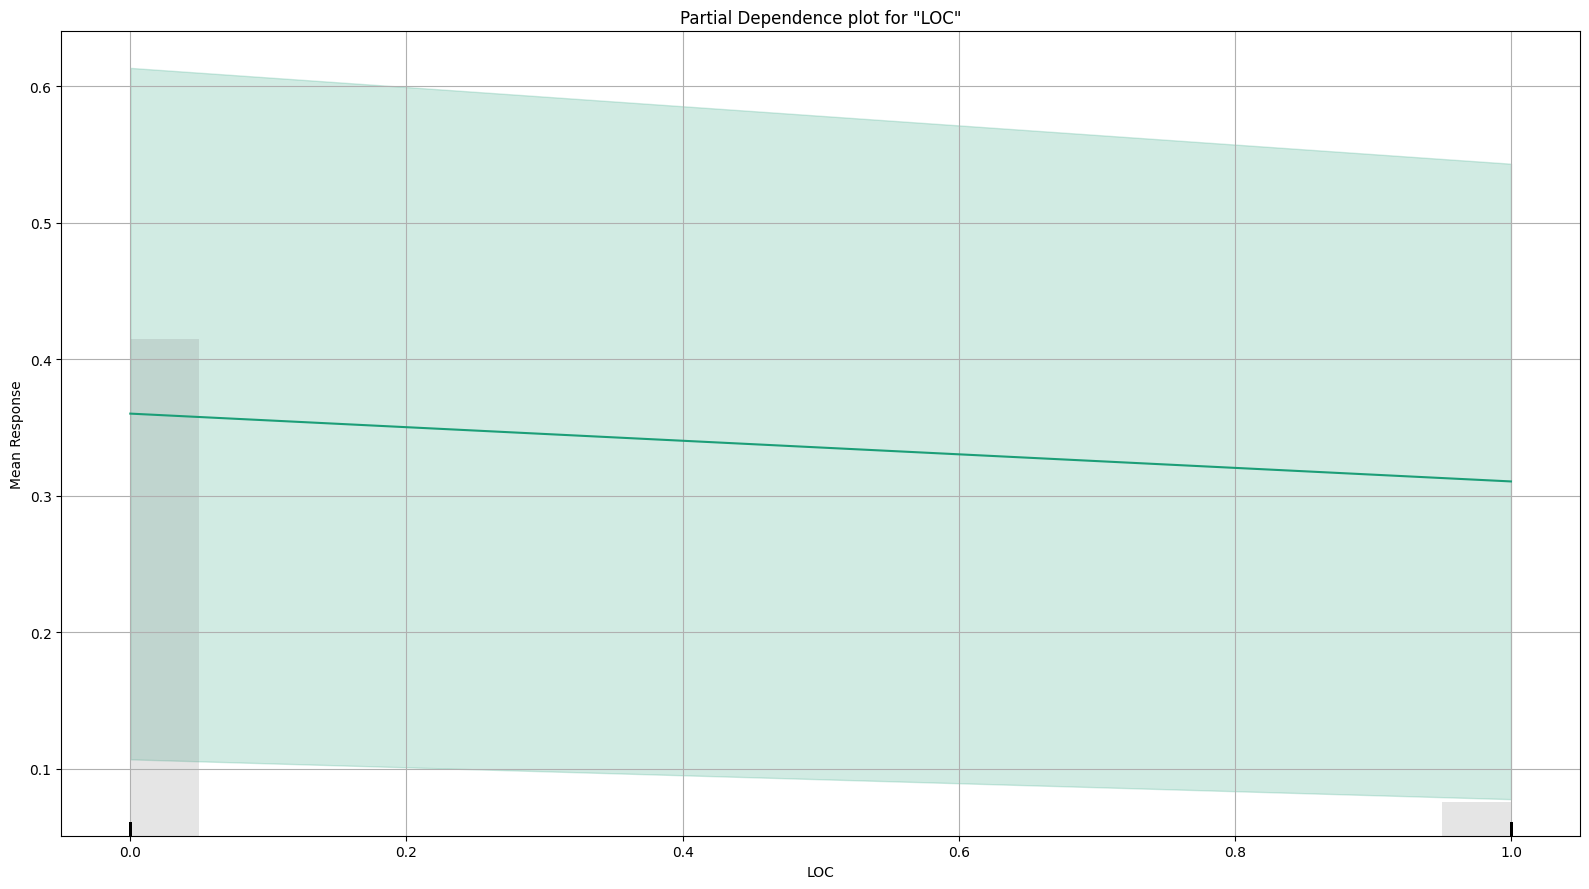

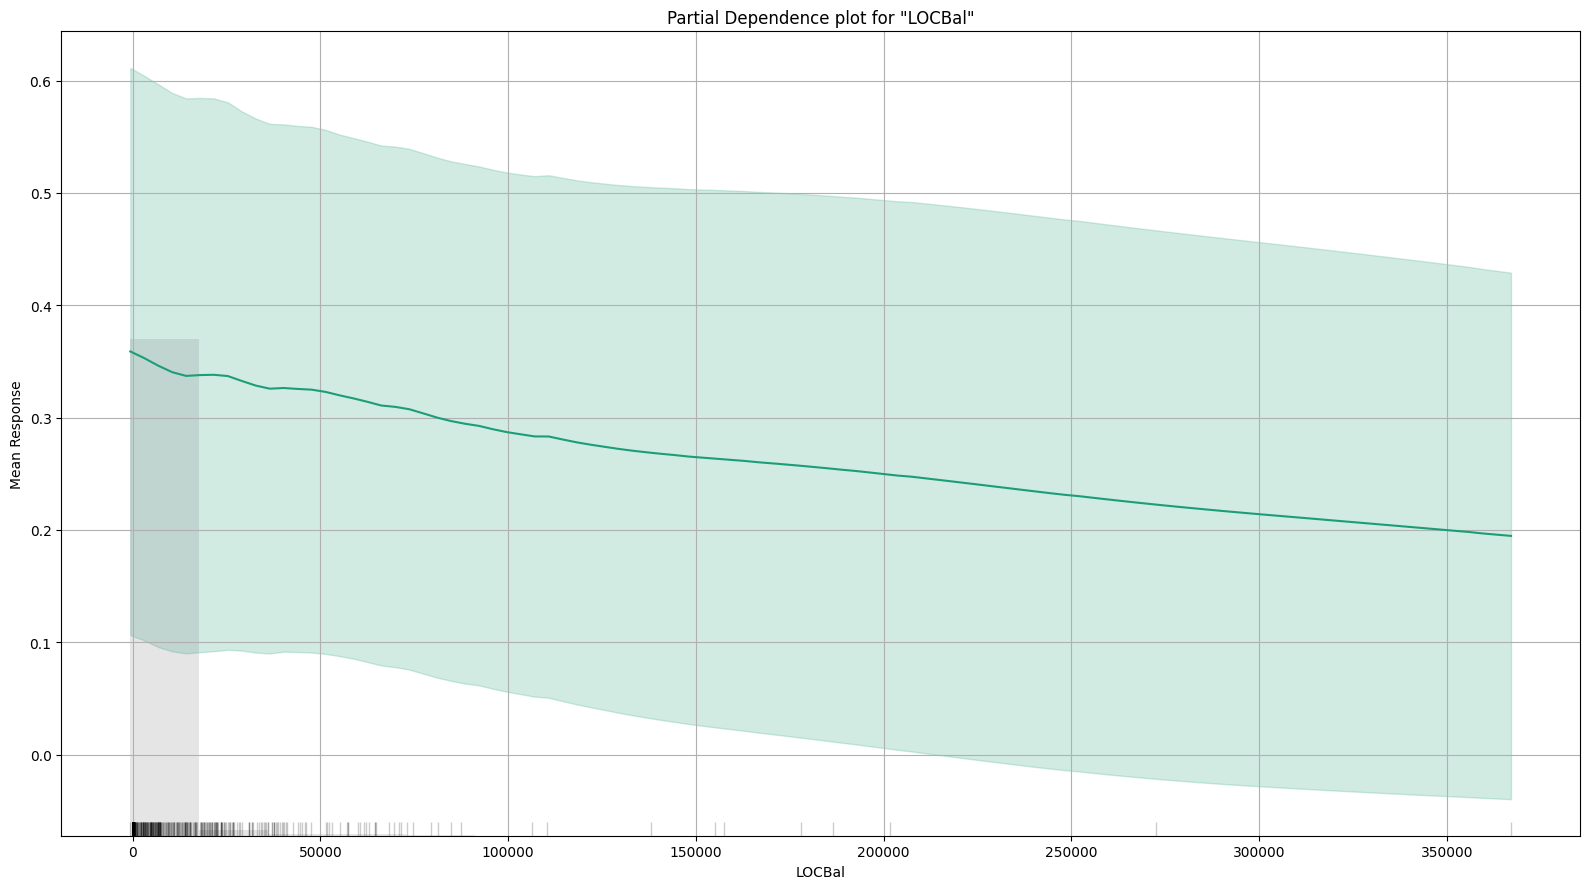

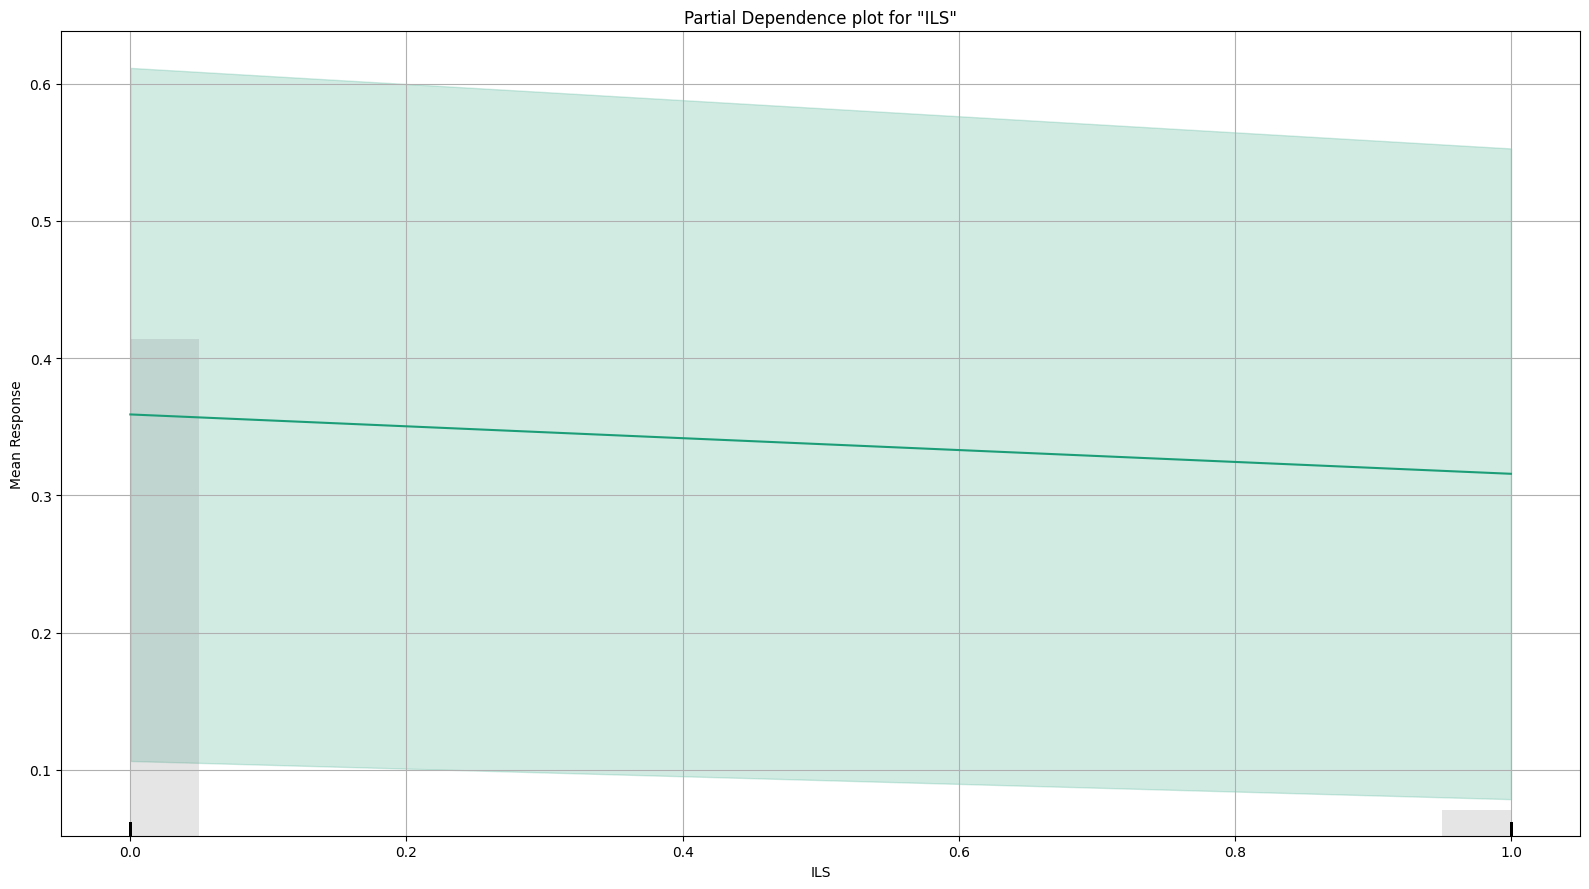

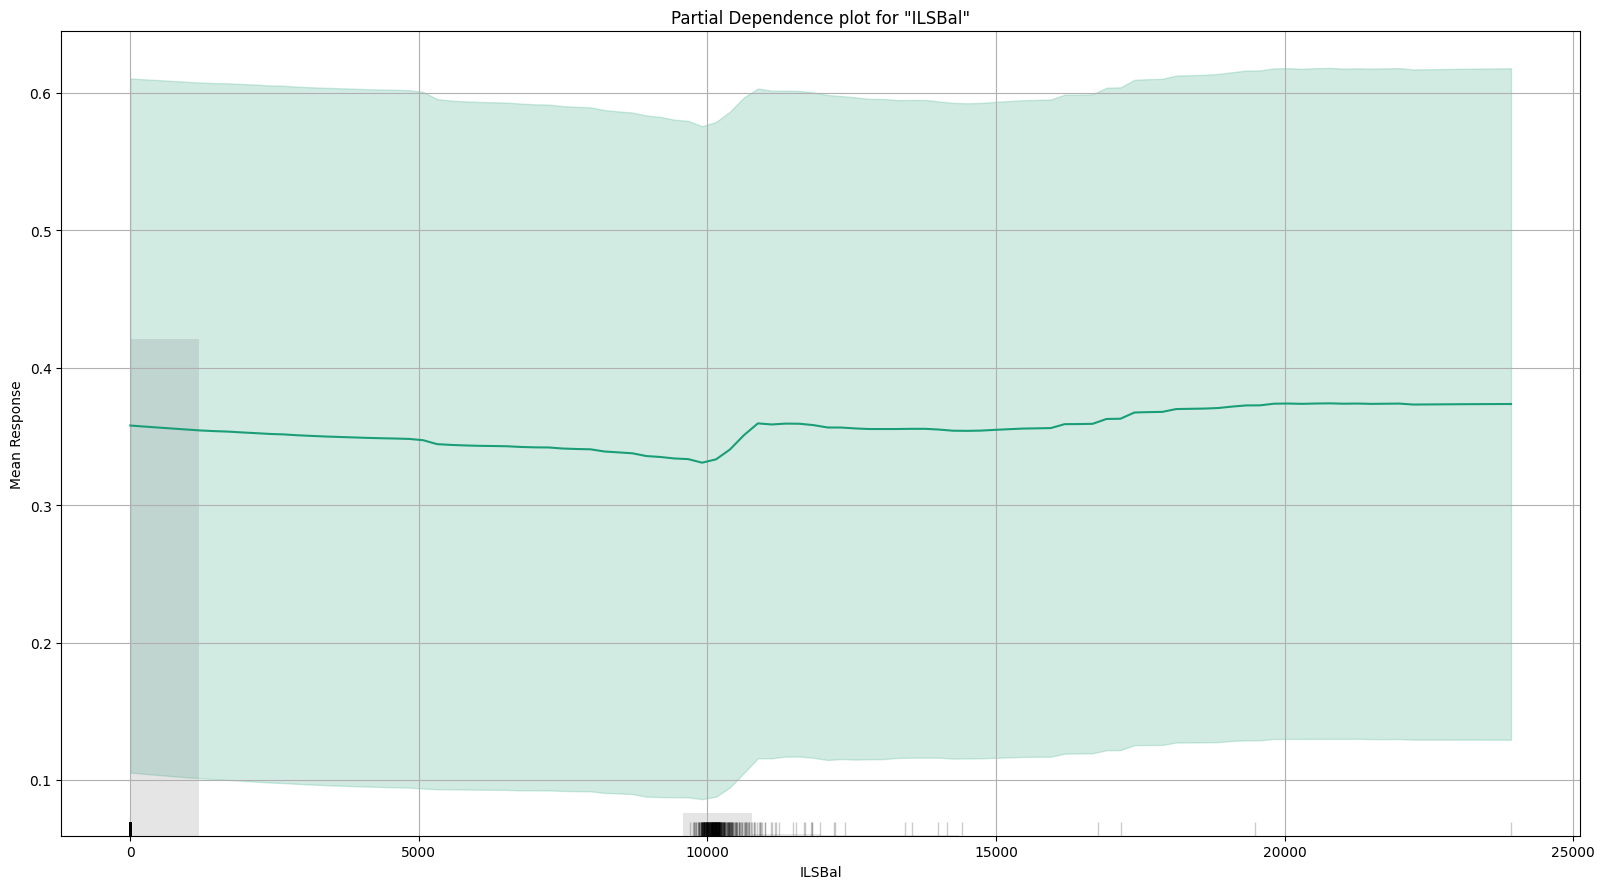

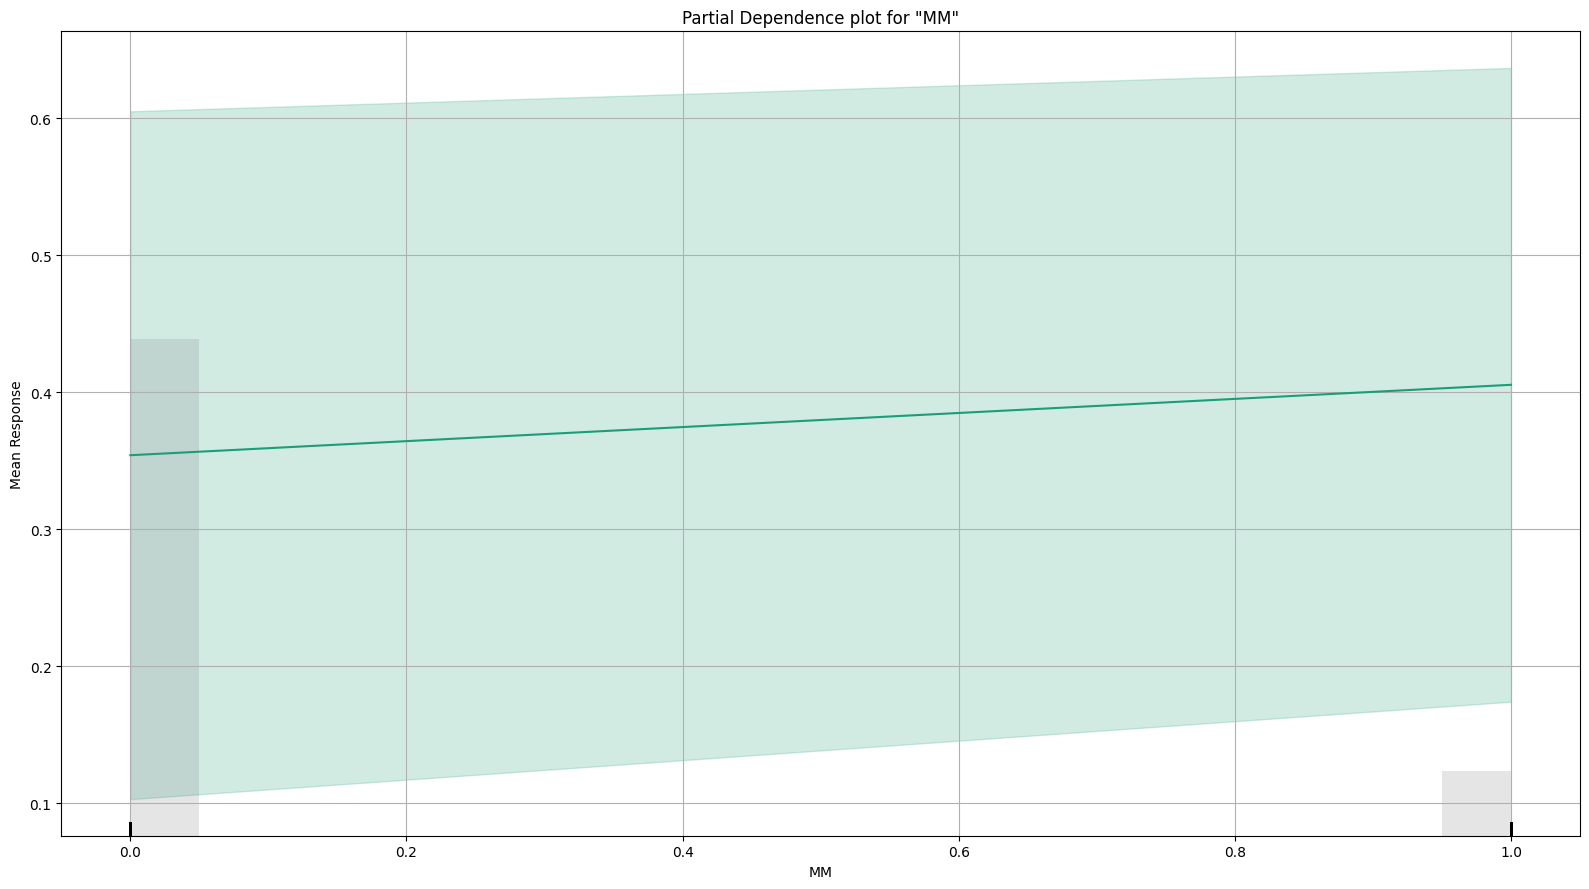

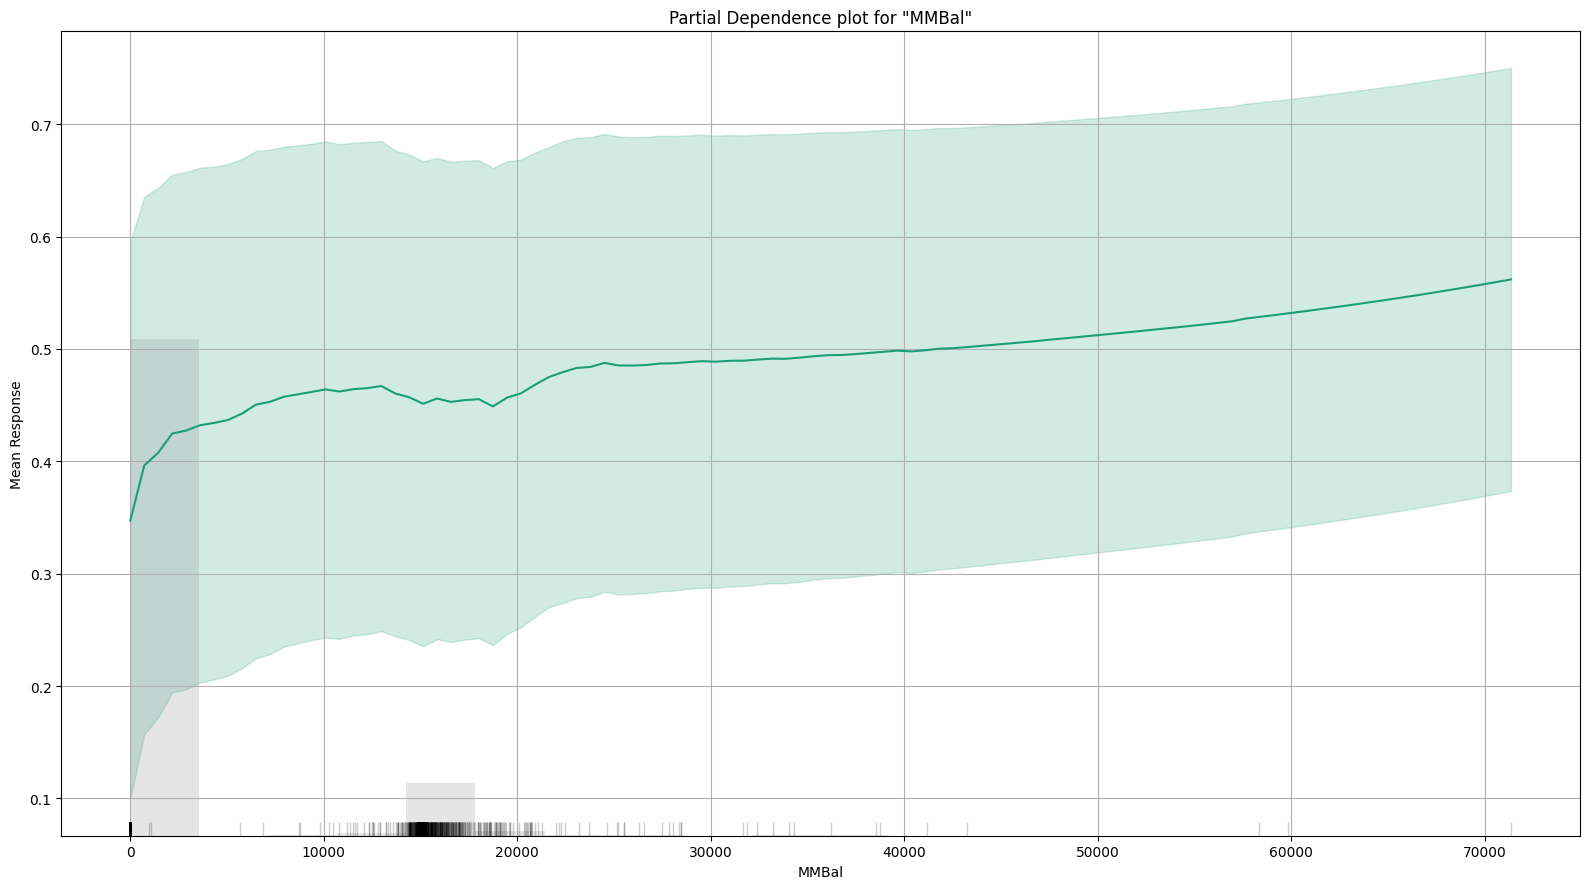

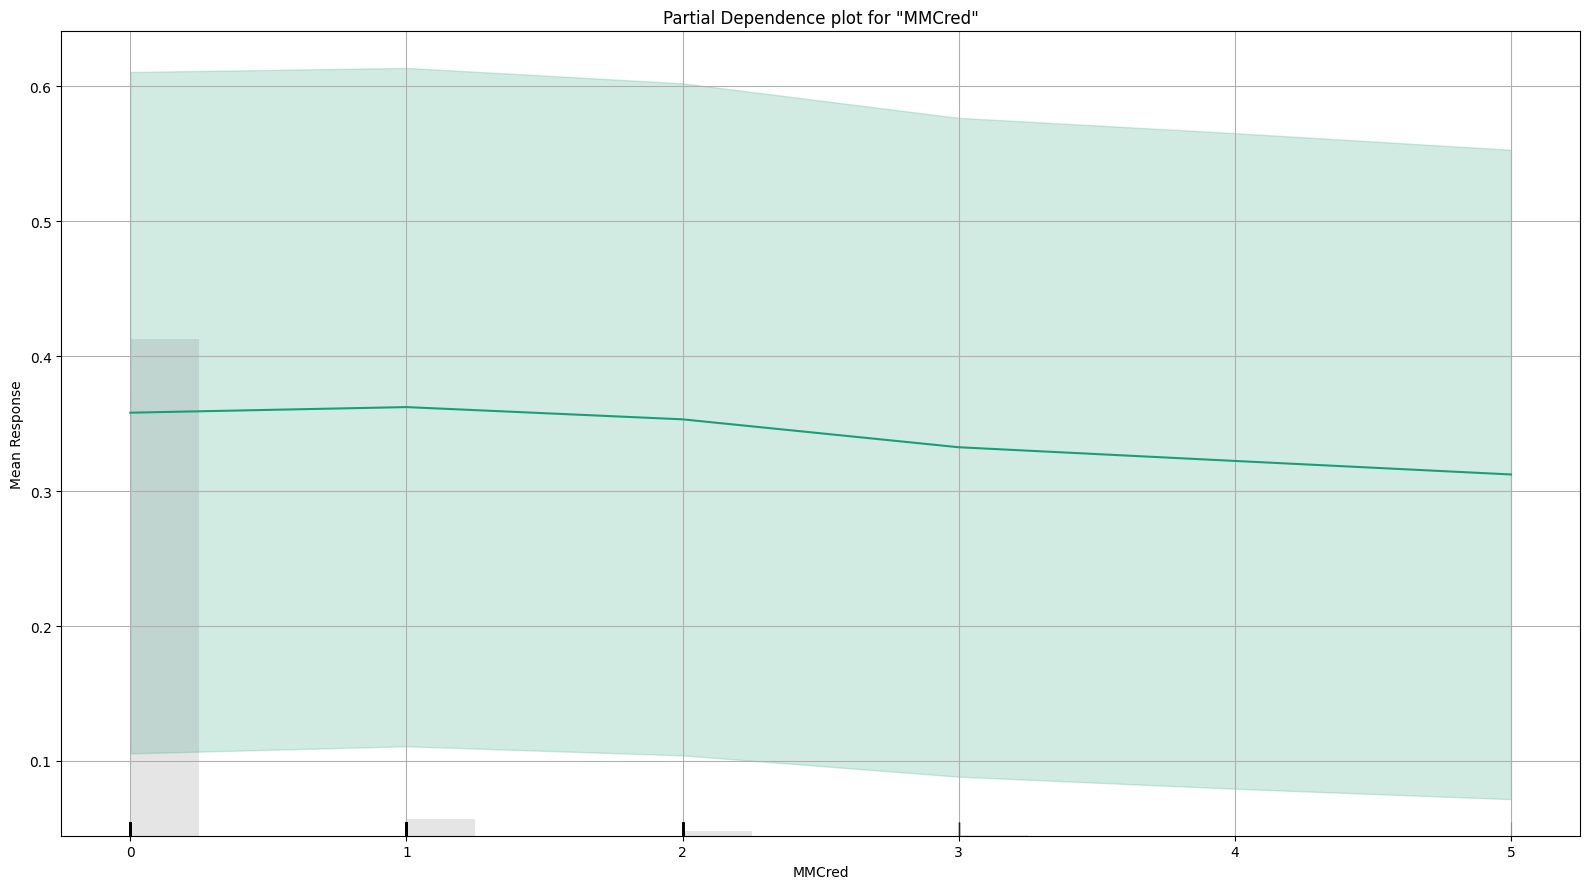

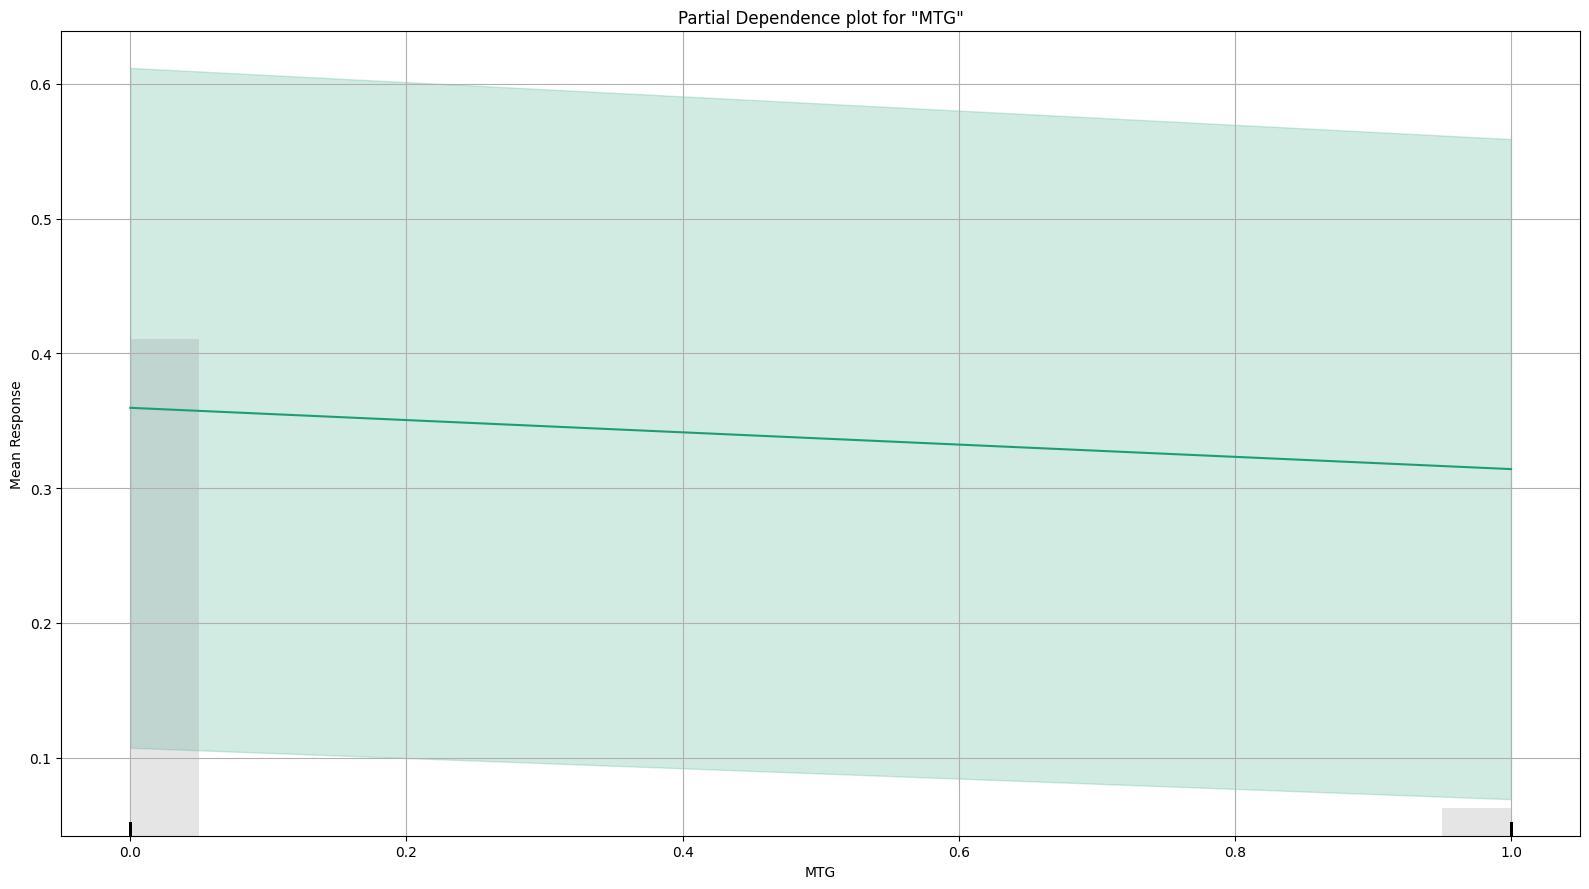

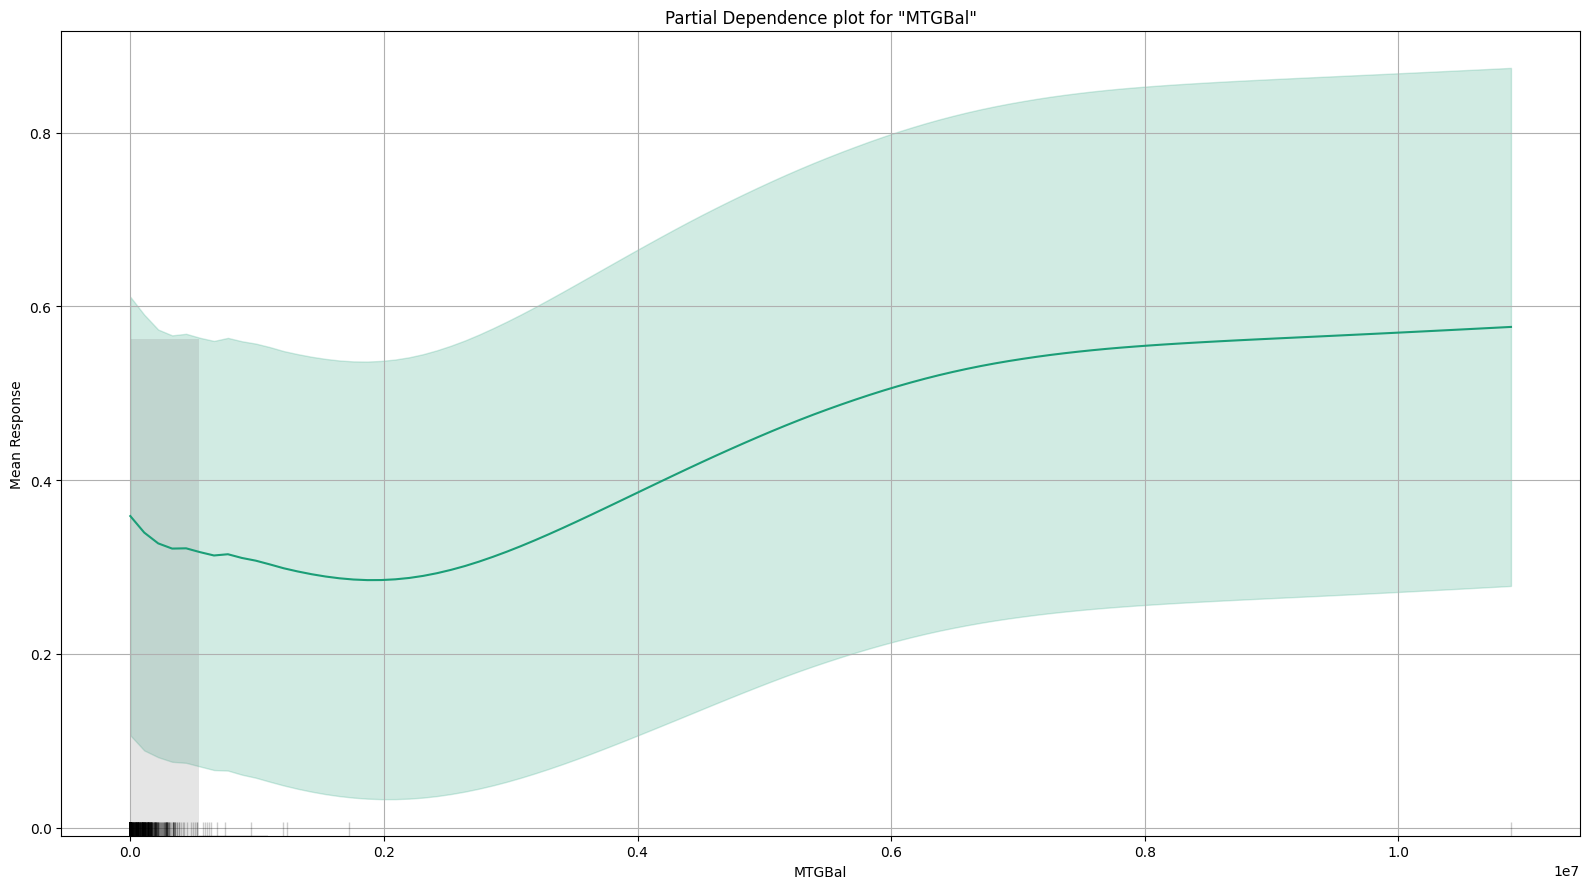

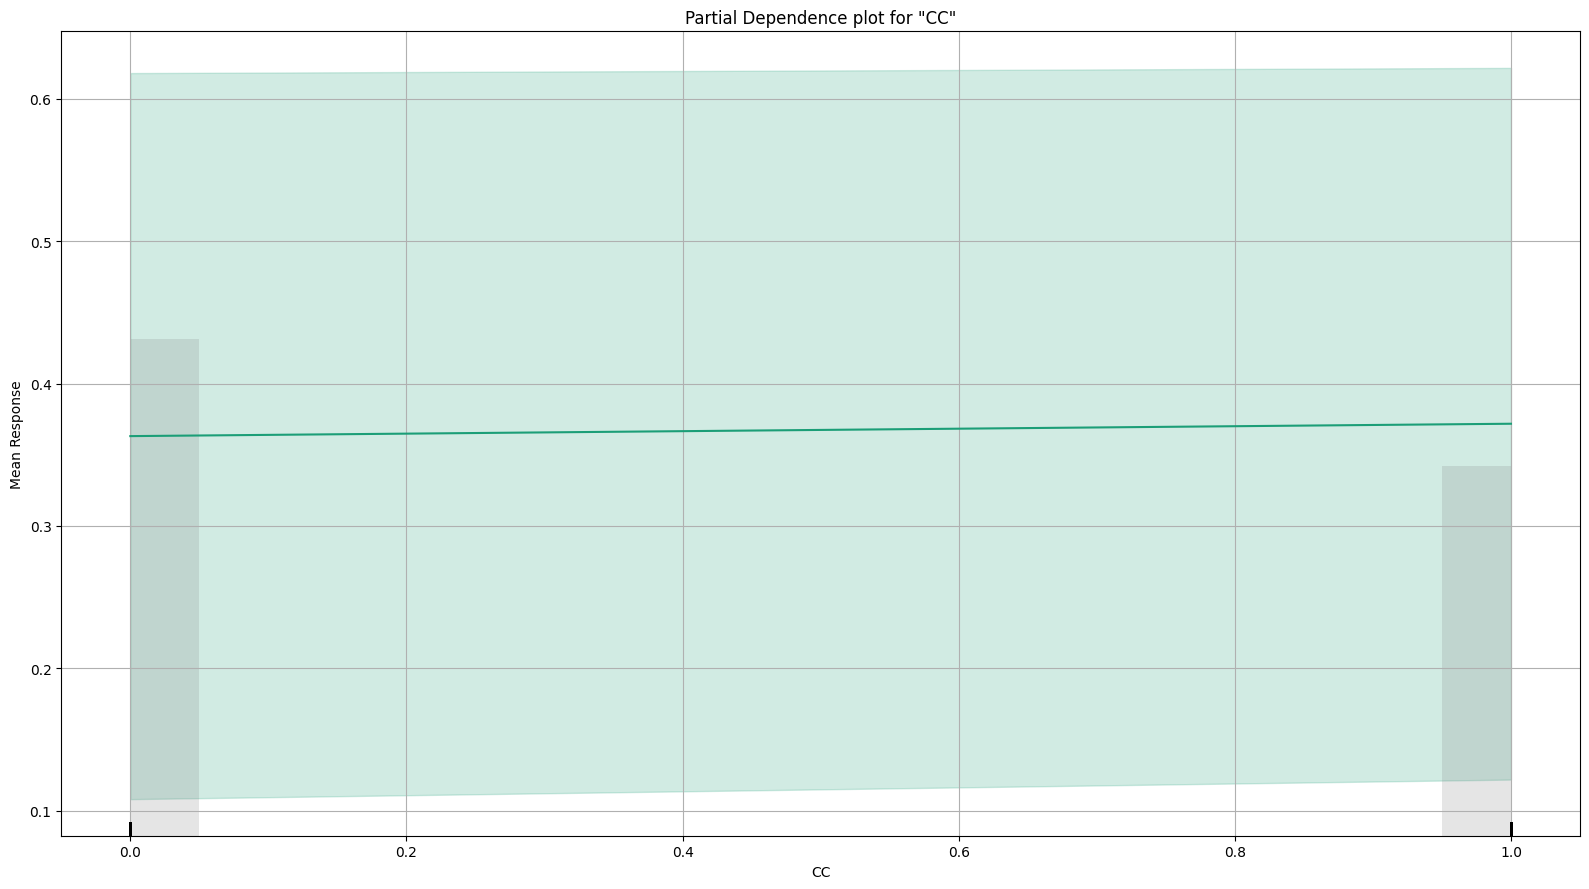

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9fd666351d070677ab1c554696c84aad> was cancelled by the user.

<Figure size 1600x900 with 0 Axes>

In [45]:
# Bendras modelio paaiškinimas
h2o.explain(best_smote_auto_ml, test_h2o)

# Konkretus įrašo paaiškinimas
#h2o.explain_row(best_smote_auto_ml, test_h2o, row_index=0)

In [13]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score
import matplotlib.pyplot as plt
# Modelio vertinimas su testavimo duomenimis
perf = aml_smote.leader.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())

# ROC kreivės grafikas
fpr, tpr, thresholds = perf.roc_curve()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {perf.auc():.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


AUC reikšmė su testavimo duomenimis:
0.8065477876322101

Klaidų matrica su testavimo duomenimis:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34566520597358963
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3051  1167  0.2767   (1167.0/4218.0)
1      527   1708  0.2358   (527.0/2235.0)
Total  3578  2875  0.2625   (1694.0/6453.0)


AttributeError: type object 'MetricsBase' has no attribute 'roc_curve'

### LOGISTIC REGRESSION MODELIS


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd

# Atskyrimas testavimo rinkinyje
X_test = test.drop(columns=[target])
y_test = test[target]

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
log_reg_preds = log_reg.predict(X_test)
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print("\nLogistic Regression Performance on Test Data:")
print(f"AUC: {log_reg_auc:.4f}")
print(classification_report(y_test, log_reg_preds))
print("Confusion Matrix:", confusion_matrix(y_test, log_reg_preds))


Logistic Regression Performance on Test Data:
AUC: 0.7597
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4218
           1       0.62      0.58      0.60      2235

    accuracy                           0.73      6453
   macro avg       0.70      0.70      0.70      6453
weighted avg       0.73      0.73      0.73      6453

Confusion Matrix: [[3430  788]
 [ 938 1297]]


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [15]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_resampled, y_train_resampled)
svc_preds = svc.predict(X_test)
svc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])

print("\nSupport Vector Classifier Performance on Test Data:")
print(f"AUC: {svc_auc:.4f}")
print(classification_report(y_test, svc_preds))
print("Confusion Matrix:", confusion_matrix(y_test, svc_preds))


Support Vector Classifier Performance on Test Data:
AUC: 0.7619
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4218
           1       0.63      0.56      0.59      2235

    accuracy                           0.73      6453
   macro avg       0.70      0.69      0.70      6453
weighted avg       0.73      0.73      0.73      6453

Confusion Matrix: [[3468  750]
 [ 983 1252]]


### K-nearest neighbors (KNN)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
knn_preds = knn.predict(X_test)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

print("\nK-Nearest Neighbors Performance on Test Data:")
print(f"AUC: {knn_auc:.4f}")
print(classification_report(y_test, knn_preds))
print("Confusion Matrix:", confusion_matrix(y_test, knn_preds))


K-Nearest Neighbors Performance on Test Data:
AUC: 0.7148
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4218
           1       0.52      0.64      0.57      2235

    accuracy                           0.67      6453
   macro avg       0.65      0.66      0.65      6453
weighted avg       0.69      0.67      0.68      6453

Confusion Matrix: [[2893 1325]
 [ 804 1431]]


### XGB

In [17]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("\nXGBoost Performance on Test Data:")
print(f"AUC: {xgb_auc:.4f}")
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:", confusion_matrix(y_test, xgb_preds))

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance on Test Data:
AUC: 0.7987
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4218
           1       0.65      0.61      0.63      2235

    accuracy                           0.75      6453
   macro avg       0.73      0.72      0.72      6453
weighted avg       0.75      0.75      0.75      6453

Confusion Matrix: [[3496  722]
 [ 878 1357]]


### SMOTE GBM


In [18]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator

# Hiperparametrų rinkinys
hyper_params = {
    'ntrees': [5, 5, 15],           # Medžių skaičius
    'max_depth': [3, 4, 5],           # Maksimalus gylis
    'learn_rate': [0.01, 0.05, 0.1],    # Mokymosi tempas
    'sample_rate': [0.8, 1.0]           # Pavyzdžių atrankos tempas
}

# Paieškos kriterijai (naudojame RandomDiscrete, kad greičiau išbandytume derinius)
search_criteria = {
    "strategy": "RandomDiscrete",
    "max_models": 10,          # Maksimalus modelių skaičius
    "max_runtime_secs": 600     # Maksimali paieškos trukmė sekundėmis
}

# Sukuriame H2OGridSearch su GBM modeliu
grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria=search_criteria
)

# Paleidžiame Grid Search su subalansuotu SMOTE treniravimo rinkiniu
grid.train(x=train_h2o_smote.columns, y=target, training_frame=train_h2o_smote, validation_frame=test_h2o)

# Gaukite geriausią modelį pagal AUC
best_gbm = grid.get_grid(sort_by="auc", decreasing=True).models[0]

# Parodykite geriausio modelio hiperparametrus ir metrikas
print("Best model hyperparameters:", best_gbm.params)
print("Best model AUC:", best_gbm.auc())

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best model hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_GBM_py_6_sid_95ef_model_python_1731085109530_6079_model_3', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_GBM_py_6_sid_95ef_model_python_1731085109530_6079_model_3'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_6_sid_95ef', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_6_sid_95ef'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_6_sid_95ef', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_6_sid_95ef'}}, 'validation_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'nam

In [19]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score
# Modelio vertinimas su testavimo duomenimis
perf = best_gbm.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())


AUC reikšmė su testavimo duomenimis:
0.7863590895735014

Klaidų matrica su testavimo duomenimis:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43675340176626615
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2637  1581  0.3748   (1581.0/4218.0)
1      391   1844  0.1749   (391.0/2235.0)
Total  3028  3425  0.3056   (1972.0/6453.0)


In [20]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

# Hiperparametrų rinkinį
hyper_params = {
    'ntrees': [10, 25, 50],        # Skirtingas medžių skaičius
    'max_depth': [5, 10, 30],       # Skirtingas maksimalus gylis
    'min_rows': [1, 5, 10],          # Minimalus įrašų skaičius mazge
    'sample_rate': [0.7, 0.8, 0.9],  # Pavyzdžių atrankos norma
    'mtries': [3, 5, 10]             # Požymių skaičius, atrinktas kiekvienam medžiui (naudokite -1 visiems požymiams)
}

# Sukuriame „Random Forest“ modelį su H2OGridSearch
grid_search = H2OGridSearch(
    model=H2ORandomForestEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria={
        "strategy": "Cartesian"  # Išbandys kiekvieną kombinaciją, galima naudoti „RandomDiscrete“ greitesniam paieškojimui
    }
)

# Peliedizame tinklelio paiešką
grid_search.train(x=train_h2o_smote.columns, y=target, training_frame=train_h2o_smote, validation_frame=test_h2o)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
     max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                         logloss
---  -----------  ----------  --------  --------  -------------  ----------------------------------------------------------------  ------------------
     30.0         5.0         10.0      50.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_159  0.5258875341233171
     30.0         1.0         10.0      50.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_237  0.5276883293991381
     30.0         5.0         10.0      50.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_78   0.5276911487752378
     30.0         5.0         10.0      50.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_240  0.5280662615274194
     30.0         5.0         10.0      25.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_132  0.5302880923901292
     30.0         10.0        10.0      50.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_243  0.5315643839738073
     30.0         10.0        10.0      50.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_162  0.5318088987564304
     30.0         5.0         10.0      25.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_213  0.5318195675560088
     30.0         5.0         10.0      25.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_51   0.5323479605787714
     30.0         1.0         10.0      50.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_75   0.5325851749296486
---  ---          ---         ---       ---       ---            ---                                                               ---
     5.0          10.0        3.0       25.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_196  0.6336627063073039
     5.0          10.0        3.0       10.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_7    0.6337830633141481
     5.0          5.0         3.0       10.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_85   0.6345480316166039
     5.0          10.0        3.0       10.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_88   0.6346586775116017
     5.0          1.0         3.0       10.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_163  0.6352672849624158
     5.0          1.0         3.0       10.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_1    0.6353381102546578
     5.0          1.0         3.0       10.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_82   0.636780186172091
     30.0         1.0         10.0      10.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_21   0.7539555119495724
     30.0         1.0         10.0      10.0      0.9            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_183  0.7844610684712744
     30.0         1.0         10.0      10.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_102  0.7966627443859214
[243 rows x 8 columns]

In [21]:
# Peržiūrėkite tinklelio paieškos rezultatus
grid_results = grid_search.get_grid(sort_by="auc", decreasing=True)
print(grid_results)

# Gaukite geriausią modelį pagal AUC
best_rf_model_smote = grid_results.models[0]

# Modelio vertinimas su testavimo duomenimis
perf = best_rf_model_smote.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())

Hyper-Parameter Search Summary: ordered by decreasing auc
     max_depth    min_rows    mtries    ntrees    sample_rate    model_ids                                                         auc
---  -----------  ----------  --------  --------  -------------  ----------------------------------------------------------------  ------------------
     30.0         5.0         10.0      50.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_159  0.7969422088991146
     30.0         10.0        10.0      50.0      0.8            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_162  0.7961444135764164
     30.0         10.0        10.0      50.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_81   0.7961109466937796
     30.0         5.0         10.0      50.0      0.7            Grid_DRF_py_6_sid_95ef_model_python_1731085109530_6269_model_78   0.7958485154175723
     30.0         10.0        10.0      50.0      0.9    

### FEATURE ENGINEERING 

In [22]:
def advanced_feature_engineering(df):
    df = df.copy()
    
    # 1. Spending Behavior Ratios
    df['AvgWithdrawalPerVisit'] = df['ATMAmt'] / (df['Teller'] + 1e-5)
    df['POS_Spending_Ratio'] = df['POSAmt'] / (df['Income'] + 1e-5)
    df['CreditSpendingIncomeRatio'] = df['CCBal'] / (df['Income'] + 1e-5)
    
    # 2. Customer Engagement
    df['TotalServiceUsage'] = (
        df['ATM'] + df['CC'] + df['CD'] + df['DDA'] + df['DirDep'] + df['HMOwn'] + 
        df['ILS'] + df['IRA'] + df['Inv'] + df['LOC'] + df['MM'] + df['MTG'] + df['SDB'] + df['Sav']
    )
    df['ActivityScore'] = df['CashBk'] + df['Checks'] + df['Phone'] + df['Teller'] + df['POS']
    
    # 3. Financial Stability Ratios
    df['LiquidityRatio'] = (df['DDABal'] + df['SavBal'] + df['MMBal']) / (df['ILSBal'] + df['MTGBal'] + 1e-5)
    df['DebtIncomeRatio'] = (df['ILSBal'] + df['MTGBal']) / (df['Income'] + 1e-5)
    df['WealthIndex'] = (
        df['DDABal'] + df['SavBal'] + df['MMBal'] + df['IRABal'] + df['InvBal'] + df['CDBal'] + df['LOCBal']
    ) / (df['Income'] + 1e-5)
    
    # 4. Account Balance Ratios
    df['SavingsCheckingRatio'] = df['SavBal'] / (df['DDABal'] + 1e-5)
    df['CreditCashRatio'] = df['CCBal'] / (df['DDABal'] + 1e-5)
    
    # 5. Long-Term and Stability Indicators
    df['HighBalance'] = (df['DDABal'] + df['SavBal'] + df['MMBal']) > 10000
    df['HighBalance'] = df['HighBalance'].astype(int)  # Convert boolean to integer
    
    # 6. Binary Flags
    df['FrequentTeller'] = (df['Teller'] > 3).astype(int)
    df['MultipleLoans'] = ((df['ILSBal'] > 0) & (df['MTGBal'] > 0)).astype(int)
    
    return df



In [23]:
# Apply feature engineering
data = advanced_feature_engineering(data)

# Split the dataset into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target])

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Set the target and predictor variables
x = train_h2o.columns
y = target
x.remove(y)  # Remove the target from predictors

# Convert the target column to a factor for classification
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
# Step 2: Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=42, balance_classes=True)
aml.train(x=x, y=y, training_frame=train_h2o)

# Display the leaderboard
leaderboard = aml.leaderboard
print(leaderboard.head(rows=leaderboard.nrows))

# Evaluate the best model on the test set
best_model_feature = aml.leader
performance = best_model_feature.model_performance(test_h2o)
print(performance)

AutoML progress: |
20:19:59.362: AutoML: XGBoost is not available; skipping it.

██████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_916c947dfd44e746b087755d69d44344> was cancelled by the user.

### GBM with new features

In [25]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator

# Hiperparametrų rinkinys
hyper_params = {
    'ntrees': [3, 5, 15],           # Medžių skaičius
    'max_depth': [3, 4, 5],           # Maksimalus gylis
    'learn_rate': [0.01, 0.05, 0.1],    # Mokymosi tempas
    'sample_rate': [0.8, 1.0]           # Pavyzdžių atrankos tempas
}

# Paieškos kriterijai (naudojame RandomDiscrete, kad greičiau išbandytume derinius)
search_criteria = {
    "strategy": "RandomDiscrete",
    "max_models": 10,          # Maksimalus modelių skaičius
    "max_runtime_secs": 600     # Maksimali paieškos trukmė sekundėmis
}

# Sukuriame H2OGridSearch su GBM modeliu
grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator(seed=42),
    hyper_params=hyper_params,
    search_criteria=search_criteria
)

# Paleidžiame Grid Search su subalansuotu SMOTE treniravimo rinkiniu
grid.train(x=x, y=y, training_frame=train_h2o, validation_frame=test_h2o)

# Gaukite geriausią modelį pagal AUC
best_gbm_features = grid.get_grid(sort_by="auc", decreasing=True).models[0]

# Parodykite geriausio modelio hiperparametrus ir metrikas
print("Best model hyperparameters:", best_gbm_features.params)
print("Best model AUC:", best_gbm_features.auc())

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best model hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_GBM_py_11_sid_95ef_model_python_1731085109530_20260_model_5', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_GBM_py_11_sid_95ef_model_python_1731085109530_20260_model_5'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_11_sid_95ef', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_11_sid_95ef'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_11_sid_95ef', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_11_sid_95ef'}}, 'validation_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>

In [26]:
gbm_model3 = H2OGradientBoostingEstimator(ntrees=100, max_depth=10, seed=42)

gbm_model3.train(x=x, y=y, training_frame=train_h2o)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1731085109530_20357


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         299361                 10           10           10            53            431           233.16

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0673993474233976
RMSE: 0.2596138428963248
LogLoss: 0.2546267573786789
Mean Per-Class Error: 0.08263273143740958
AUC: 0.9738482977222739
AUCPR: 0.9654816625609279
Gini: 0.9476965954445478

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4449261314243512
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      16387  484   0.0287   (484.0/16871.0)
1      1221   7719  0.1366   (1221.0/8940.0)
Total  17608  8203  0.0661   (1705.0/25811.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.444926     0.900542  191
max f2                       0.308263     0.904045  238
max f0point5                 0.529475     0.941483  166
max accuracy                 0.468625     0.934408  183
max precision                0.995908     1         0
max recall                   0.0444877    1         383
max specificity              0.995908     1         0
max absolute_mcc             0.468625     0.854558  183
max min_per_class_accuracy   0.339809     0.91566   226
max mean_per_class_accuracy  0.372906     0.91979   215
max tns                      0.995908     16871     0
max fns                      0.995908     8939      0
max fps                      0.0153082    16871     399
max tps                      0.0444877    8940      383
max tnr                      0.995908     1         0
max fnr                      0.995908     0.999888  0
max fpr                      0.0153082    1         399
max tpr                      0.0444877    1         383

Gains/Lift Table: Avg response rate: 34.64 %, avg score: 34.64 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100345                   0.96464            2.88714     2.88714            1                0.97473    1                           0.97473             0.0289709       0.0289709                  188.714   188.714            0.0289709
2        0.0200302                   0.94998            2.88714     2.88714            1                0.957019   1                           0.965892            0.0288591       0.05783                    188.714   188.714            0.05783
3        0.030026                    0.938166           2.88714     2.88714            1                0.944221   1                           0.958678            0.0288591       0.086689                   188.714   188.714            0.086689
4        0.0400217                   0.928409           2.88714     2.88714            1                0.933022   1                           0.95227             0.0288591       0.115548                   188.714   188.714            0.115548
5        0.0500174                   0.919262           2.88714     2.88714            1                0.92416    1      

In [27]:
# Evaluate the GBM model on the test set
performance_gbm = gbm_model3.model_performance(test_h2o)
print("GBM Model Performance on Test Data:")
print(performance_gbm)

# Get predictions from the GBM model
gbm_preds = gbm_model3.predict(test_h2o)

GBM Model Performance on Test Data:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.16851459414313877
RMSE: 0.41050529124864976
LogLoss: 0.5109217005377176
Mean Per-Class Error: 0.260722821019536
AUC: 0.8050468165091973
AUCPR: 0.6717922533617907
Gini: 0.6100936330183946

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28511806891161406
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2898  1320  0.3129   (1320.0/4218.0)
1      466   1769  0.2085   (466.0/2235.0)
Total  3364  3089  0.2768   (1786.0/6453.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.285118     0.664538  255
max f2                       0.124629     0.770436  331
max f0point5                 0.532563     0.648553  158
max accuracy                 0.432729     0.754068  196
max precision                

In [28]:
# Modelio vertinimas su testavimo duomenimis
perf = best_gbm_features.model_performance(test_h2o)

# Spausdinti AUC ir klaidų matricą
print("\nAUC reikšmė su testavimo duomenimis:")
print(perf.auc())

print("\nKlaidų matrica su testavimo duomenimis:")
print(perf.confusion_matrix())


AUC reikšmė su testavimo duomenimis:
0.7930430784016089

Klaidų matrica su testavimo duomenimis:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3169675121553867
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2704  1514  0.3589   (1514.0/4218.0)
1      414   1821  0.1852   (414.0/2235.0)
Total  3118  3335  0.2988   (1928.0/6453.0)


In [57]:
h2o.explain(best_gbm_features, test_h2o)

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Name lookup of 'py_125_sid_854d' failed
  Request: POST /99/Rapids
    data: {'ast': "(is.factor (tmp= py_156_sid_854d (cols_py py_125_sid_854d 'Ins')))", 'session_id': '_sid_854d'}


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Įkeliam pradinius duomenis
data = pd.read_csv('../2 - Data/develop.csv')
target = 'Ins'

# Patikriname ir konvertuojame kategorinius stulpelius į skaitinius (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)  # Automatiškai konvertuoja visus kategorinius stulpelius

# Sukuriame X (nepriklausomi kintamieji) ir y (taikinys) duomenis
X = data.drop(columns=[target])
y = data[target]

# Sukuriame polinominius ir sąveikos kintamuosius su PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Sukuriame naują DataFrame su polinominių savybių pavadinimais
feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Pridėkite taikinį (target) prie polinominių kintamųjų DataFrame
X_poly_df[target] = y

# Padalijame į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_df.drop(columns=[target]), X_poly_df[target], test_size=0.2, random_state=1
)

# Sujungiame X ir y treniravimo ir testavimo rinkiniuose
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Pradedame H2O serverį su padidinta atmintimi
h2o.init(max_mem_size="14G")

# Konvertuojame treniravimo ir testavimo rinkinius į H2OFrame
train_h2o = h2o.H2OFrame(train_data)
test_h2o = h2o.H2OFrame(test_data)

# Konvertuojame taikinio kintamąjį į kategorinį (binarinė klasifikacija)
train_h2o[target] = train_h2o[target].asfactor()
test_h2o[target] = test_h2o[target].asfactor()

# Apibrėžiame nepriklausomus kintamuosius ir taikinį
x = train_h2o.columns  # Visi stulpeliai
x.remove(target)       # Pašaliname taikinį, kad liktų tik nepriklausomi kintamieji
y = target             # Taikinys

# Sukuriame ir treniruojame GBM modelį su kryžmine validacija (k=5)
gbm_model_poly = H2OGradientBoostingEstimator(
    ntrees=10,
    max_depth=4,
    seed=42
)

# Treniruojame GBM modelį su treniravimo rinkiniu
gbm_model_poly.train(x=x, y=y, training_frame=train_h2o)

# Vertiname modelį su testavimo duomenimis
performance = gbm_model_poly.model_performance(test_data=test_h2o)
print("GBM Model AUC on Test Data:", performance.auc())

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O_cluster_uptime:         1 hour 30 mins
H2O_cluster_timezone:       Europe/Vilnius
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.5
H2O_cluster_version_age:    2 months and 10 days
H2O_cluster_name:           H2O_from_python_zydrunasbautronis_imnfuh
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.093 Gb
H2O_cluster_total_cores:    11
H2O_cluster_allowed_cores:  11
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.3 final
--------------------------  ----------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [InvBal Branch_B19, InvBal Branch_B18, Branch_B16 Branch_B17, Branch_B16 Branch_B19, Branch_B16 Branch_B18, CCBal Branch_B19, InvBal Branch_B15, InvBal Branch_B14, Inv Branch_B14, Branch_B7 Branch_B9, Inv Branch_B15, Branch_B13 Branch_B14, Inv Branch_B18, Branch_B13 Branch_B15, Branch_B13 Branch_B16, Branch_B7 Branch_B8, Branch_B13 Branch_B17, Inv Branch_B19, Branch_B13 Branch_B18, Branch_B13 Branch_B19, CCBal Branch_B14, CCBal Branch_B18, CCBal Branch_B15, POS Branch_B18, POS Branch_B19, Branch_B14 Branch_B2, Branch_B14 Branch_B4, Branch_B14 Branch_B3, Branch_B14 Branch_B6, Branch_B14 Branch_B5, Branch_B14 Branch_B8, Branch_B14 Branch_B7, Branch_B14 Branch_B9, POS Branch_B14, POS Branch_B15, Branch_B12 Branch_B18, Branch_B12 Branch_B19, Branch_B12 Branch_B16, Branch_B19 Branch_B2, Bran

██████████████████████████████████████████████████████| (done) 100%
GBM Model AUC on Test Data: 0.7913972758632953


### GRAFIKAI

In [33]:
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

naivebayes prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████| (done) 100%
drf prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Branch': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Res': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Branch': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Res': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


██████████████████████████████████████████████| (done) 100%
gbm prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Branch': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Res': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Branch': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Res': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████████████████| (done) 100%


/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Branch': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'Res': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'AvgWithdrawalPerVisit': substituting in a column of NaN
  warnings.warn(w)
/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'POS_Spending_Ratio': substituting in a column of NaN
  warnings.warn

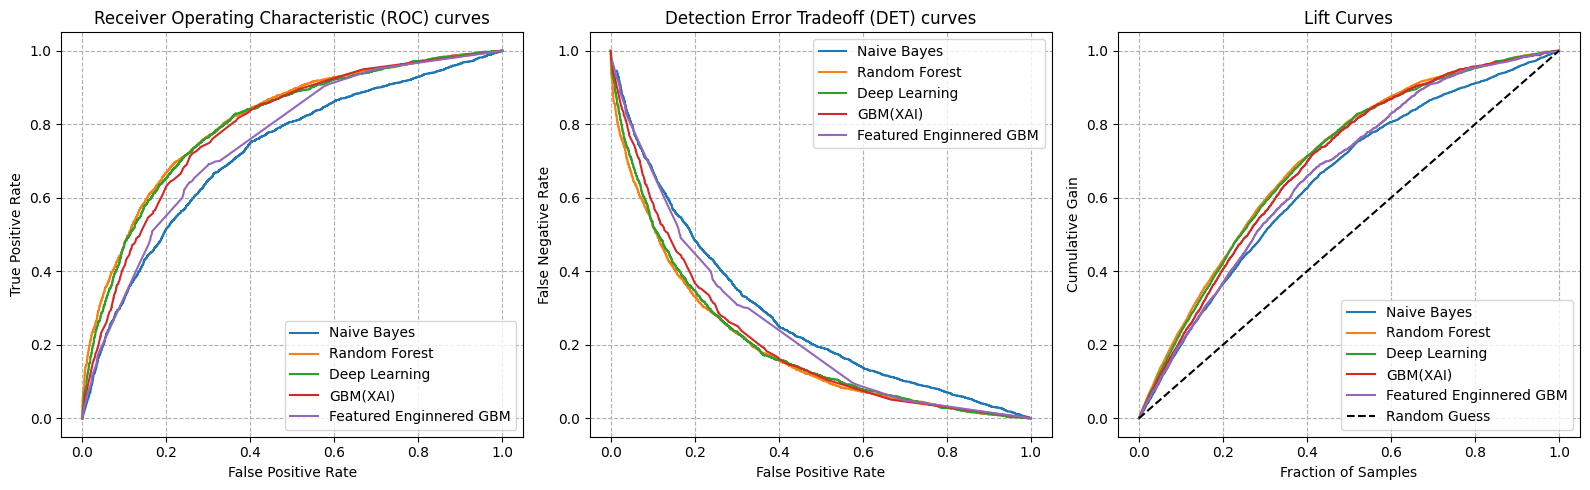

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, det_curve
import numpy as np

# Convert y_test to a Pandas series if it is an H2OFrame
y_test = test_h2o[target].as_data_frame().values.ravel()  # Target variable

# Function to get probabilities from an H2O model
def get_probabilities(model, test_data):
    predictions = model.predict(test_data)  # Get predictions from the H2O model
    if predictions.shape[1] > 1:  # If there is a probabilities column
        return predictions.as_data_frame().iloc[:, 2].values  # Positive class probability
    else:
        raise ValueError("Model does not support probability predictions")

# List of models to compare
models = {
    'Naive Bayes': best_nb_model,
    'Random Forest': best_rf_model,
    'Deep Learning': dl_model,
    'GBM(XAI)': gbm_model2,
    'Featured Enginnered GBM': best_gbm_features
}

# Prepare the plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Adjusted to fit three plots
ax_roc, ax_det, ax_lift = axes

# Plot ROC, DET, and Lift curves for each model
for model_name, model in models.items():
    y_test_proba = get_probabilities(model, test_h2o)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    ax_roc.plot(fpr, tpr, label=f'{model_name}')
    
    # DET Curve
    fpr_det, fnr_det, _ = det_curve(y_test, y_test_proba)
    ax_det.plot(fpr_det, fnr_det, label=f'{model_name}')
    
    # Lift Curve
    sorted_indices = np.argsort(y_test_proba)[::-1]
    sorted_y_test = y_test[sorted_indices]
    cumulative_gain = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
    x_lift = np.arange(1, len(sorted_y_test) + 1) / len(sorted_y_test)
    ax_lift.plot(x_lift, cumulative_gain, label=f'{model_name}')

# Customize ROC curve plot
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.grid(linestyle="--")
ax_roc.legend(loc='best')

# Customize DET curve plot
ax_det.set_title("Detection Error Tradeoff (DET) curves")
ax_det.set_xlabel('False Positive Rate')
ax_det.set_ylabel('False Negative Rate')
ax_det.grid(linestyle="--")
ax_det.legend(loc='best')

# Customize Lift curve plot
ax_lift.set_title("Lift Curves")
ax_lift.set_xlabel('Fraction of Samples')
ax_lift.set_ylabel('Cumulative Gain')
ax_lift.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Baseline for comparison
ax_lift.grid(linestyle="--")
ax_lift.legend(loc='best')

plt.tight_layout()
plt.show()

In [7]:

# Shut down H2O when done
h2o.shutdown()

H2O session _sid_8b61 closed.


/var/folders/sh/y7_11shj52j5ym8tns5r5r0h0000gn/T/ipykernel_15260/2571893919.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
